In [3]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from astropy.wcs import WCS
import pandas as pd
import seaborn as sns
from scipy.ndimage import rotate, shift
from reproject import reproject_interp
import matplotlib.patches as mpatches
from photutils.aperture import CircularAperture, CircularAnnulus, EllipticalAnnulus, EllipticalAperture
import math
from scipy.stats import bootstrap
from matplotlib.colors import LogNorm

os.chdir('/Users/mmckay/phd_projects/analysis_routine/code/photometry_fns')
from isochrone_preprocessing_fns import *
from photmetry_catalog_preprocessing_fn import *
from plotting_fns import *
from map_analysis import *


# Visualization adjustments
plt.rcParams.update({
    'figure.figsize': (10, 8),  # Adjust figure size
    'figure.dpi': 300,  # High resolution
    'font.size': 14,  # Base font size
    'axes.labelsize': 16,  # Axis label font size
    'axes.titlesize': 18,  # Title font size
    'xtick.labelsize': 12,  # X-axis tick label size
    'ytick.labelsize': 12,  # Y-axis tick label size
    'legend.fontsize': 12,  # Legend font size
    'lines.linewidth': 2,  # Line width
    'lines.markersize': 8,  # Marker size
    'axes.grid': False  # Enable grid
})



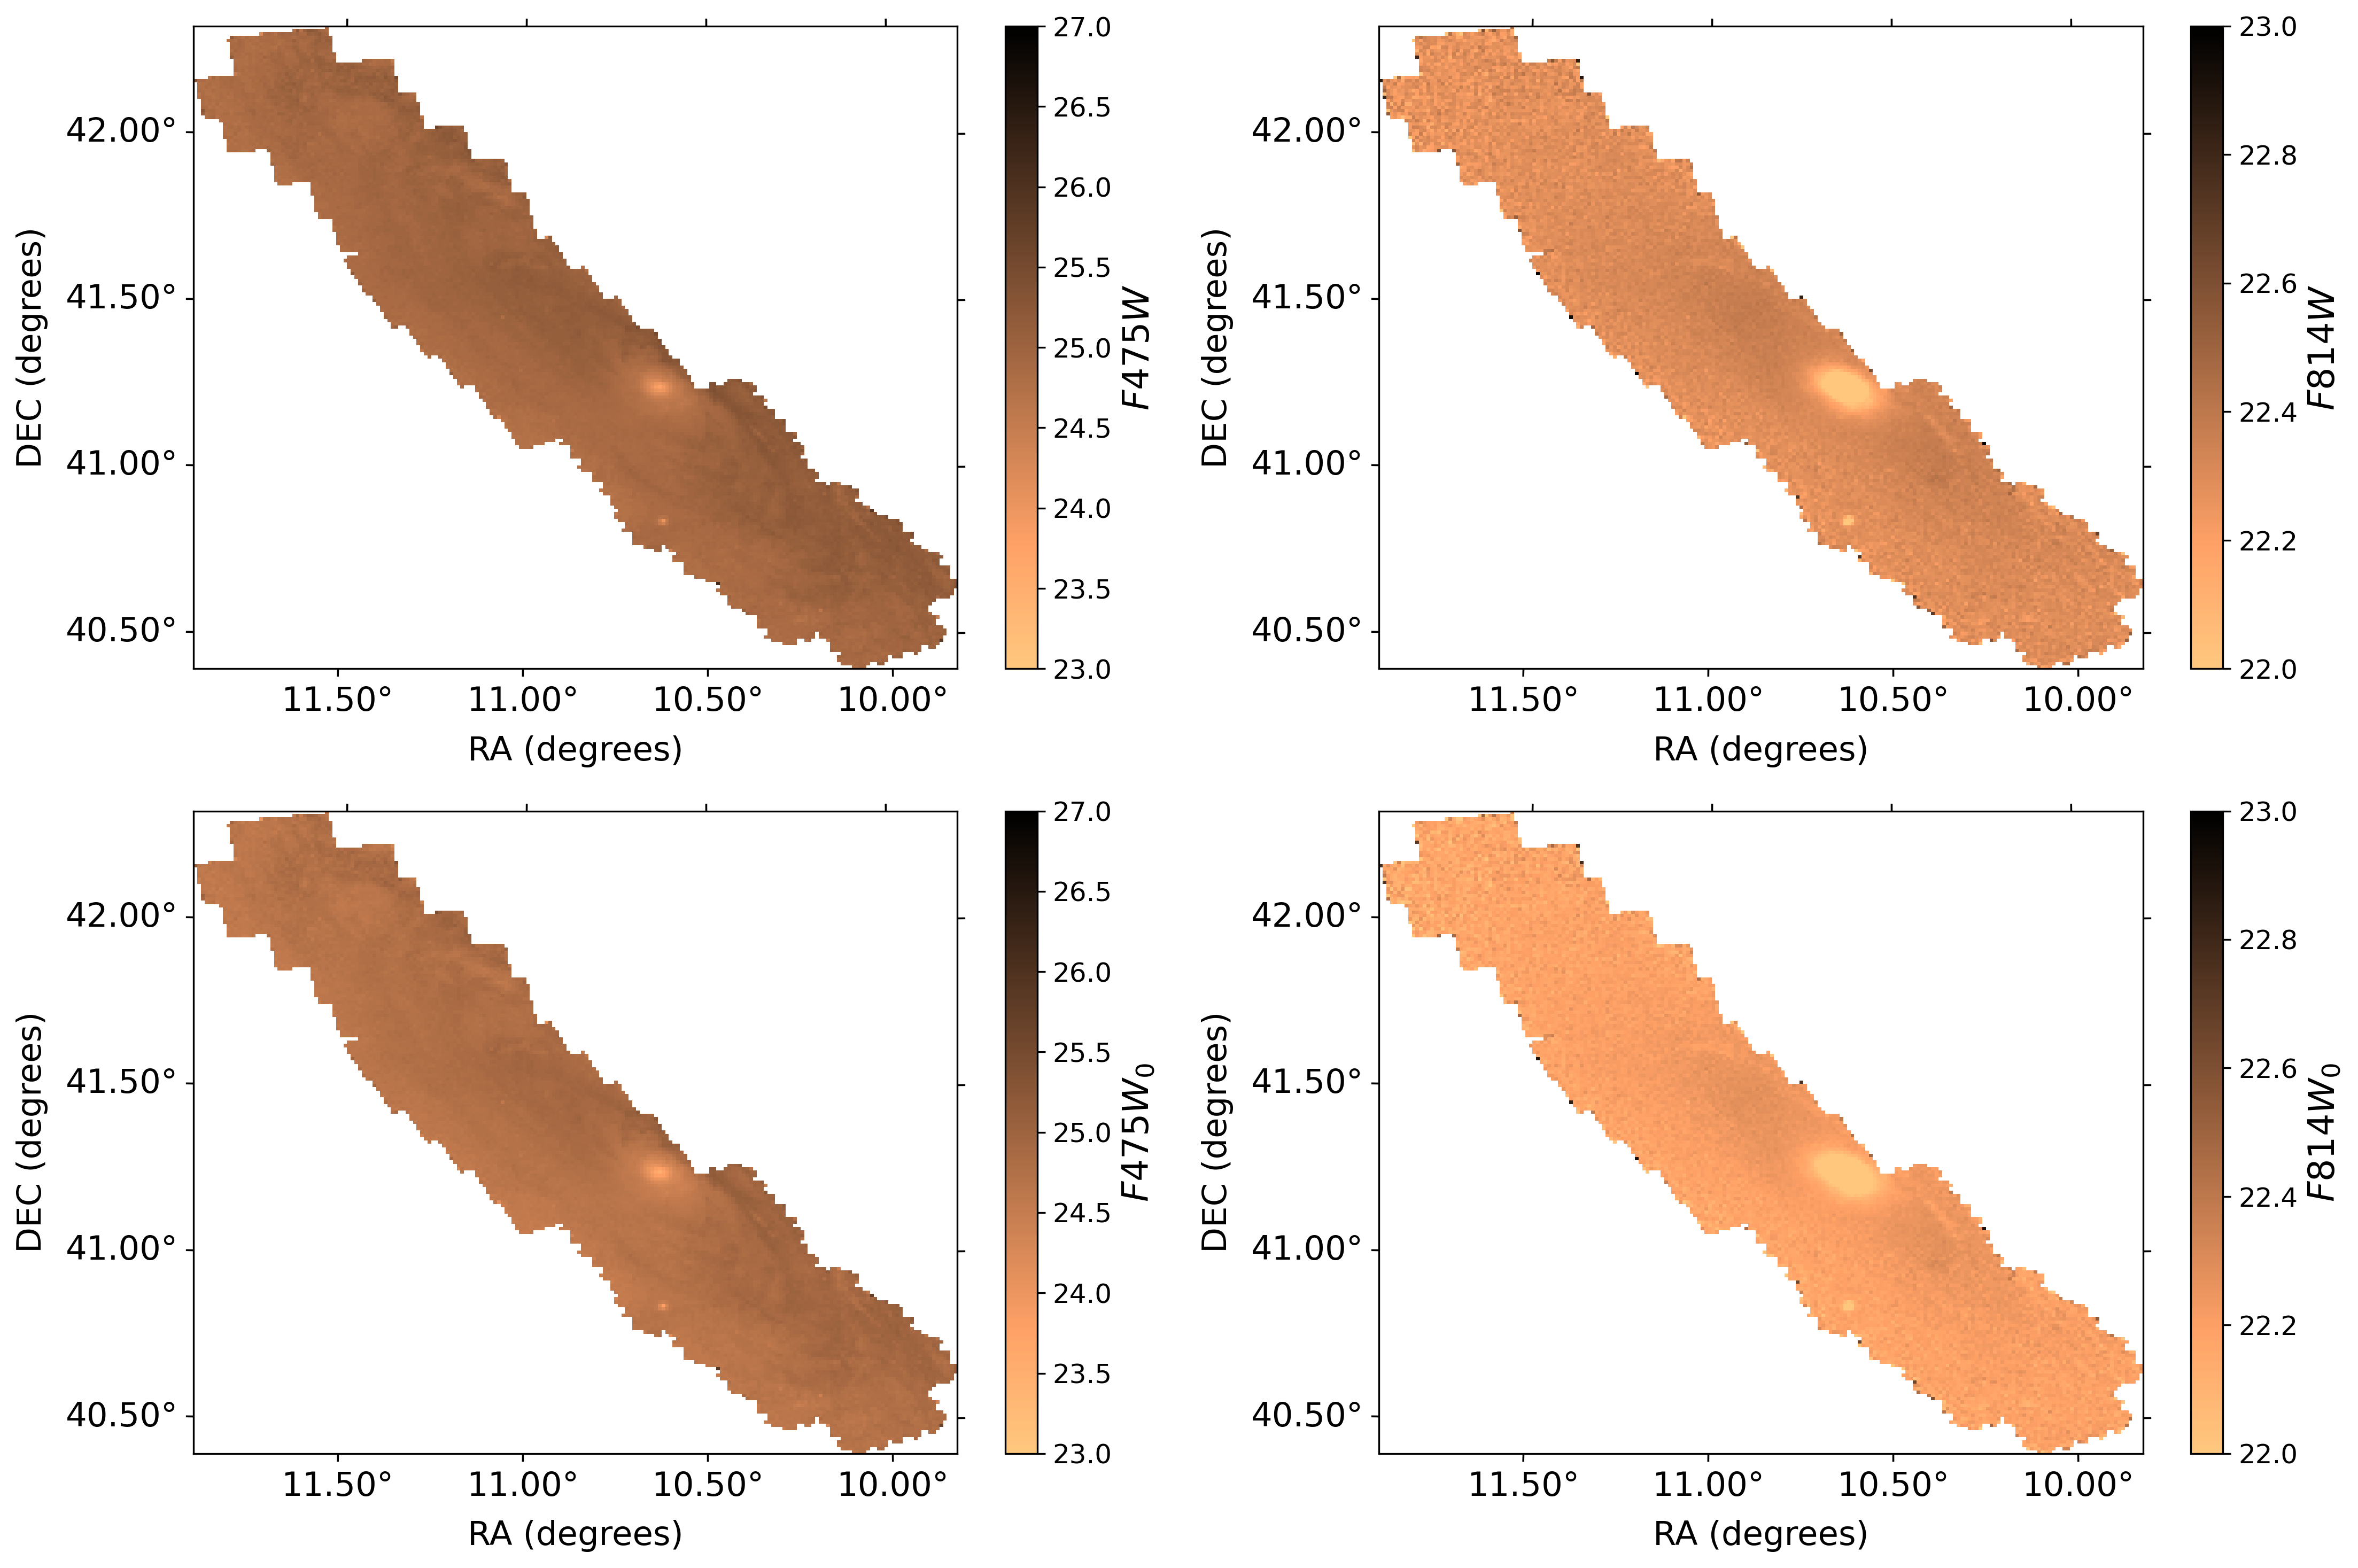

In [78]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits')

fig, axs = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection': WCS(hdu[0].header)})

extname_list = ['F475W_VEGA','F814W_VEGA', 'F475W_VEGA_ECORR', 'F814W_VEGA_ECORR']

# Plot the high_res_data
im0 = axs[0,0].imshow(hdu[extname_list[0]].data, cmap='copper_r', aspect='auto', vmin=23, vmax=27)
cbar0 = plt.colorbar(im0, ax=axs[0,0])
cbar0.set_label(r'$F475W$')

# ax1
im1 = axs[0,1].imshow(hdu[extname_list[1]].data, cmap='copper_r', aspect='auto', vmin=22, vmax=23)
cbar1 = plt.colorbar(im1, ax=axs[0,1])
cbar1.set_label(r'$F814W$')

# ax2
im2 = axs[1,0].imshow(hdu[extname_list[2]].data, cmap='copper_r', aspect='auto', vmin=23, vmax=27)
cbar2 = plt.colorbar(im2, ax=axs[1,0])
cbar2.set_label(r'$F475W_{0}$')

# ax3
im3 = axs[1,1].imshow(hdu[extname_list[3]].data, cmap='copper_r', aspect='auto', vmin=22, vmax=23)
cbar3 = plt.colorbar(im3, ax=axs[1,1])
cbar3.set_label(r'$F814W_{0}$')

# Set RA and DEC coordinates to decimal degrees and add labels
for ax_row in axs:
    for ax in ax_row:
        ax.coords[0].set_format_unit('deg')
        ax.coords[1].set_format_unit('deg')
        ax.coords[0].set_major_formatter('d.dd')
        ax.coords[1].set_major_formatter('d.dd')
        ax.set_xlabel('RA (degrees)', fontsize=15)
        ax.set_ylabel('DEC (degrees)', fontsize=15)
        ax.tick_params(axis='x', labelsize=15)  # Set x-axis tick labels font size
        ax.tick_params(axis='y', labelsize=15)  # Set y-axis tick labels font size
        ax.invert_xaxis()

plt.tight_layout()
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/mag_with_wo_forground_Av.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/mag_with_wo_forground_Av.jpeg', dpi=300, bbox_inches='tight')

plt.show()

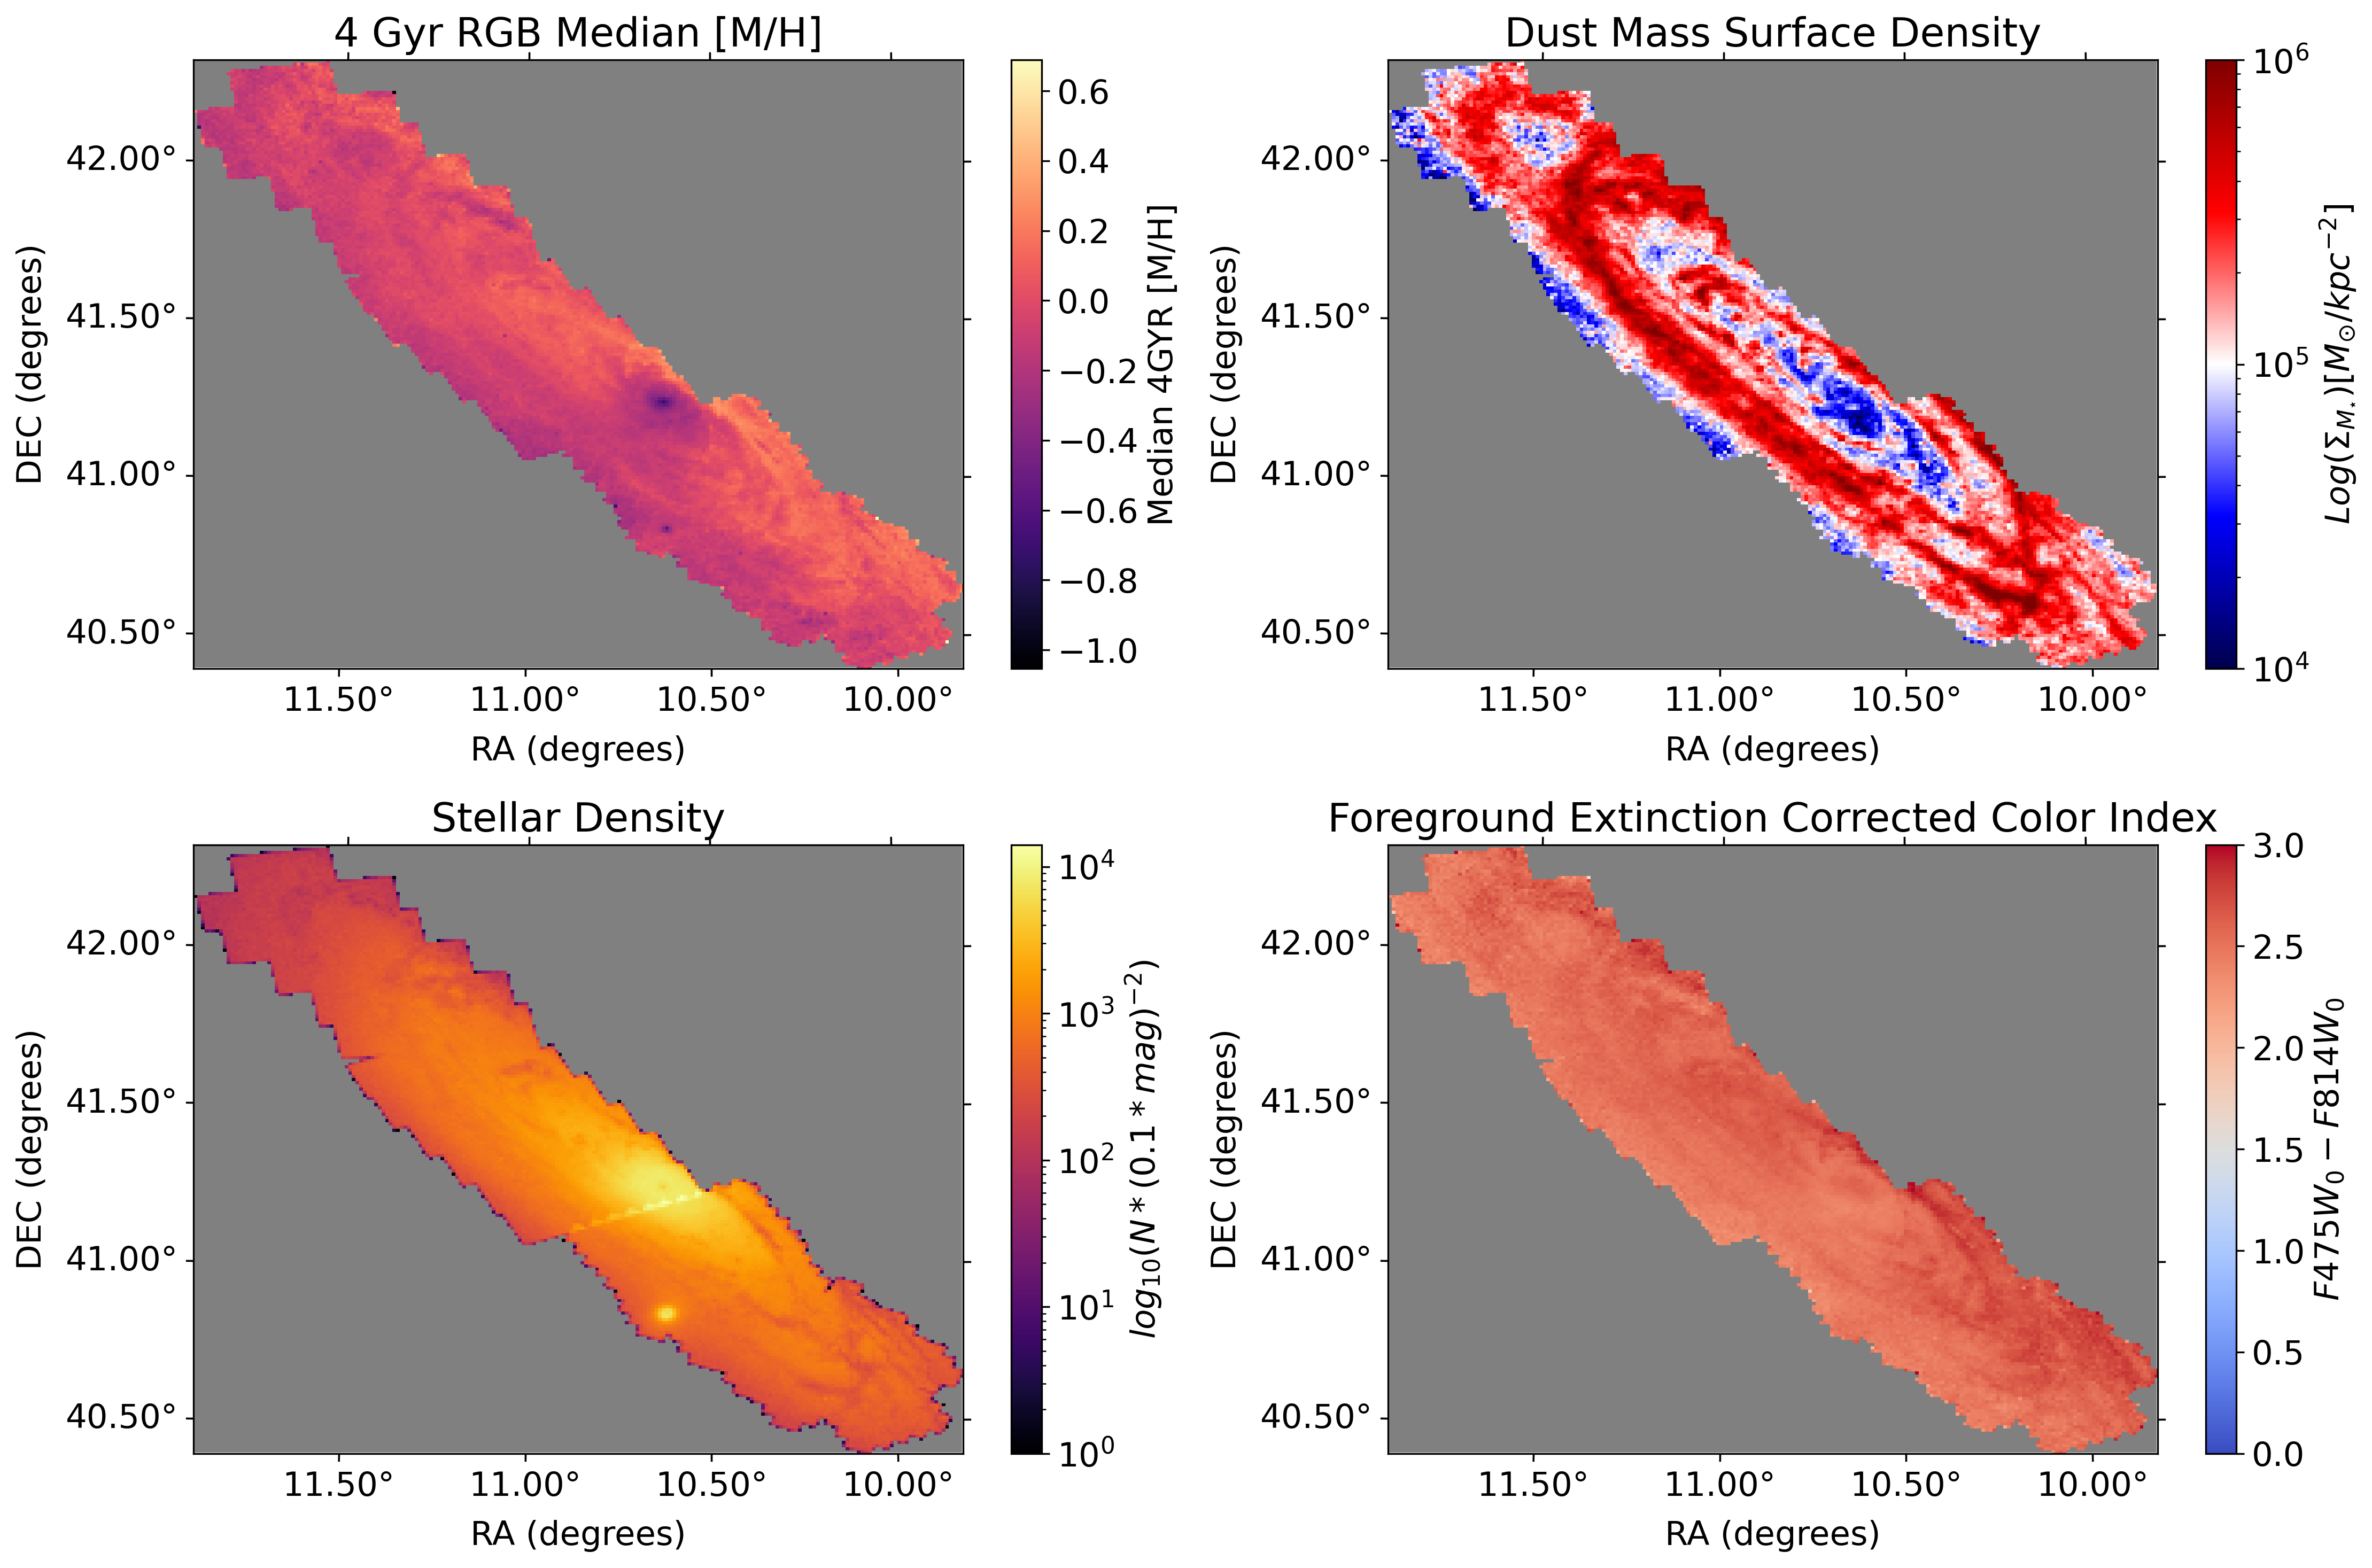

In [24]:
hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits')

fig, axs = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection': WCS(hdu[0].header)})

extname_list = ['INTERPOLATED_MH','Draine_Dust_Mass_Map', 'STELLAR_DENSITY', 'F475W-F814W_ECORR']

# Plot the high_res_data
im0 = axs[0,0].imshow(hdu[extname_list[0]].data, cmap='magma', aspect='auto', origin='lower',)
axs[0,0].set_title('4 Gyr RGB Median [M/H]')
cbar0 = plt.colorbar(im0, ax=axs[0,0])
cbar0.set_label('Median 4GYR [M/H]', fontsize=15)
# contour_levels = np.nanpercentile(hdu[extname_list[0]], [5, 25, 50, 75, 95, 99])
# axs[0,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')

# ax1
im1 = axs[0,1].imshow(hdu[extname_list[1]].data, cmap='seismic', aspect='auto', origin='lower', norm=LogNorm(vmin=1e4, vmax=1e6))
axs[0,1].set_title('Dust Mass Surface Density')
# axs[0,1].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
cbar1 = plt.colorbar(im1, ax=axs[0,1])
cbar1.set_label(r'$Log(\Sigma_{M_{\star}}) [M_{\odot}/kpc^{-2}]$', fontsize=15)

# ax2
im2 = axs[1,0].imshow(hdu[extname_list[2]].data, cmap='inferno', aspect='auto', origin='lower', norm=LogNorm())
# axs[1,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
axs[1,0].set_title('RGB Stellar Density')
# axs[1,0].invert_yaxis()
cbar2 = plt.colorbar(im2, ax=axs[1,0])
cbar2.set_label(r'$log_{10}(N*(0.1*mag)^{-2})$', fontsize=15)

# ax3
im3 = axs[1,1].imshow(hdu[extname_list[3]].data, cmap='coolwarm', aspect='auto', origin='lower', vmin=0.0, vmax=3.0)
# axs[1,0].contour(hdu[extname_list[0]], levels=contour_levels, colors='black')
axs[1,1].set_title('Foreground Extinction Corrected Color Index')
# axs[1,0].invert_yaxis()
cbar3 = plt.colorbar(im3, ax=axs[1,1])
cbar3.set_label(r'$F475W_{0}-F814W_{0}$', fontsize=15)
plt.tight_layout()

# Set RA and DEC coordinates to decimal degrees and add labels
for ax_row in axs:
    for ax in ax_row:
        ax.coords[0].set_format_unit('deg')
        ax.coords[1].set_format_unit('deg')
        ax.coords[0].set_major_formatter('d.dd')
        ax.coords[1].set_major_formatter('d.dd')
        ax.set_xlabel('RA (degrees)', fontsize=15)
        ax.set_ylabel('DEC (degrees)', fontsize=15)
        ax.tick_params(axis='x', labelsize=15)  # Set x-axis tick labels font size
        ax.tick_params(axis='y', labelsize=15)  # Set y-axis tick labels font size
        ax.invert_xaxis()
        ax.set_facecolor('gray')



for cbar in [cbar0, cbar1, cbar2, cbar3]:
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/random_subplot_set1.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/random_subplot_set1.jpeg', dpi=300, bbox_inches='tight')
plt.show()

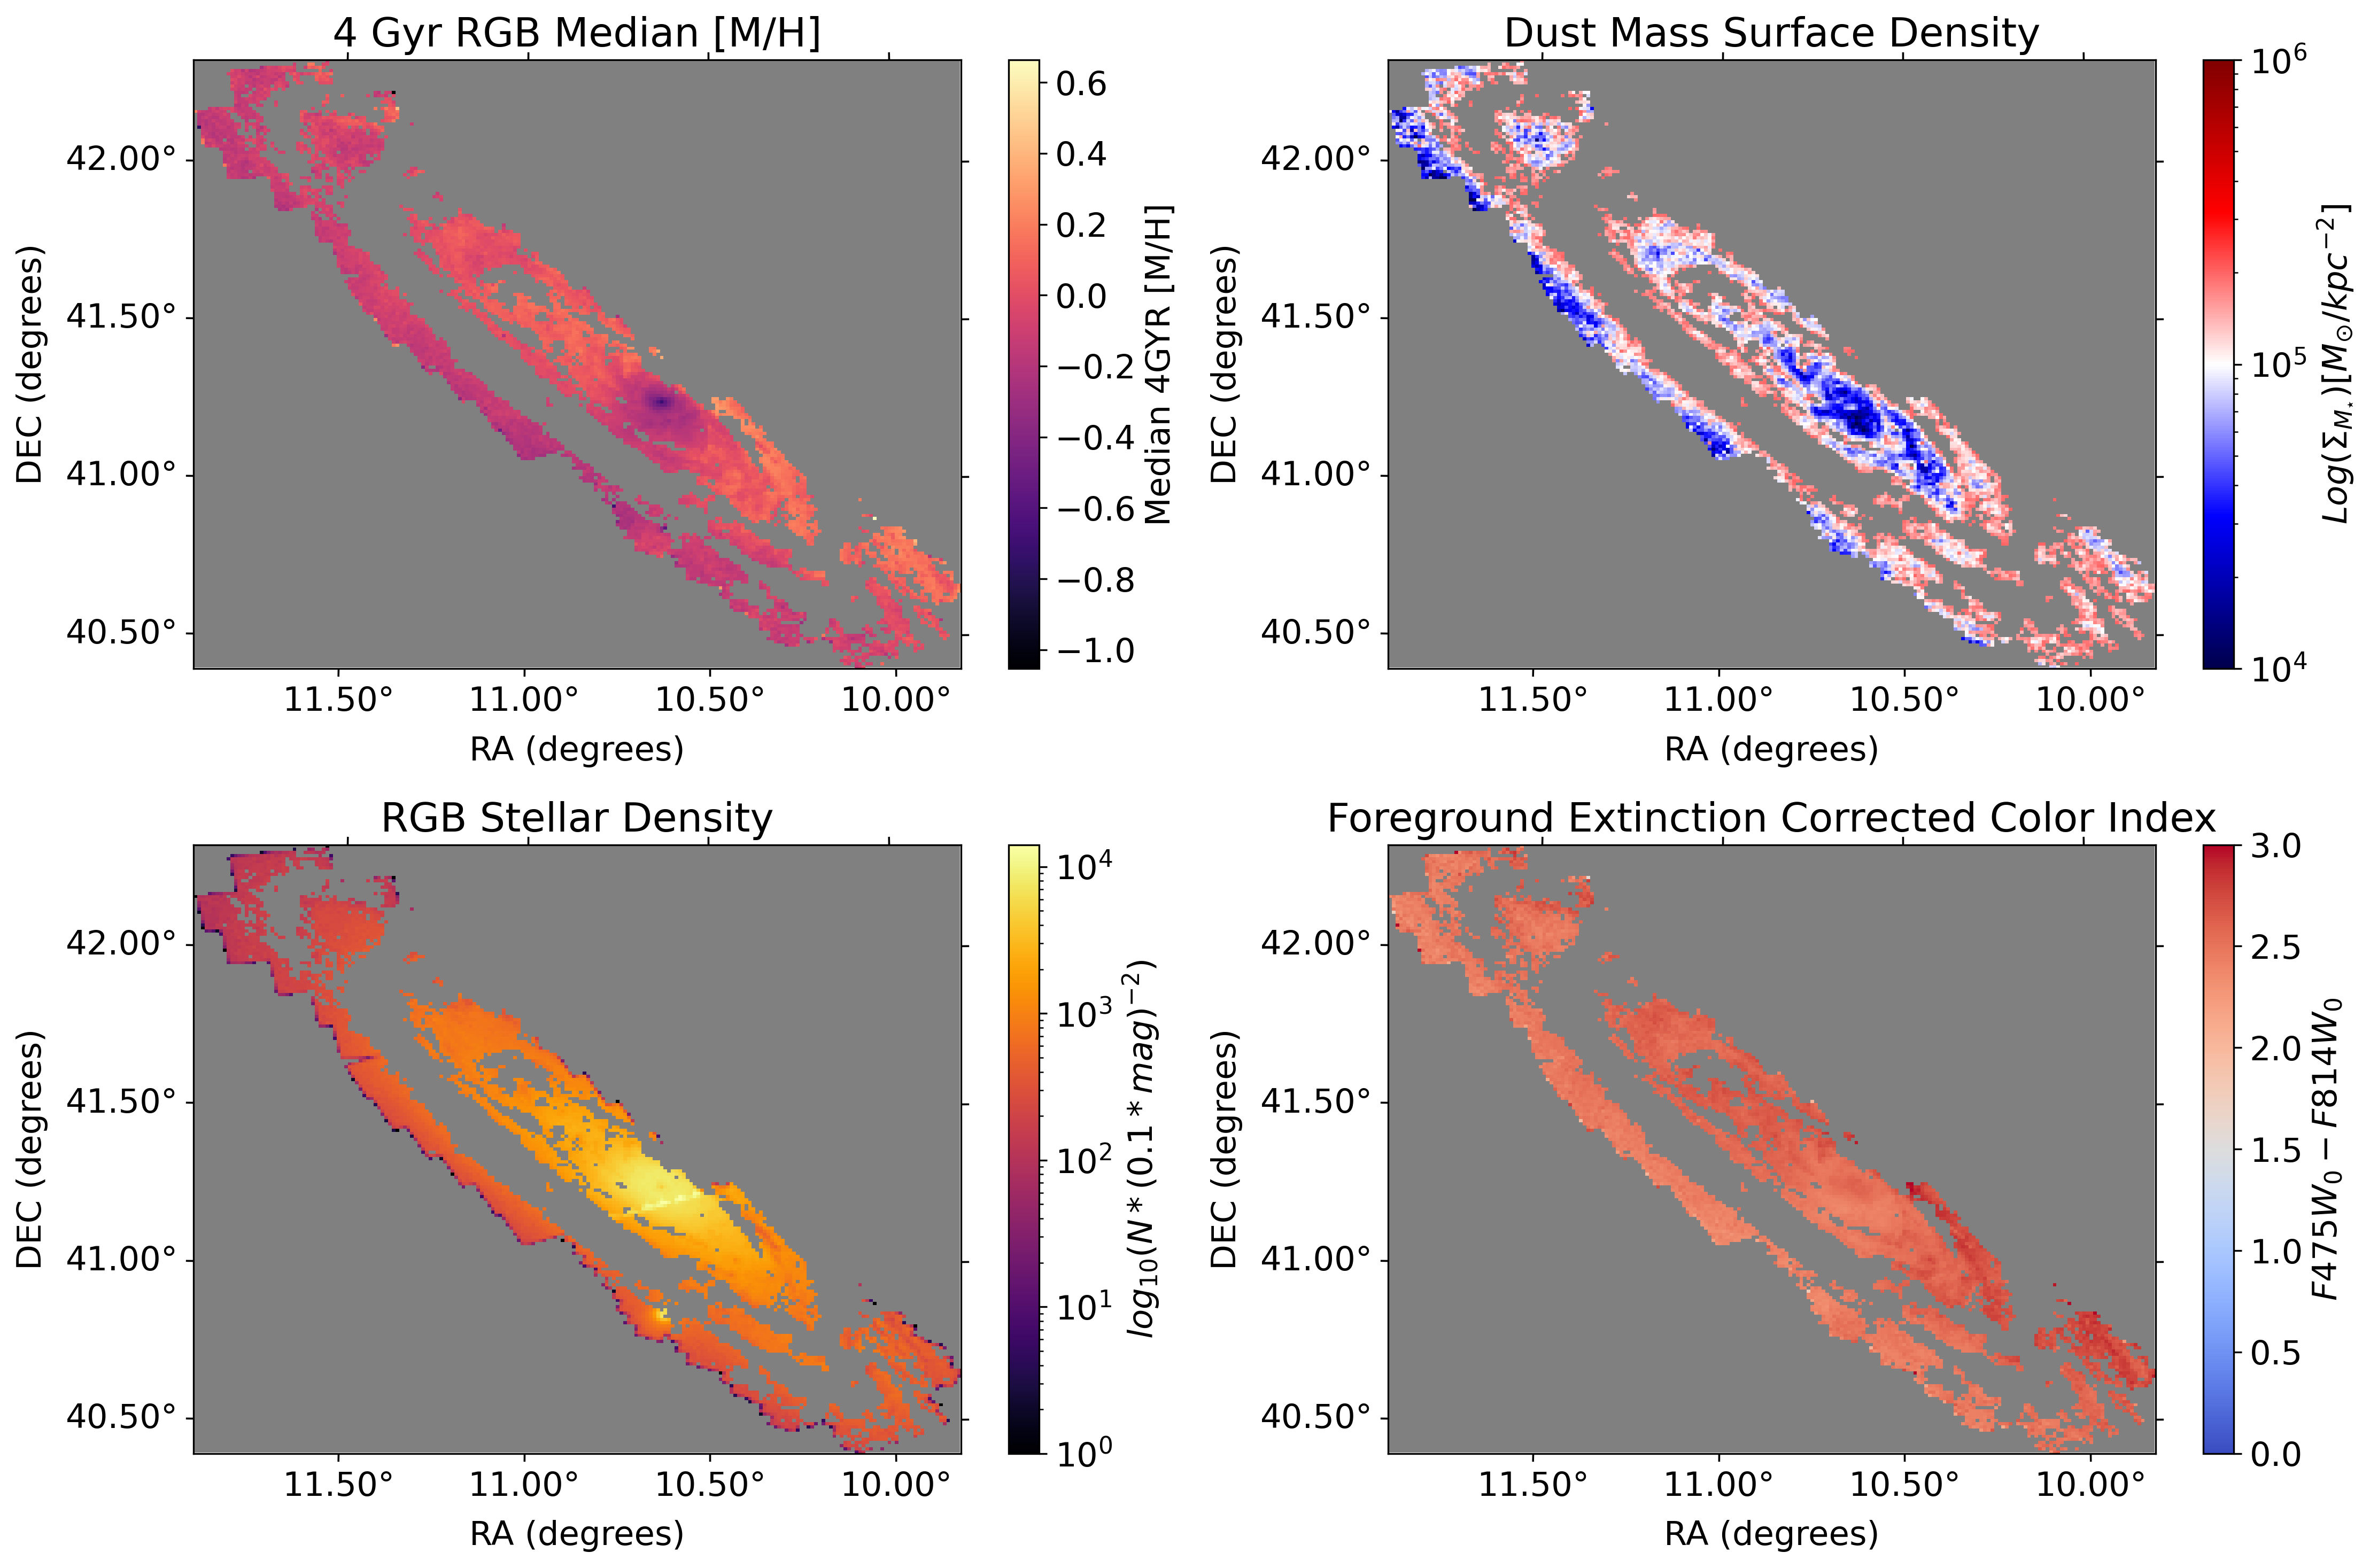

In [26]:
# Exclude high dust mass areas
# hdu = fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits')

def apply_mask_to_map(hdu, map_extname, mask_extname, mask_value2exclude_threshold):
    """
    Apply a mask to a map

    Parameters
    ----------
    hdu : astropy.io.fits.hdu.hdulist.HDUList
        HDU list object
    map_extname : str
        Name of the map to be masked
    mask_extname : str
        Name of the mask to be applied
    mask_value2exclude_threshold : float
        Mask value to be excluded


    Returns
    -------
    masked_map : np.ma.masked_array
        Masked map
    
    """

    # Map of mask being masked
    map_data = hdu[map_extname].data

    # Map of mask being applied
    mask_map = hdu[mask_extname].data

    masked_map = np.ma.masked_array(map_data, (mask_map >= mask_value2exclude_threshold))
    # map_data1 = np.ma.masked_array(map_data1, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data2 = np.ma.masked_array(map_data2, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data3 = np.ma.masked_array(map_data3, (draine_dust_mass_map >= max_dust_mass_value))

    # hdu.close()
    
    return masked_map
    



with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits') as hdu:

# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    extname_list = ['INTERPOLATED_MH','Draine_Dust_Mass_Map', 'STELLAR_DENSITY', 'F475W-F814W_ECORR']

    # map_data0 = hdu[extname_list[0]].data
    # map_data1 = hdu[extname_list[1]].data
    # map_data2 = hdu[extname_list[2]].data
    # map_data3 = hdu[extname_list[3]].data

    # draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data

    # max_dust_mass_value = 3e5

    # map_data0 = np.ma.masked_array(map_data0, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data1 = np.ma.masked_array(map_data1, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data2 = np.ma.masked_array(map_data2, (draine_dust_mass_map >= max_dust_mass_value))
    # map_data3 = np.ma.masked_array(map_data3, (draine_dust_mass_map >= max_dust_mass_value))

    map_data0 = apply_mask_to_map(hdu, extname_list[0], mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=2e5)
    map_data1 = apply_mask_to_map(hdu, extname_list[1], mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=2e5)
    map_data2 = apply_mask_to_map(hdu, extname_list[2], mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=2e5)
    map_data3 = apply_mask_to_map(hdu, extname_list[3], mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=2e5)

    
    fig, axs = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection': WCS(hdu[0].header)})
    # Plot the high_res_data
    im0 = axs[0,0].imshow(map_data0, cmap='magma', aspect='auto', origin='lower')
    axs[0,0].set_title('4 Gyr RGB Median [M/H]')
    cbar0 = plt.colorbar(im0, ax=axs[0,0])
    cbar0.set_label('Median 4GYR [M/H]', fontsize=15)
    cbar0.ax.tick_params(labelsize=15)

    # ax1
    im1 = axs[0,1].imshow(map_data1, cmap='seismic', aspect='auto', origin='lower', norm=LogNorm(vmin=1e4, vmax=1e6), )
    axs[0,1].set_title('Dust Mass Surface Density')
    # axs[0,1].contour(map_data0, levels=contour_levels, colors='black')
    cbar1 = plt.colorbar(im1, ax=axs[0,1])
    cbar1.set_label(r'$Log(\Sigma_{M_{\star}}) [M_{\odot}/kpc^{-2}]$', fontsize=15)

    # ax2
    im2 = axs[1,0].imshow(map_data2, cmap='inferno', aspect='auto', origin='lower', norm=LogNorm())
    # axs[1,0].contour(map_data0, levels=contour_levels, colors='black')
    axs[1,0].set_title('RGB Stellar Density')
    # axs[1,0].invert_yaxis()
    cbar2 = plt.colorbar(im2, ax=axs[1,0])
    cbar2.set_label(r'$log_{10}(N*(0.1*mag)^{-2})$', fontsize=15)


    # ax3
    im3 = axs[1,1].imshow(map_data3, cmap='coolwarm', aspect='auto', origin='lower', vmin=0.0, vmax=3.0)
    # im3 = axs[1,1].scatter(map_data3, map_data2)
    # axs[1,0].contour(map_data0, levels=contour_levels, colors='black')
    axs[1,1].set_title('Foreground Extinction Corrected Color Index')
    # axs[1,0].invert_yaxis()
    cbar3 = plt.colorbar(im3, ax=axs[1,1])
    cbar3.set_label(r'$F475W_{0}-F814W_{0}$', fontsize=15)
    plt.tight_layout()

    # Set RA and DEC coordinates to decimal degrees and add labels
    for ax_row in axs:
        for ax in ax_row:
            ax.coords[0].set_format_unit('deg')
            ax.coords[1].set_format_unit('deg')
            ax.coords[0].set_major_formatter('d.dd')
            ax.coords[1].set_major_formatter('d.dd')
            ax.set_xlabel('RA (degrees)', fontsize=15)
            ax.set_ylabel('DEC (degrees)', fontsize=15)
            ax.tick_params(axis='x', labelsize=15)  # Set x-axis tick labels font size
            ax.tick_params(axis='y', labelsize=15)  # Set y-axis tick labels font size
            ax.invert_xaxis()
            ax.set_facecolor('gray')



    for cbar in [cbar0, cbar1, cbar2, cbar3]:
        cbar.ax.tick_params(labelsize=15)
    
    plt.tight_layout()
    plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/random_subplot_set2.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/random_subplot_set2.jpeg', dpi=300, bbox_inches='tight')
    plt.show()

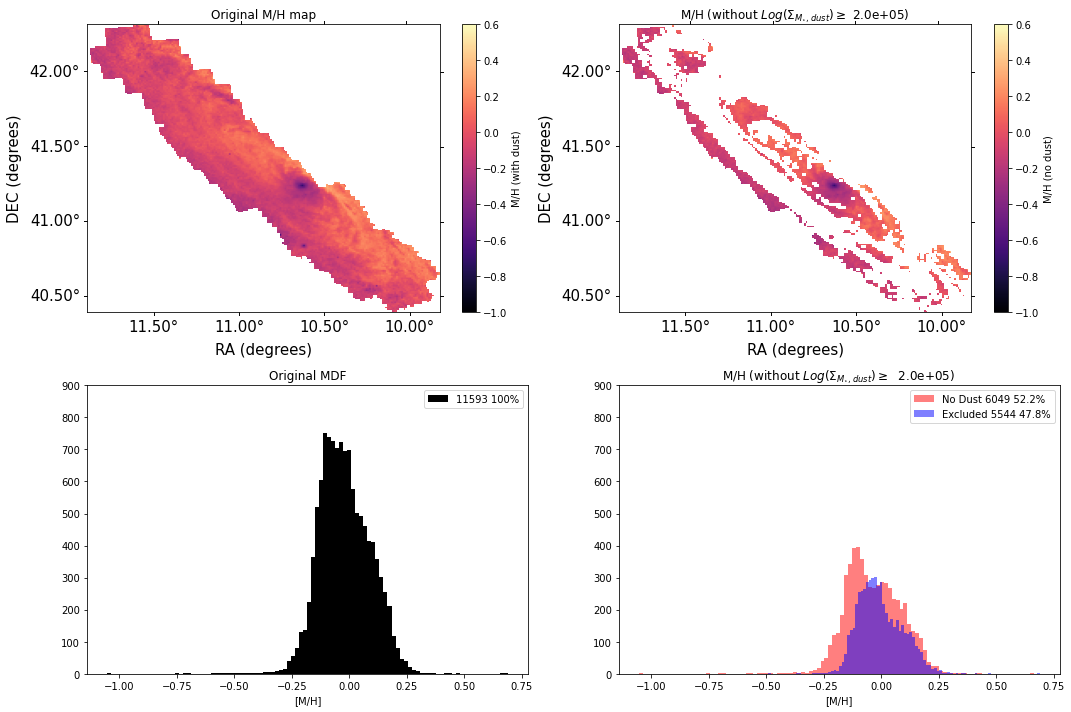

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.gridspec import GridSpec

# Open the FITS file
with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits') as hdu:
    mh_map = hdu['INTERPOLATED_MH'].data
    draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
    wcs = WCS(hdu['INTERPOLATED_MH'].header)
    max_dust_mass_value = 2e5

    # Mask the high dust mass areas
    mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    mh_map_no_dust = mh_map_no_dust.filled()

    # The excluded dust mass values
    excluded_dust_mass = mh_map[draine_dust_mass_map >= max_dust_mass_value]

    # Plot
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig)

    ax0 = fig.add_subplot(gs[0, 0], projection=wcs)
    im0 = ax0.imshow(mh_map, cmap='magma', aspect='auto', origin='lower', vmin=-1.0, vmax=0.6)
    ax0.set_title('Original M/H map')
    cbar0 = plt.colorbar(im0, ax=ax0)
    cbar0.set_label('M/H (with dust)')

    ax1 = fig.add_subplot(gs[0, 1], projection=wcs)
    im1 = ax1.imshow(mh_map_no_dust, cmap='magma', aspect='auto', origin='lower', vmin=-1.0, vmax=0.6)
    max_dust_mass_value_sci = "{:.1e}".format(max_dust_mass_value)
    ax1.set_title(f'M/H (without $Log(\Sigma_{{M_{{\star}},dust}})\geq$ {max_dust_mass_value_sci}) ')
    cbar1 = plt.colorbar(im1, ax=ax1)
    cbar1.set_label('M/H (no dust)')

    ax2 = fig.add_subplot(gs[1, 0])
    mh_map_flat = mh_map.flatten()
    mh_map_flat = mh_map_flat[~np.isnan(mh_map_flat)]
    ax2.hist(mh_map.flatten(), bins=100, color='black', label=f'{len(mh_map_flat)} 100%')
    ax2.set_title('Original MDF')
    ax2.legend()
    ax2.set_xlabel('[M/H]')
    ax2.set_ylim(0, 900)

    ax3 = fig.add_subplot(gs[1, 1])
    mh_map_no_dust_flat = mh_map_no_dust.flatten()
    mh_map_no_dust_flat = mh_map_no_dust_flat[~np.isnan(mh_map_no_dust_flat)]
    excluded_dust_mass = excluded_dust_mass.flatten()

    ax3.hist(mh_map_no_dust_flat, bins=100, color='red', alpha=0.5, histtype='stepfilled', label=f'No Dust {len(mh_map_no_dust_flat)} {np.round(len(mh_map_no_dust_flat)/len(mh_map_flat)*100, 1)}%')
    ax3.hist(excluded_dust_mass, bins=100, color='blue', alpha=0.5, histtype='stepfilled', label=f'Excluded {len(excluded_dust_mass)} {np.round(len(excluded_dust_mass)/len(mh_map_flat)*100, 1)}%')
    max_dust_mass_value_sci = "{:.1e}".format(max_dust_mass_value)
    ax3.set_title(f'M/H (without $Log(\Sigma_{{M_{{\star}},dust}})\geq$  {max_dust_mass_value_sci}) ')
    ax3.set_xlabel('[M/H]')
    ax3.set_ylim(0, 900)
    ax3.legend()

    # Set RA and DEC coordinates to decimal degrees and add labels only to the top row
    for ax in [ax0, ax1]:
        ax.coords[0].set_format_unit('deg')
        ax.coords[1].set_format_unit('deg')
        ax.coords[0].set_major_formatter('d.dd')
        ax.coords[1].set_major_formatter('d.dd')
        ax.set_xlabel('RA (degrees)', fontsize=15)
        ax.set_ylabel('DEC (degrees)', fontsize=15)
        ax.tick_params(axis='x', labelsize=15)  # Set x-axis tick labels font size
        ax.tick_params(axis='y', labelsize=15)  # Set y-axis tick labels font size
        ax.invert_xaxis()

    plt.tight_layout()
    plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_map_exclude.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_map_exclude.jpeg', dpi=300, bbox_inches='tight')
    plt.show()

In [8]:
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
#     f814w_map = hdu['F814W_VEGA_ECORR'].data
#     f475w_f814w_map = hdu['F475W-F814W_ECORR'].data
#     draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
#     max_dust_mass_value = 3e5


#     # Mask the high dust mass areas
#     f814w_map_no_dust = np.ma.masked_array(f814w_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     f814w_map_no_dust = f814w_map_no_dust.filled()

#     f475w_f814w_map_no_dust = np.ma.masked_array(f475w_f814w_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     f475w_f814w_map_no_dust = f475w_f814w_map_no_dust.filled()

#     # The excluded dust mass values
#     excluded_f814w_map = f814w_map[draine_dust_mass_map >= max_dust_mass_value]
#     excluded_f475w_f814w_map = f475w_f814w_map[draine_dust_mass_map >= max_dust_mass_value]


#     # plot
#     fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

#     axs[0].scatter(f475w_f814w_map, f814w_map, s=5, alpha=0.5)
#     axs[0].set_title('Original Color Magnitude Diagram')
#     axs[0].set_xlabel('F475W-F814W')
#     axs[0].set_ylabel('F814W')
#     axs[0].set_ylim(23, 21)


#     axs[1].scatter(f475w_f814w_map_no_dust, f814w_map_no_dust, s=5, alpha=0.5, label='No Dust')
#     axs[1].set_title(f'Color Magnitude Diagram exclude dust mass >= {max_dust_mass_value}')
#     axs[1].set_xlabel('F475W-F814W')

#     axs[2].scatter(excluded_f475w_f814w_map, excluded_f814w_map, s=5, alpha=0.5, color='red', label='Excluded')
#     axs[2].set_xlabel('F475W-F814W')

#     plt.tight_layout()
#     plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/cmd_with_and_without_dust.pdf')
#     plt.legend()

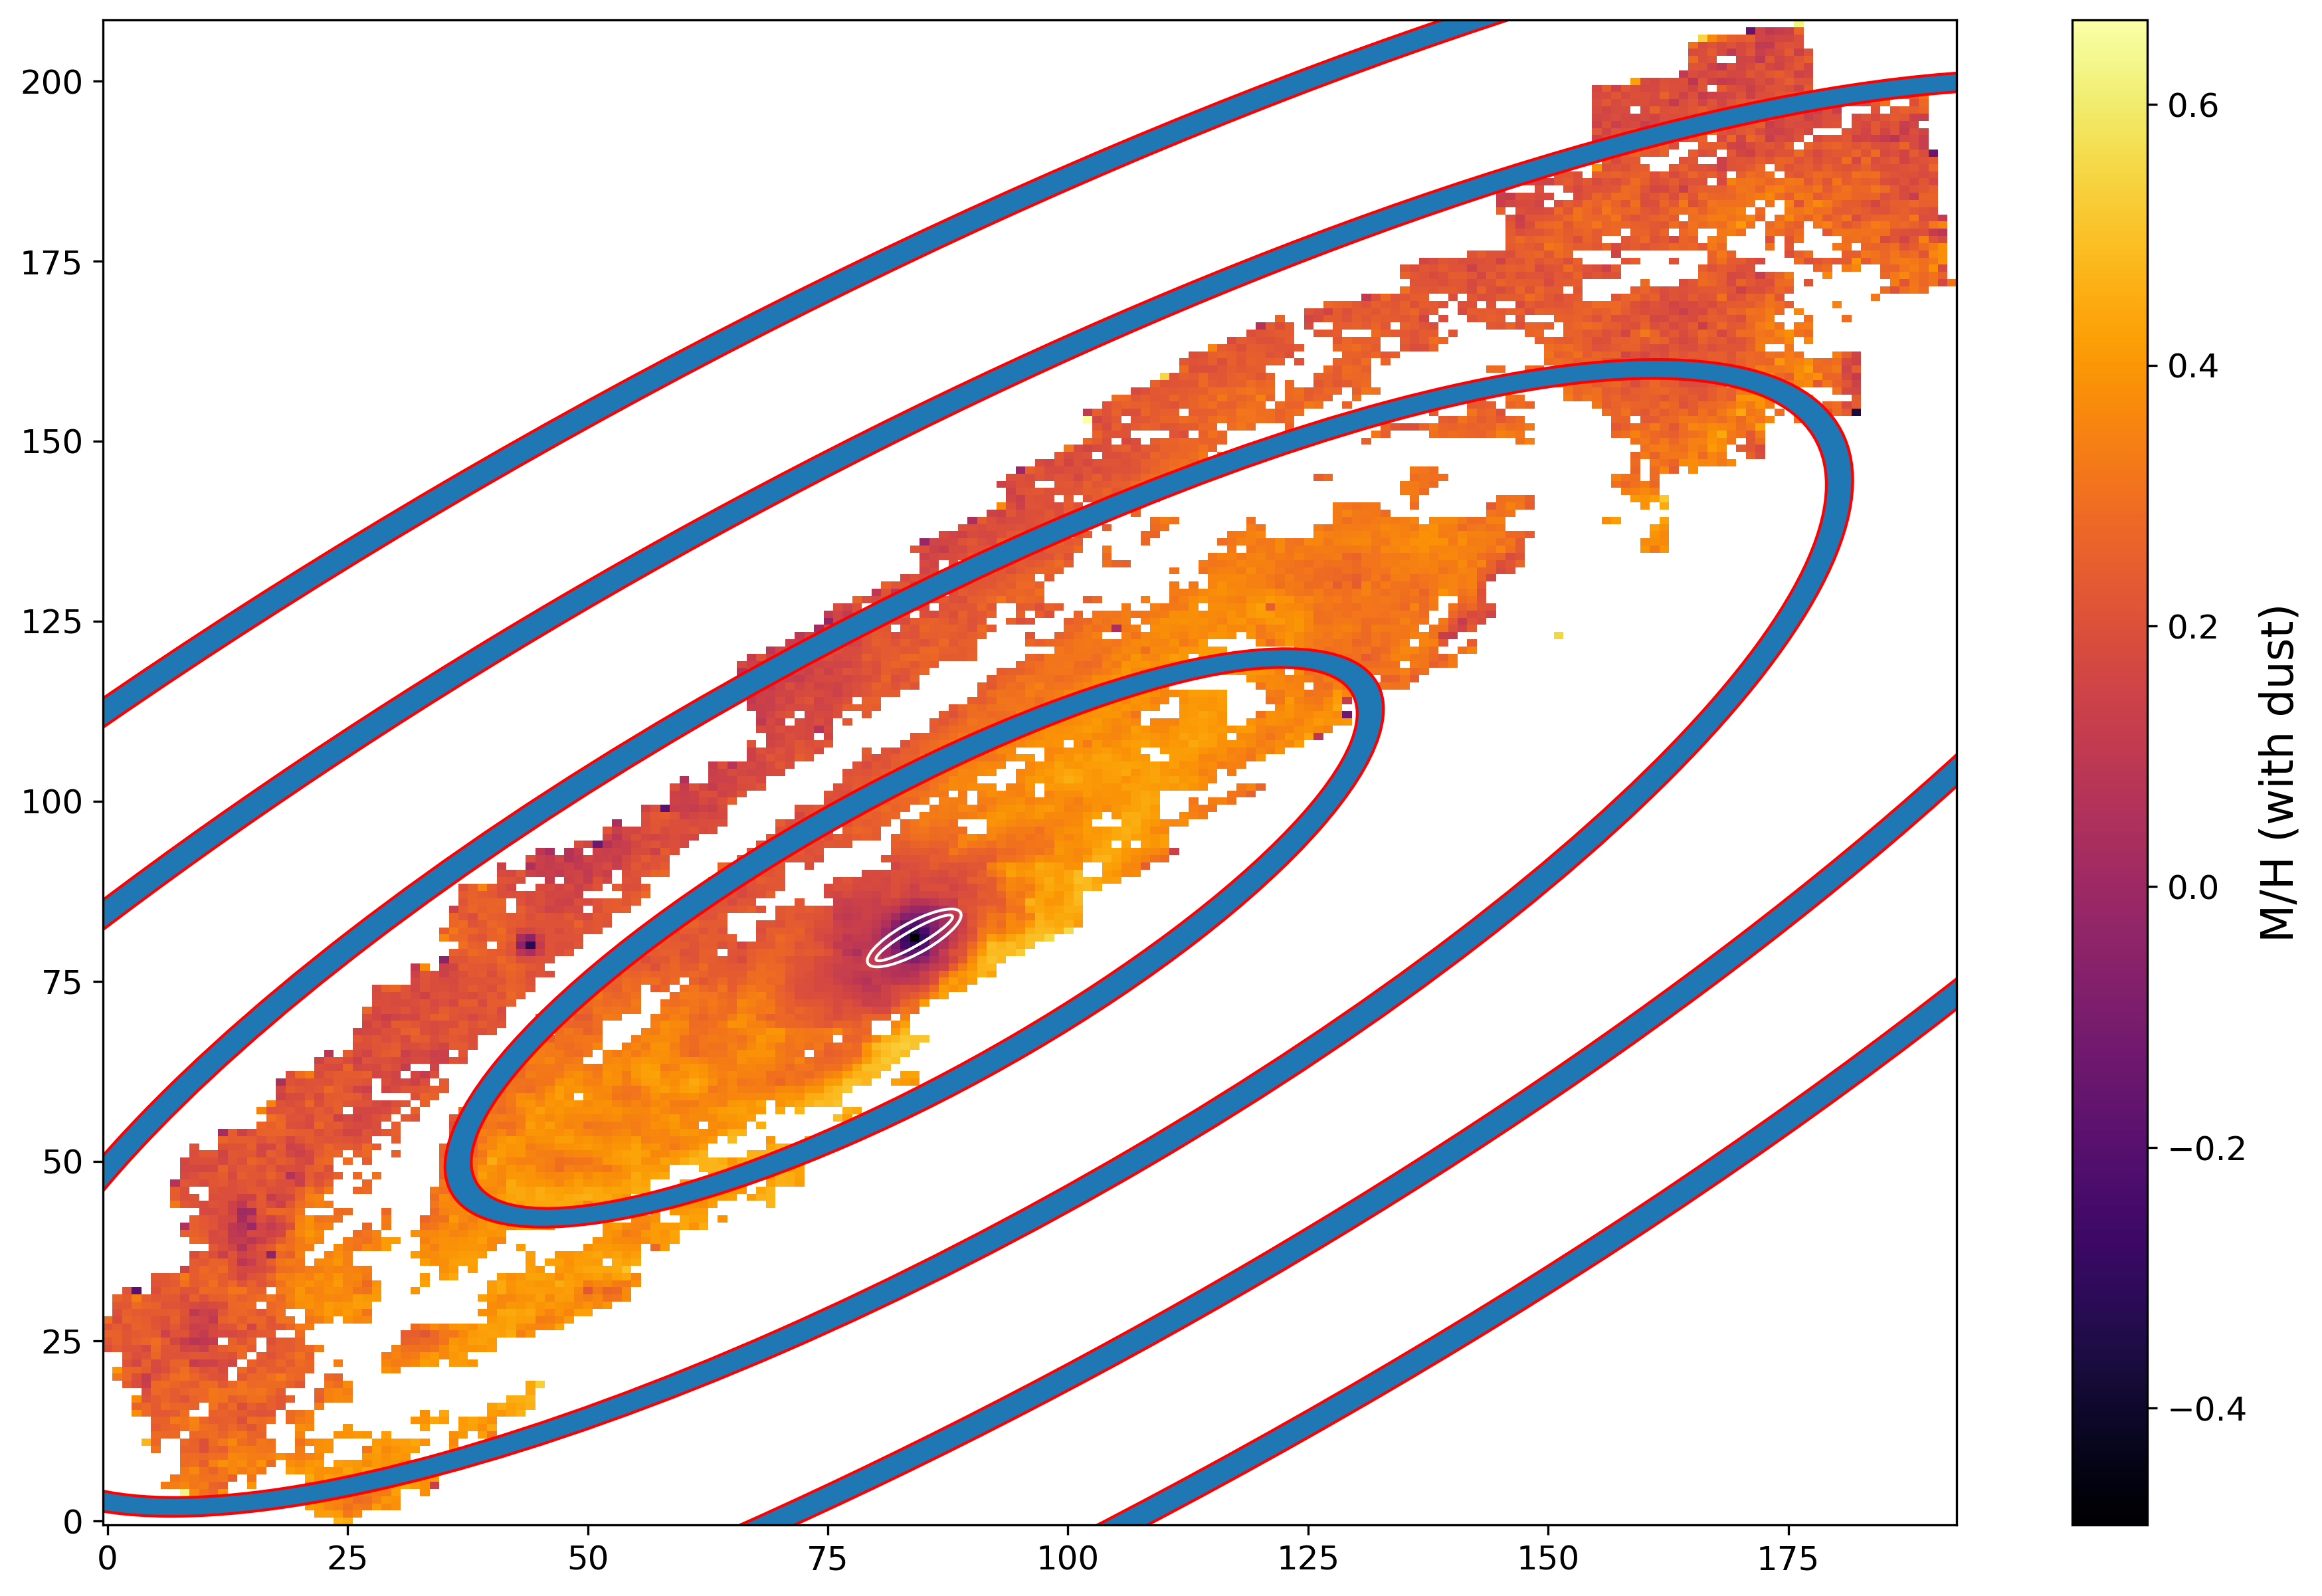

In [53]:
from matplotlib import patches

with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
    mh_map = hdu['INTERPOLATED_MH'].data
    draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
    max_dust_mass_value = 3e5
    # Mask the high dust mass areas
    mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    mh_map_no_dust = mh_map_no_dust.filled()
    # mh_map_no_dust = np.fill(mh_map_no_dust, np.nan, inplace=True)

    # # The excluded dust mass values
    excluded_dust_mass = mh_map[draine_dust_mass_map >= max_dust_mass_value]

    fig, ax = plt.subplots(figsize=(15, 10))

    # im0 = plt.imshow(mh_map, cmap='inferno', aspect='auto', origin='lower')
    im0 = plt.imshow(mh_map_no_dust, cmap='inferno', aspect='auto', origin='lower')
    cbar0 = plt.colorbar(im0)
    cbar0.set_label('M/H (with dust)')

    ax.add_patch(patches.Annulus(xy=(84, 81), r=(60,20),  width=3, fill=True, edgecolor='red', angle=38.0))
    ax.add_patch(patches.Annulus(xy=(84, 81), r=(120,40), width=3, fill=True, edgecolor='red', angle=38.0))
    ax.add_patch(patches.Annulus(xy=(84, 81), r=(180,60), width=3, fill=True, edgecolor='red', angle=38.0))
    ax.add_patch(patches.Annulus(xy=(84, 81), r=(220,80), width=3, fill=True, edgecolor='red', angle=38.0))
    
    # central region patch
    ax.add_patch(patches.Annulus(xy=(84, 81), r=(6,2), width=1, fill=False, edgecolor='white', angle=38.0))
    plt.show()

In [290]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches


# def create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, array_shape):
#     y,x = np.ogrid[-center_y:array_shape[0]-center_y, -center_x:array_shape[1]-center_x]
#     mask = ((x*np.cos(angle) + y*np.sin(angle))**2/semi_major_axis**2 
#           + (y*np.cos(angle) - x*np.sin(angle))**2/semi_minor_axis**2) <= 1
#     return mask

# # Define the center of the ellipse and the semi-major and semi-minor axes
# center_x, center_y = 84, 81
# semi_major_axis, semi_minor_axis = 60, 20
# # semi_major_axis, semi_minor_axis = 120, 40

# # semi_major_axis, semi_minor_axis = 6, 2

# angle = np.deg2rad(38.0)  # Angle in radians

# # Create the elliptical mask
# mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape)

# # Apply the mask to the mh_map array
# mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

# # Plot the masked array
# fig, ax = plt.subplots(figsize=(15, 10))
# im0 = plt.imshow(mh_map_masked, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
# cbar0 = plt.colorbar(im0)
# cbar0.set_label('M/H (with dust)')

# # Create a Patch as a proxy artist for the legend
# median_patch = mpatches.Patch(color='none', label=f'Median = {np.round(np.nanmedian(mh_map_masked), 3)} MH')
# ax.legend(handles=[median_patch])

# plt.show()

In [4]:
# # from scipy.ndimage import rotate

# def create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, array_shape, inner_radius, outer_radius):
#     # x*=
#     y,x = np.ogrid[-center_y:array_shape[0]-center_y, -center_x:array_shape[1]-center_x]
#     ellipse = ((x*np.cos(angle) + y*np.sin(angle))**2/semi_major_axis**2 
#           + (y*np.cos(angle) - x*np.sin(angle))**2/semi_minor_axis**2)
#     mask = (ellipse >= inner_radius**2) & (ellipse <= outer_radius**2)
#     return mask

# # Define the inner and outer radii
# center_x, center_y = 84, 81
# semi_major_axis, semi_minor_axis = 180, 60
# inner_radius, outer_radius = 0.01, 1.2
# angle = np.deg2rad(38.0)  # Angle in radians 


# # Create the elliptical mask
# mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, inner_radius, outer_radius)

# # Apply the mask to the mh_map array
# mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

# # Rotate the mh_map
# mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)


# # Plot the masked array
# fig, ax = plt.subplots(figsize=(35, 10))
# im0 = plt.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
# cbar0 = plt.colorbar(im0)
# cbar0.set_label('M/H (with dust)')

# # Create a Patch as a proxy artist for the legend
# median_patch = mpatches.Patch(color='none', label=f'Median = {np.round(np.nanmedian(mh_map_masked), 3)} MH')
# ax.legend(handles=[median_patch])
# plt.hlines(134, 0, 300, color='black')
# plt.ylim(100, 200)
# plt.xlim(0, 300)

# plt.show()

In [184]:
# iterate through the inner and outer radii a plot each individual plot

# ellip_median_list = []
# # Define the inner and outer radii
# center_x, center_y = 84, 81
# semi_major_axis, semi_minor_axis = 180, 60
# inner_radius, outer_radius = 0.01, 1.2
# angle = np.deg2rad(45.0)  # Angle in radians
# for i in np.linspace(0.1, 1.0, 10):
#     mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, i, i+0.1)
#     mh_map_masked = np.where(mask, mh_map, np.nan)
#     mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)
#     fig, ax = plt.subplots(figsize=(15, 10))
#     im0 = plt.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
#     cbar0 = plt.colorbar(im0)
#     cbar0.set_label('M/H (with dust)')
#     plt.title(f'{i} - {i+0.1}')

#     # Create a Patch as a proxy artist for the legend
#     ellip_median = np.round(np.nanmedian(mh_map_masked), 3)
#     median_patch = mpatches.Patch(color='none', label=f'Median = {ellip_median} MH')
#     ax.legend(handles=[median_patch])
#     plt.hlines(134, 0, 300, color='black')


#     ellip_median_list.append(ellip_median)

#     plt.show()

In [103]:
# Load the FITS file
with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits') as hdu:
    header = hdu[1].header

    # Extract the WCS
    wcs = WCS(header)

    # Calculate the scale in degrees per pixel
    # scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
    wcs.wcs.cdelt = [np.rad2deg(np.radians(0.01)*np.cos(np.radians(wcs.wcs.crval[0]))), 0.01] # pixel scale in degrees/pixel #* Works with the right scaling...
    wcs.wcs.cunit = ["deg", "deg"]

    scale_deg_per_pix = wcs.wcs.cdelt[1]
    scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive

    # Assume a distance to the object in kpc
    distance_kpc = 776  # Replace with the actual distance

    # Convert the scale to kpc per pixel
    scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
    print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")

    print(wcs)

    center_x_pix = wcs.wcs.crpix[0]
    center_y_pix = wcs.wcs.crpix[1]

    center_x_ra = wcs.wcs.crval[0]
    center_y_dec = wcs.wcs.crval[1]

    print(f"Center pixel: {center_x_pix}, {center_y_pix}")
    print(f"Center RA, Dec: {center_x_ra}, {center_y_dec}")

Scale: 0.01 deg/pix = 0.13543754995475998 kpc/pix
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 10.65 41.2 
CRPIX : 84.0 81.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 0.009827744470593314 0.01 
NAXIS : 209  193
Center pixel: 84.0, 81.0
Center RA, Dec: 10.65, 41.2


In [104]:
scale_kpc_per_pix

0.13543754995475998

In [105]:
scale_deg_per_pix

0.01

In [4]:
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits') as hdu:
#     mh_map = hdu['INTERPOLATED_MH'].data
#     draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
#     max_dust_mass_value = 3e5
#     # Mask the high dust mass areas
#     mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     mh_map_no_dust = mh_map_no_dust.filled()

#     # The excluded dust mass values
#     excluded_dust_mass_map = mh_map[draine_dust_mass_map >= max_dust_mass_value]
#     # Get coordinate system
#     wcs = WCS(header = hdu[0].header)

#     # Calculate the scale in degrees per pixel
#     scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
#     scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive
#     # scale_deg_per_pix = 0.01

#     # Assume a distance to the object in kpc
#     distance_kpc = 778  # Replace with the actual distance

#     # Convert the scale to kpc per pixel
#     scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
#     print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")


# center_x, center_y = 117, 150 # Rotated center pix value
# semi_major_axis, semi_minor_axis = 16.5, 60
# inner_radius, outer_radius = 0.0, 3.5
# # inner_radius, outer_radius = 0.5, 0.55 # radius of ellip in pixels
# # inner_radius, outer_radius = 0.1, 50 # radius of ellip in pixels
# angle = np.deg2rad(-45)  # Angle in radians


# runs = np.linspace(inner_radius*scale_kpc_per_pix, outer_radius*scale_kpc_per_pix, 20)
# delta_runs = runs[1]-runs[0]
# num_runs = len(runs)

# mask = create_elliptical_mask(wcs.wcs.crpix[0], wcs.wcs.crpix[1], semi_major_axis, semi_minor_axis, angle, mh_map.shape, inner_radius, outer_radius)
# mh_map_masked = np.where(mask, mh_map, np.nan)

# # Exclude dust mass value
# mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map_no_dust.shape, inner_radius, outer_radius)
# mh_map_nodust_masked = np.where(mask, mh_map_no_dust, np.nan)

# # Rotate the mh_map
# # mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)
# mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)
# mh_map_nodust_rotated = rotate(mh_map_nodust_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)

# # Select PHAT and PHAST half by isolating the right and left half at the center
# left_side_mask = np.indices(mh_map_rotated.shape)[1] < center_x
# right_side_mask = np.indices(mh_map_rotated.shape)[1] >= center_x
# mh_map_rotated_phat = np.where(left_side_mask, np.nan, mh_map_rotated)
# mh_map_rotated_phast = np.where(right_side_mask, np.nan, mh_map_rotated)
# print(f'PHAT Log(M/H)={np.nanmedian(mh_map_rotated_phat)}')
# print(f'PHAST Log(M/H)={np.nanmedian(mh_map_rotated_phast)}')
# print(f'PHAT&PHAST(M31) Log(M/H)={np.nanmedian(mh_map_rotated)}')

# fig, axs = plt.subplots(2, 1, figsize=(25, 15), dpi=300)  # Adjust the figure size as needed

# # # Calculate the maximum extent from the center in both directions
# # max_extent_x = max(center_x, mh_map_rotated.shape[0] - center_x) * scale_kpc_per_pix
# # max_extent_y = max(center_y, mh_map_rotated.shape[1] - center_y) * scale_kpc_per_pix

# # Calculate the physical size of the image in kpc
# width_kpc = mh_map_rotated.shape[1] * scale_kpc_per_pix
# height_kpc = mh_map_rotated.shape[0] * scale_kpc_per_pix

# # Calculate the left, right, bottom, and top values for the extent
# left = -center_x * scale_kpc_per_pix
# right = (mh_map_rotated.shape[1] - center_x) * scale_kpc_per_pix
# bottom = -center_y * scale_kpc_per_pix
# top = (mh_map_rotated.shape[0] - center_y) * scale_kpc_per_pix

# # Adjust the extent so the center is at (0,0)
# extent = [left, right, bottom, top]


#         # im0 = axs.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
# # im0 = axs[idx].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=extent)

# im0 = axs[0].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
# fig.colorbar(im0, ax=axs[0]).ax.tick_params(labelsize=15)
# # axs[0].scatter(center_x, center_y, s=100, c='red', marker='+', label='New Center')


# im1 = axs[1].imshow(mh_map_nodust_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
# fig.colorbar(im1, ax=axs[1]).ax.tick_params(labelsize=15)
# axs[1].scatter(center_x, center_y, s=100, c='red', marker='+', label='New Center')

# for axs in [axs[0], axs[1]]:
#     axs.set_xlabel('RA (kpc)', fontsize=15)
#     axs.set_ylabel('DEC (kpc)', fontsize=15)
#     axs.set_ylim(100, 200)
#     # axs.set_xlim(center_x*scale_kpc_per_pix - max_extent_x, center_x*scale_kpc_per_pix + max_extent_x)
#     # axs.set_ylim(center_y*scale_kpc_per_pix - max_extent_y, center_y*scale_kpc_per_pix + max_extent_y)
#     axs.legend(fontsize=15)
#     axs.grid(False)

# plt.show()

Scale: 0.01 deg/pix = 0.13543754995475998 kpc/pix
PHAT Log(M/H)=-0.03524493789208264
PHAST Log(M/H)=-0.007366239466000726
PHAT&PHAST(M31) Log(M/H)=-0.027571675744855008


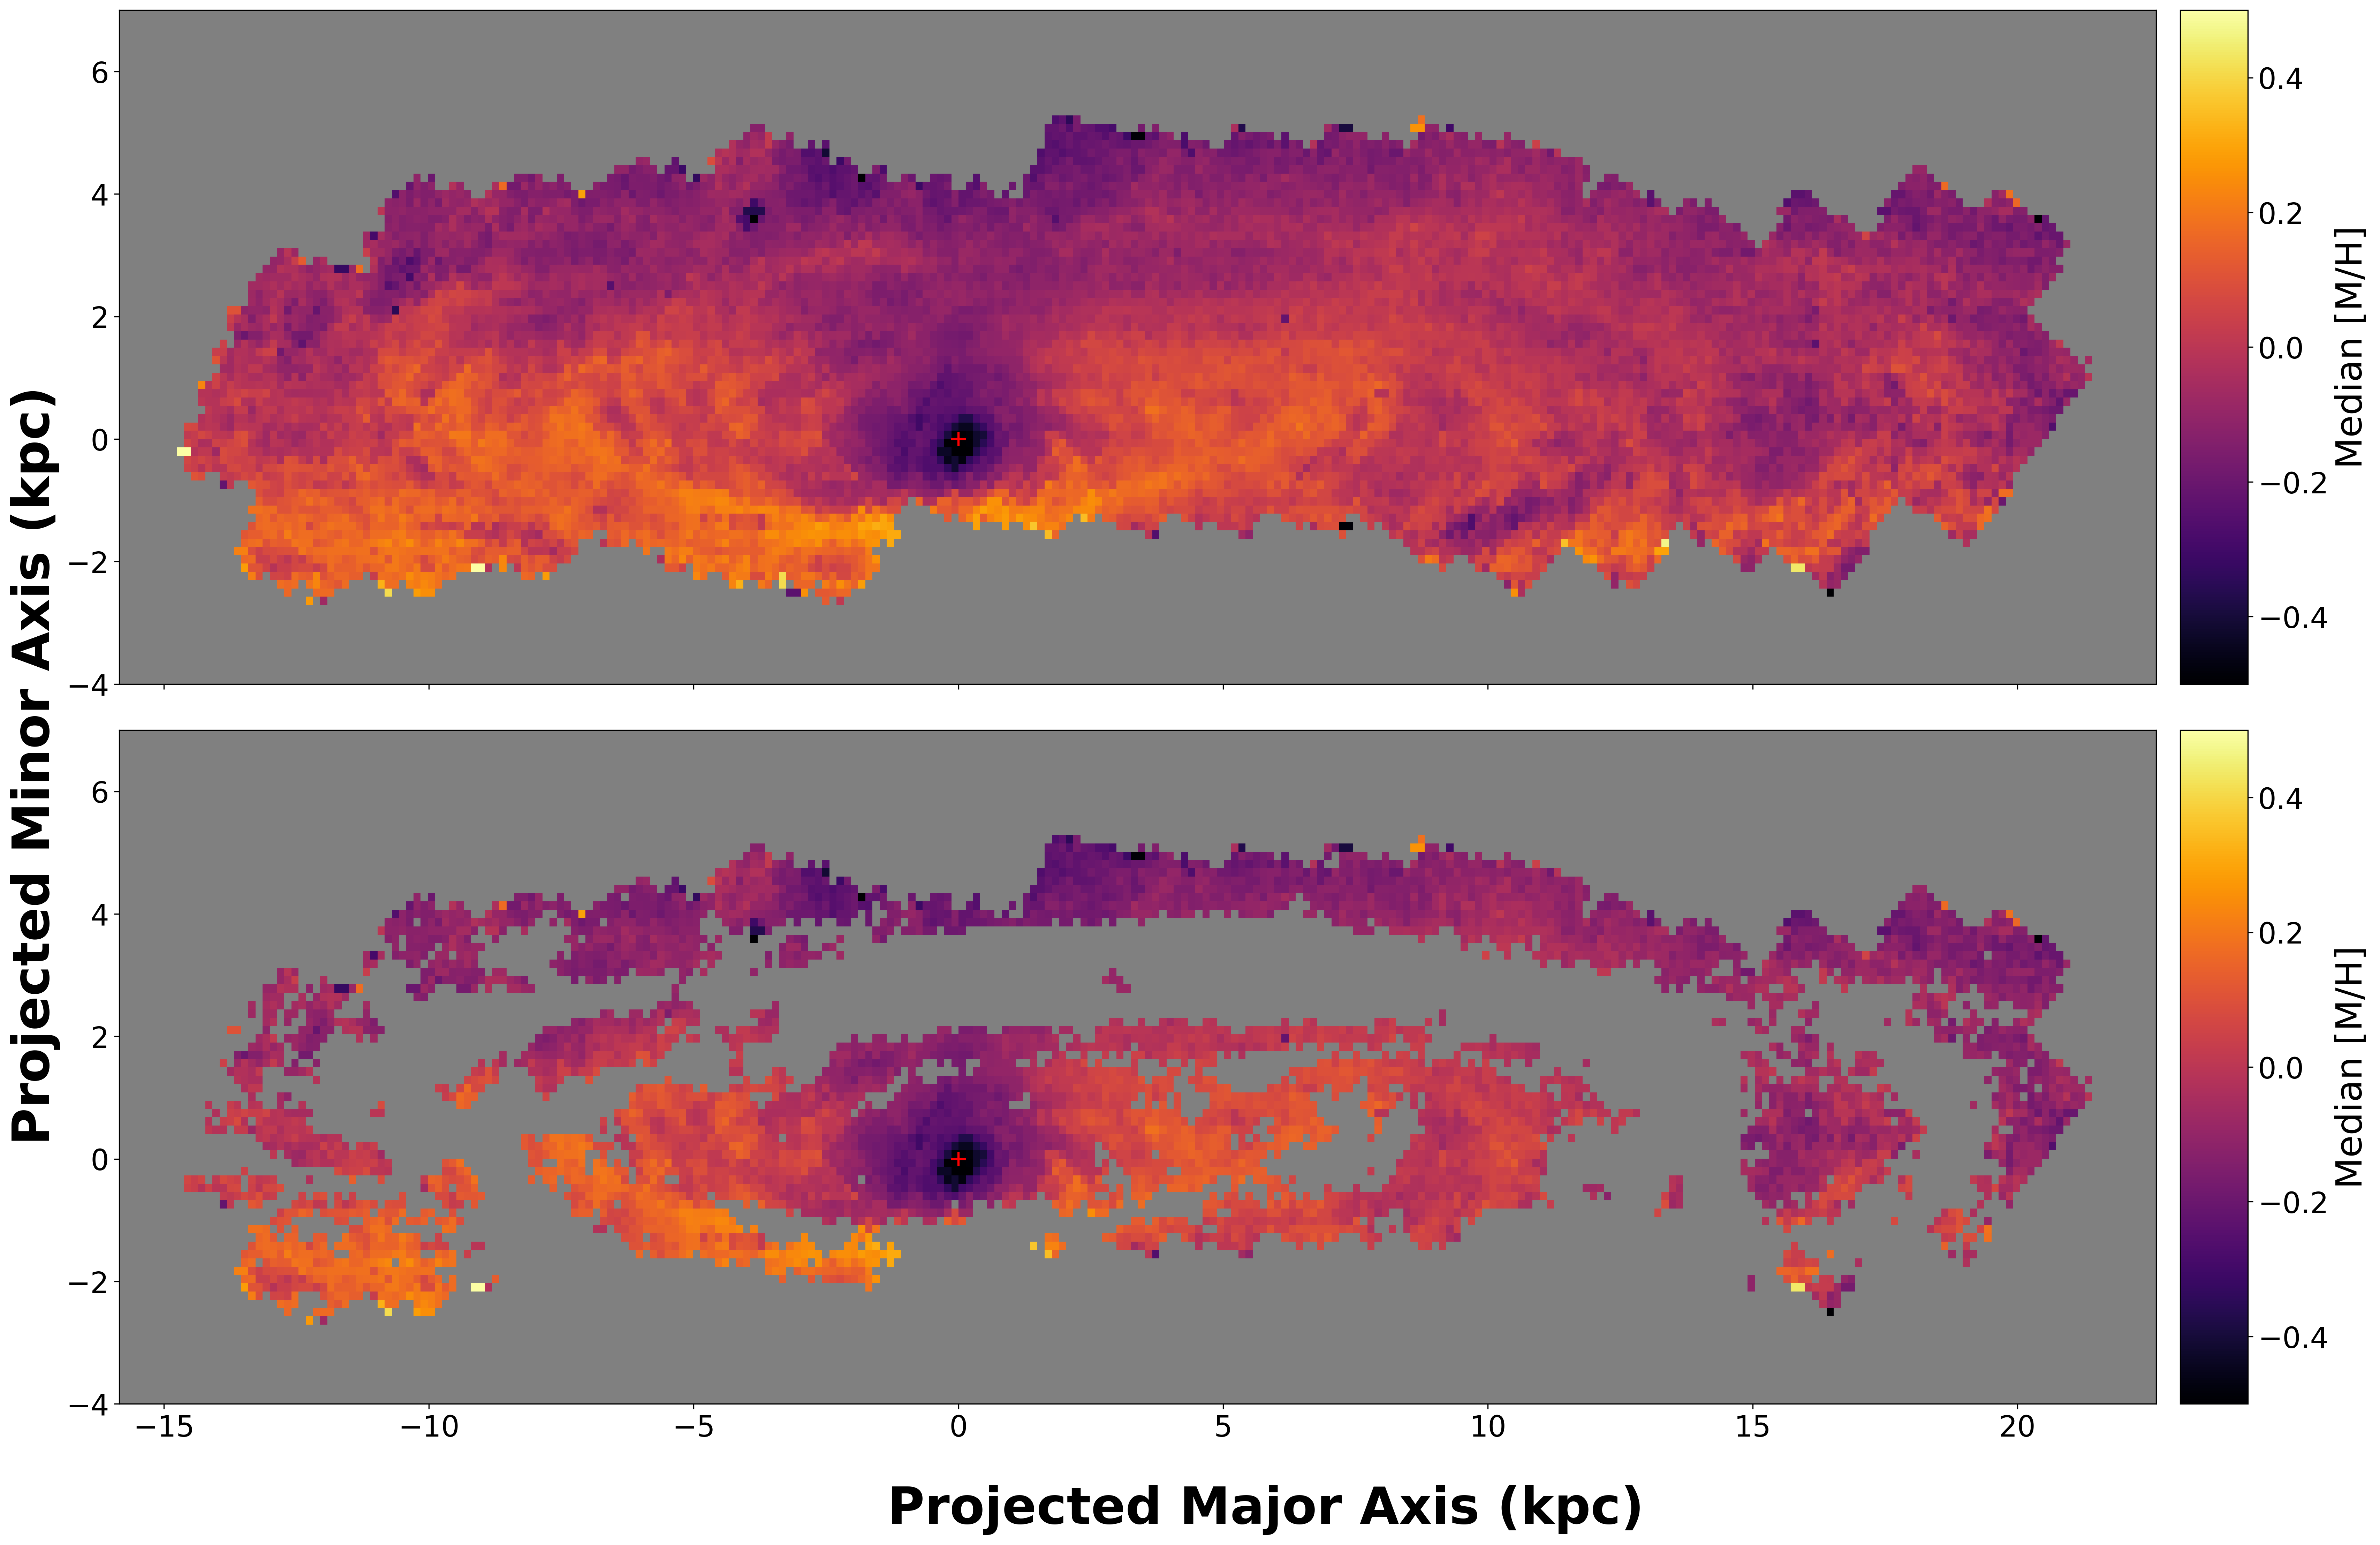

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from scipy.ndimage import rotate

def create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, shape, inner_radius, outer_radius):
    y, x = np.ogrid[:shape[0], :shape[1]]
    x_centered = x - center_x
    y_centered = y - center_y
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    ellipse = ((x_centered * cos_angle + y_centered * sin_angle) ** 2 / semi_major_axis ** 2 +
               (x_centered * sin_angle - y_centered * cos_angle) ** 2 / semi_minor_axis ** 2)
    mask = (ellipse >= inner_radius ** 2) & (ellipse <= outer_radius ** 2)
    return mask

with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits') as hdu:
    mh_map = hdu['INTERPOLATED_MH'].data
    draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
    max_dust_mass_value = 2e5
    mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
    mh_map_no_dust = mh_map_no_dust.filled()
    excluded_dust_mass_map = mh_map[draine_dust_mass_map >= max_dust_mass_value]
    wcs = WCS(header=hdu[0].header)
    wcs.wcs.cdelt = [np.rad2deg(np.radians(0.01) * np.cos(np.radians(wcs.wcs.crval[0]))), 0.01]
    wcs.wcs.cunit = ["deg", "deg"]
    scale_deg_per_pix = np.abs(wcs.wcs.cdelt[1])
    distance_kpc = 776
    scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
    print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")

center_x, center_y = 117, 135
semi_major_axis, semi_minor_axis = 16.5, 60
inner_radius, outer_radius = 0.0, 3.9
angle = np.deg2rad(-45)

mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, inner_radius, outer_radius)
mh_map_masked = np.where(mask, mh_map, np.nan)
mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map_no_dust.shape, inner_radius, outer_radius)
mh_map_nodust_masked = np.where(mask, mh_map_no_dust, np.nan)
mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)
mh_map_nodust_rotated = rotate(mh_map_nodust_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)

left_side_mask = np.indices(mh_map_rotated.shape)[1] < center_x
right_side_mask = np.indices(mh_map_rotated.shape)[1] >= center_x
mh_map_rotated_phat = np.where(left_side_mask, np.nan, mh_map_rotated)
mh_map_rotated_phast = np.where(right_side_mask, np.nan, mh_map_rotated)
print(f'PHAT Log(M/H)={np.nanmedian(mh_map_rotated_phat)}')
print(f'PHAST Log(M/H)={np.nanmedian(mh_map_rotated_phast)}')
print(f'PHAT&PHAST(M31) Log(M/H)={np.nanmedian(mh_map_rotated)}')

fig, axs = plt.subplots(2, 1, figsize=(25, 15), dpi=300, sharex=True, sharey=True)

# Convert center_x and center_y to kpc
center_x_kpc = (center_x - mh_map_rotated.shape[1] / 2) * scale_kpc_per_pix
center_y_kpc = (center_y - mh_map_rotated.shape[0] / 2) * scale_kpc_per_pix

# Shift the image to center (center_x, center_y) at (0, 0)
shift_x = center_x - mh_map_rotated.shape[1] / 2
shift_y = center_y - mh_map_rotated.shape[0] / 2

width_kpc = mh_map_rotated.shape[1] * scale_kpc_per_pix
height_kpc = mh_map_rotated.shape[0] * scale_kpc_per_pix
extent = [-width_kpc / 2 - shift_x * scale_kpc_per_pix, width_kpc / 2 - shift_x * scale_kpc_per_pix,
          -height_kpc / 2 - shift_y * scale_kpc_per_pix, height_kpc / 2 - shift_y * scale_kpc_per_pix]

# Set gray background for the plots
for ax in axs:
    ax.set_facecolor('gray')

im0 = axs[0].imshow(np.flip(mh_map_rotated, axis=0), cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=extent)
cbar0 = fig.colorbar(im0, ax=axs[0], pad=0.01, aspect=10)
cbar0.ax.tick_params(labelsize=20)
cbar0.set_label('Median [M/H]', fontsize=25)

im1 = axs[1].imshow(np.flip(mh_map_nodust_rotated, axis=0), cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=extent)
cbar1 = fig.colorbar(im1, ax=axs[1], pad=0.01, aspect=10)
cbar1.ax.tick_params(labelsize=20)
cbar1.set_label('Median [M/H]', fontsize=25)



#* Plot the center point at (0, 0)
axs[0].scatter(0, 0, s=100, c='red', marker='+', label='Center (0, 0)')
axs[1].scatter(0, 0, s=100, c='red', marker='+', label='Center (0, 0)')

for ax in [axs[0], axs[1]]:
    ax.set_xlim(-width_kpc / 2 - shift_x * scale_kpc_per_pix, width_kpc / 2 - shift_x * scale_kpc_per_pix)
    ax.set_ylim(-height_kpc / 2 - shift_y * scale_kpc_per_pix, height_kpc / 2 - shift_y * scale_kpc_per_pix)
    # ax.legend(fontsize=15)
    ax.grid(False)
    ax.set_ylim(-4, 7)
    ax.tick_params(axis='both', which='major', labelsize=20)


# Set common labels with fontsize
fig.supxlabel('Projected Major Axis (kpc)', fontsize=35, fontweight='bold')
fig.supylabel('Projected Minor Axis (kpc)', fontsize=35, fontweight='bold')

plt.tight_layout(pad=2.0)
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_analysis_map_subplot.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_analysis_map_subplot.jpeg', dpi=300, bbox_inches='tight')

plt.show()

In [388]:
phast_catalog_df = pd.read_csv("/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/interpolated_phast_g15_rgb_selection.csv")
phast_catalog_df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'ra', 'dec', 'f475w_vega', 'f475w_snr',
       'f475w_crowd', 'f475w_sharp', 'f475w_flag', 'f814w_vega', 'f814w_snr',
       'f814w_crowd', 'f814w_sharp', 'f814w_flag', 'f275w_vega', 'f275w_snr',
       'f275w_crowd', 'f275w_sharp', 'f275w_flag', 'f814w_vega_ecorr',
       'f475w_vega_ecorr', 'f475w-f814w_ecorr', 'interpolated_MH',
       'interpolated_Mini', 'interpolated_int_IMF', 'interpolated_Mass',
       'interpolated_logL', 'interpolated_logTe', 'interpolated_logg'],
      dtype='object')

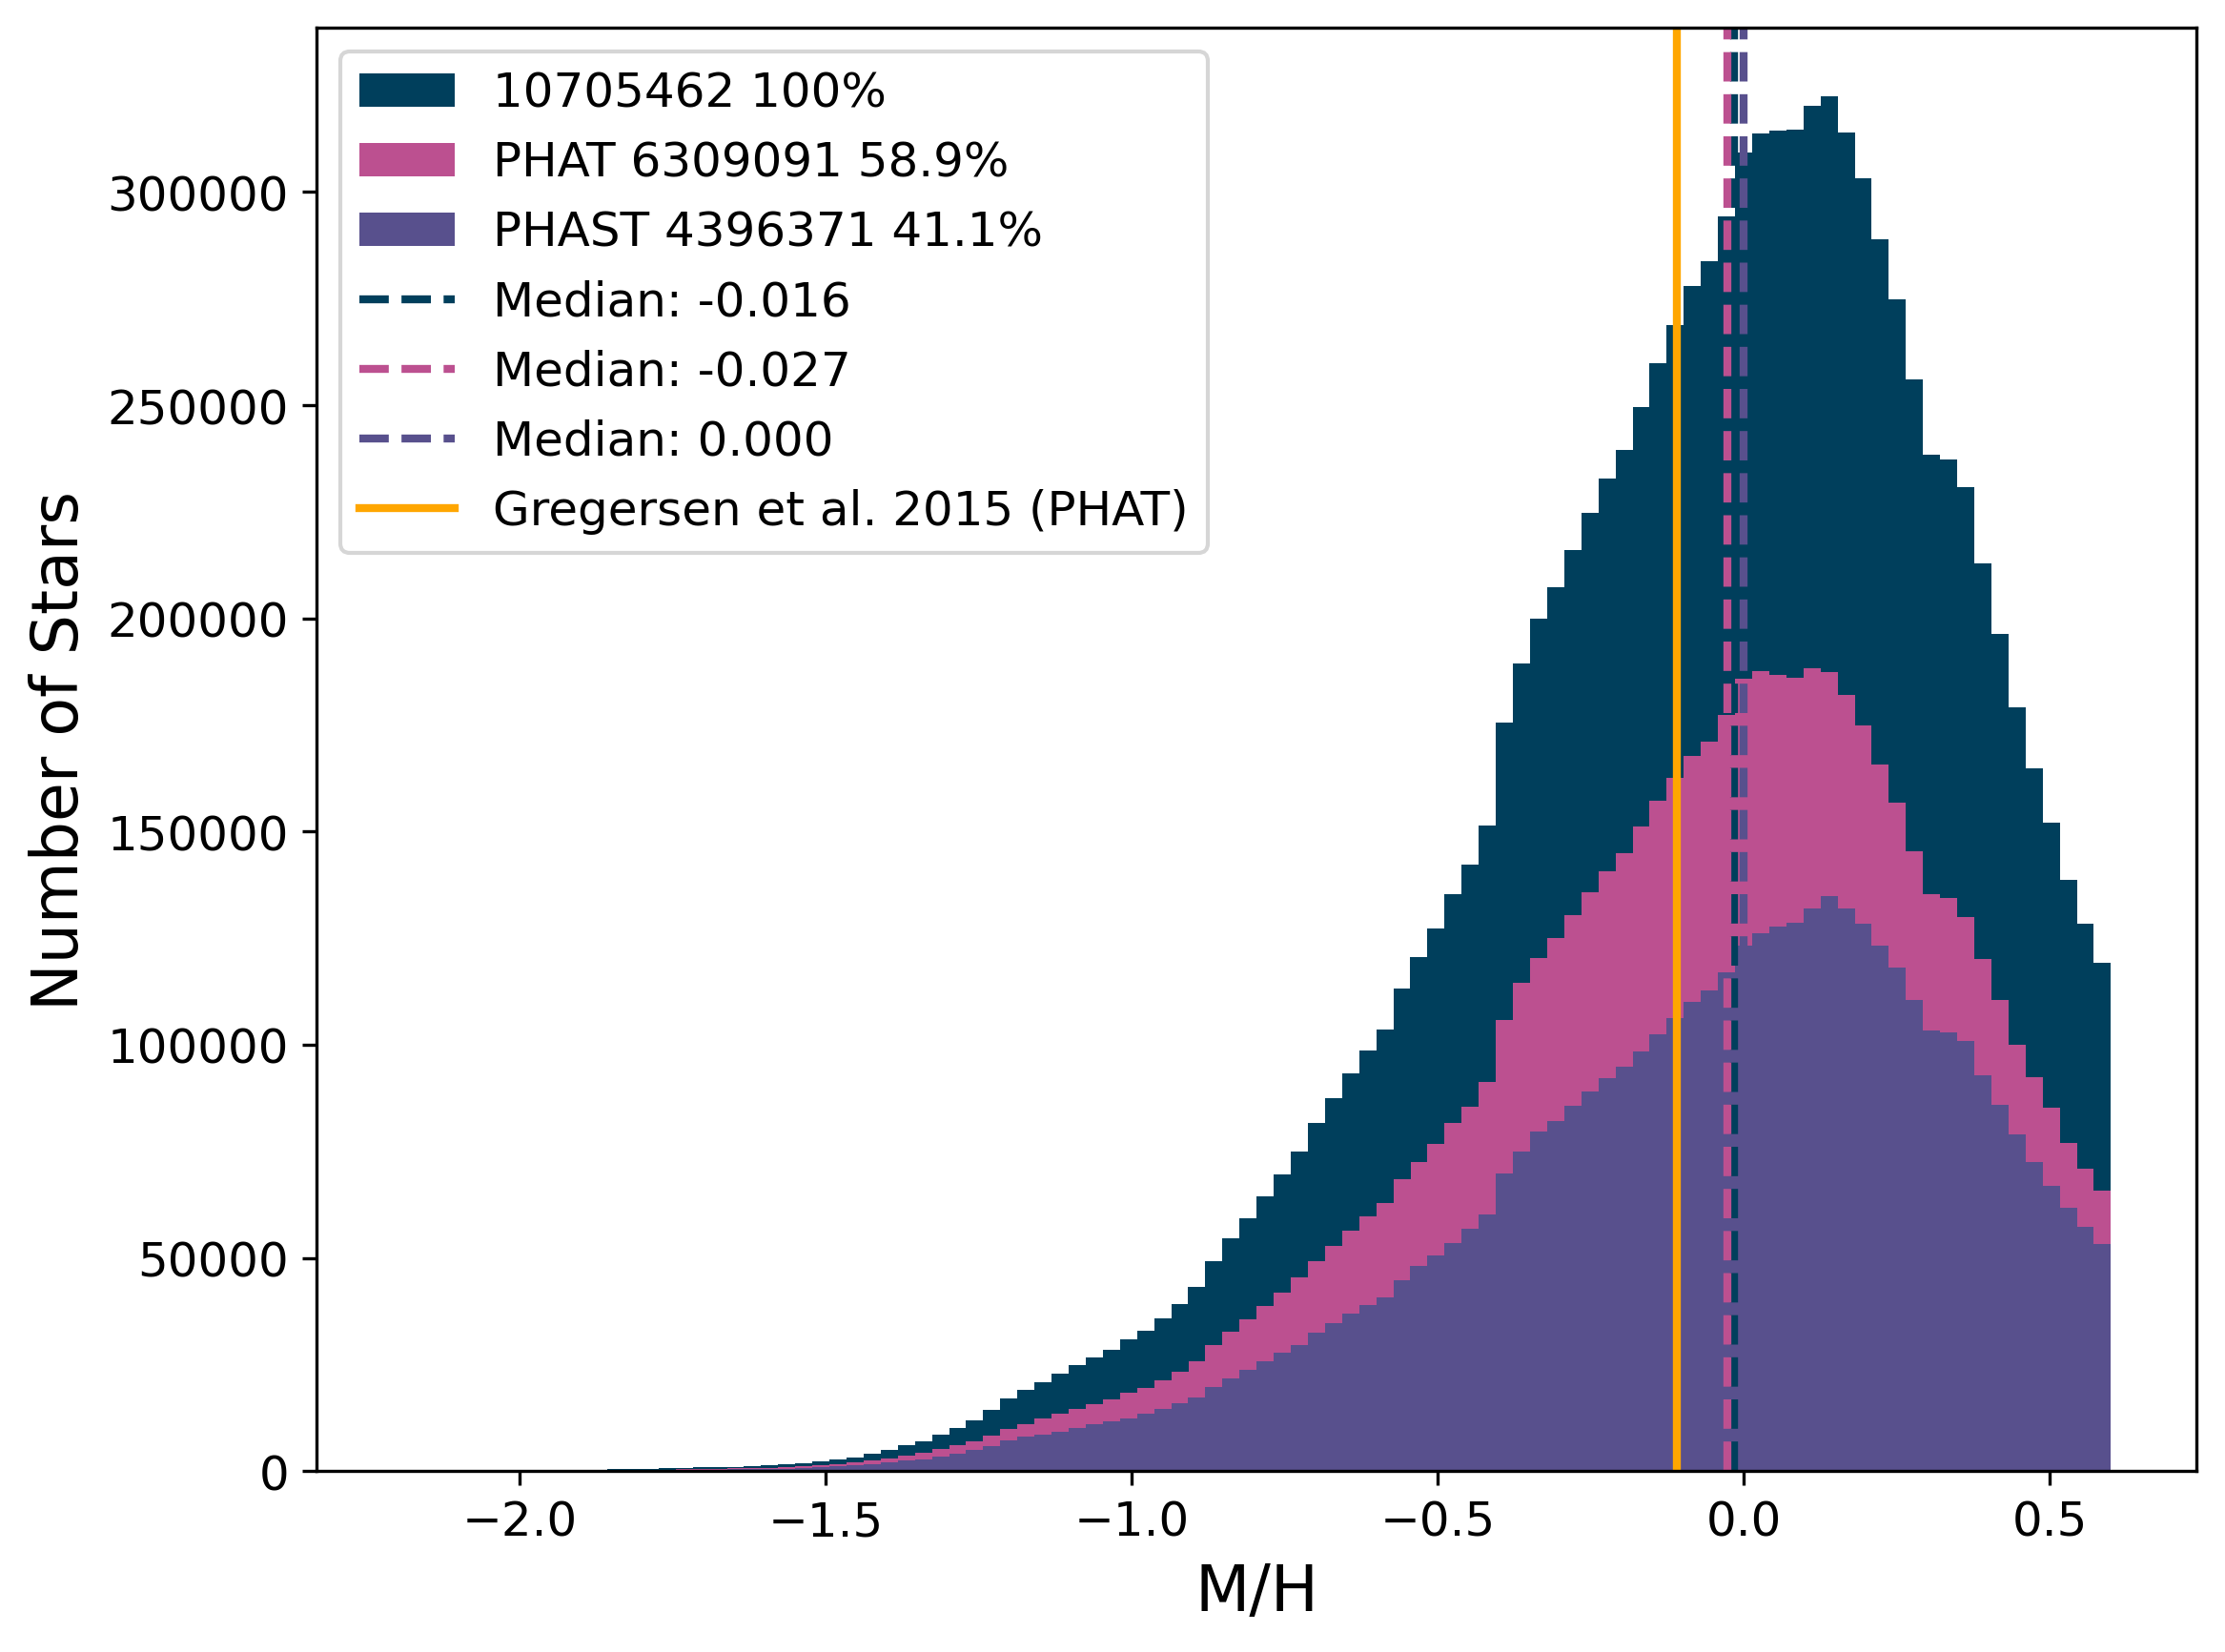

In [80]:
# def plot_mdf_histogram():
# m31_catalog_df = pd.read_csv("/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/interpolated_m31_MH_catalog.csv")
# phat_catalog_df = pd.read_csv("/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/interpolated_phat_g15_rgb_selection.csv")
# phast_catalog_df = pd.read_csv("/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/interpolated_phast_g15_rgb_selection.csv")

fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharex=True, sharey=True, dpi=300)

filtered_m31_catalog_df = m31_catalog_df[m31_catalog_df['interpolated_MH'] <= 0.6]
filtered_phat_catalog_df = phat_catalog_df[phat_catalog_df['interpolated_MH'] <= 0.6]
filtered_phast_catalog_df = phast_catalog_df[phast_catalog_df['interpolated_MH'] <= 0.6]
# Plot the MDF of the M31 catalog
colors = ["#003f5c", "#bc5090", "#58508d", "#ffa600"]
axs.hist(filtered_m31_catalog_df['interpolated_MH'], 
            bins=100, 
            color=colors[0], 
            histtype='stepfilled',
            label=f'{len(filtered_m31_catalog_df)} 100%')
axs.hist(filtered_phat_catalog_df['interpolated_MH'], bins=100, color=colors[1], alpha=1, histtype='stepfilled', label=f'PHAT {len(filtered_phat_catalog_df)} {np.round(len(filtered_phat_catalog_df)/len(filtered_m31_catalog_df)*100,1)}%')
axs.hist(filtered_phast_catalog_df['interpolated_MH'], bins=100, color=colors[2], alpha=1, histtype='stepfilled', label=f'PHAST {len(filtered_phast_catalog_df)} {np.round(len(filtered_phast_catalog_df)/len(filtered_m31_catalog_df)*100,1)}%')

# axs.set_title('M31 MDF')


# Plot vertical lines at the median for each histogram
axs.axvline(np.nanmedian(filtered_m31_catalog_df['interpolated_MH']), color=colors[0], linestyle='--', label=f'Median: {np.nanmedian(filtered_m31_catalog_df["interpolated_MH"]):.3f}')
axs.axvline(np.nanmedian(filtered_phat_catalog_df['interpolated_MH']), color=colors[1], linestyle='--', label=f'Median: {np.nanmedian(filtered_phat_catalog_df["interpolated_MH"]):.3f}')
axs.axvline(np.nanmedian(filtered_phast_catalog_df['interpolated_MH']), color=colors[2], linestyle='--', label=f'Median: {np.nanmedian(filtered_phast_catalog_df["interpolated_MH"]):.3f}')
axs.axvline(-0.11, color=colors[3], linestyle='-', label='Gregersen et al. 2015 (PHAT)')

axs.legend()
axs.set_xlabel('M/H')
axs.set_ylabel('Number of Stars')
plt.grid(False)

plt.tight_layout()
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_RGB_phat_phast_mdf.pdf')
plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_RGB_phat_phast_mdf.jpeg')

plt.show()

# plot_mdf_histogram()

Scale: 0.01 deg/pix = 0.13543754995475998 kpc/pix
<class 'numpy.ndarray'> (4, 5)
###0.0kpc - 1.085kpc###
PHAT Total spatial bins in 35
PHAT Log(M/H)=-0.196

PHAST Total spatial bins in 34
PHAST Log(M/H)=-0.236
PHAT&PHAST(M31) Log(M/H)=-0.224

###1.088kpc - 2.173kpc###
PHAT Total spatial bins in 99
PHAT Log(M/H)=-0.126

PHAST Total spatial bins in 94
PHAST Log(M/H)=-0.171
PHAT&PHAST(M31) Log(M/H)=-0.148

###2.176kpc - 3.262kpc###
PHAT Total spatial bins in 175
PHAT Log(M/H)=-0.001

PHAST Total spatial bins in 174
PHAST Log(M/H)=-0.073
PHAT&PHAST(M31) Log(M/H)=-0.038

###3.264kpc - 4.35kpc###
PHAT Total spatial bins in 230
PHAT Log(M/H)=0.071

PHAST Total spatial bins in 231
PHAST Log(M/H)=-0.012
PHAT&PHAST(M31) Log(M/H)=0.032

###4.352kpc - 5.438kpc###
PHAT Total spatial bins in 313
PHAT Log(M/H)=0.089

PHAST Total spatial bins in 307
PHAST Log(M/H)=0.019
PHAT&PHAST(M31) Log(M/H)=0.055

###5.44kpc - 6.526kpc###
PHAT Total spatial bins in 359
PHAT Log(M/H)=0.091

PHAST Total spatial bins

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


###16.321kpc - 17.407kpc###
PHAT Total spatial bins in 457
PHAT Log(M/H)=-0.027

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.027

###17.409kpc - 18.495kpc###
PHAT Total spatial bins in 366
PHAT Log(M/H)=-0.078

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.078

###18.498kpc - 19.583kpc###
PHAT Total spatial bins in 200
PHAT Log(M/H)=-0.116

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.116

###19.586kpc - 20.671kpc###
PHAT Total spatial bins in 109
PHAT Log(M/H)=-0.146

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.146

###20.674kpc - 21.759kpc###
PHAT Total spatial bins in 37
PHAT Log(M/H)=-0.134

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.134

Index(['Deprojected Radius (kpc)', 'Elliptical Median', 'Elliptical QLow',
       'Elliptical QHigh', 'PHAT Elliptical Median', 'PHAT QLow', 'PHAT QHigh',
       'PHAST QLow', 'PHAST QHi

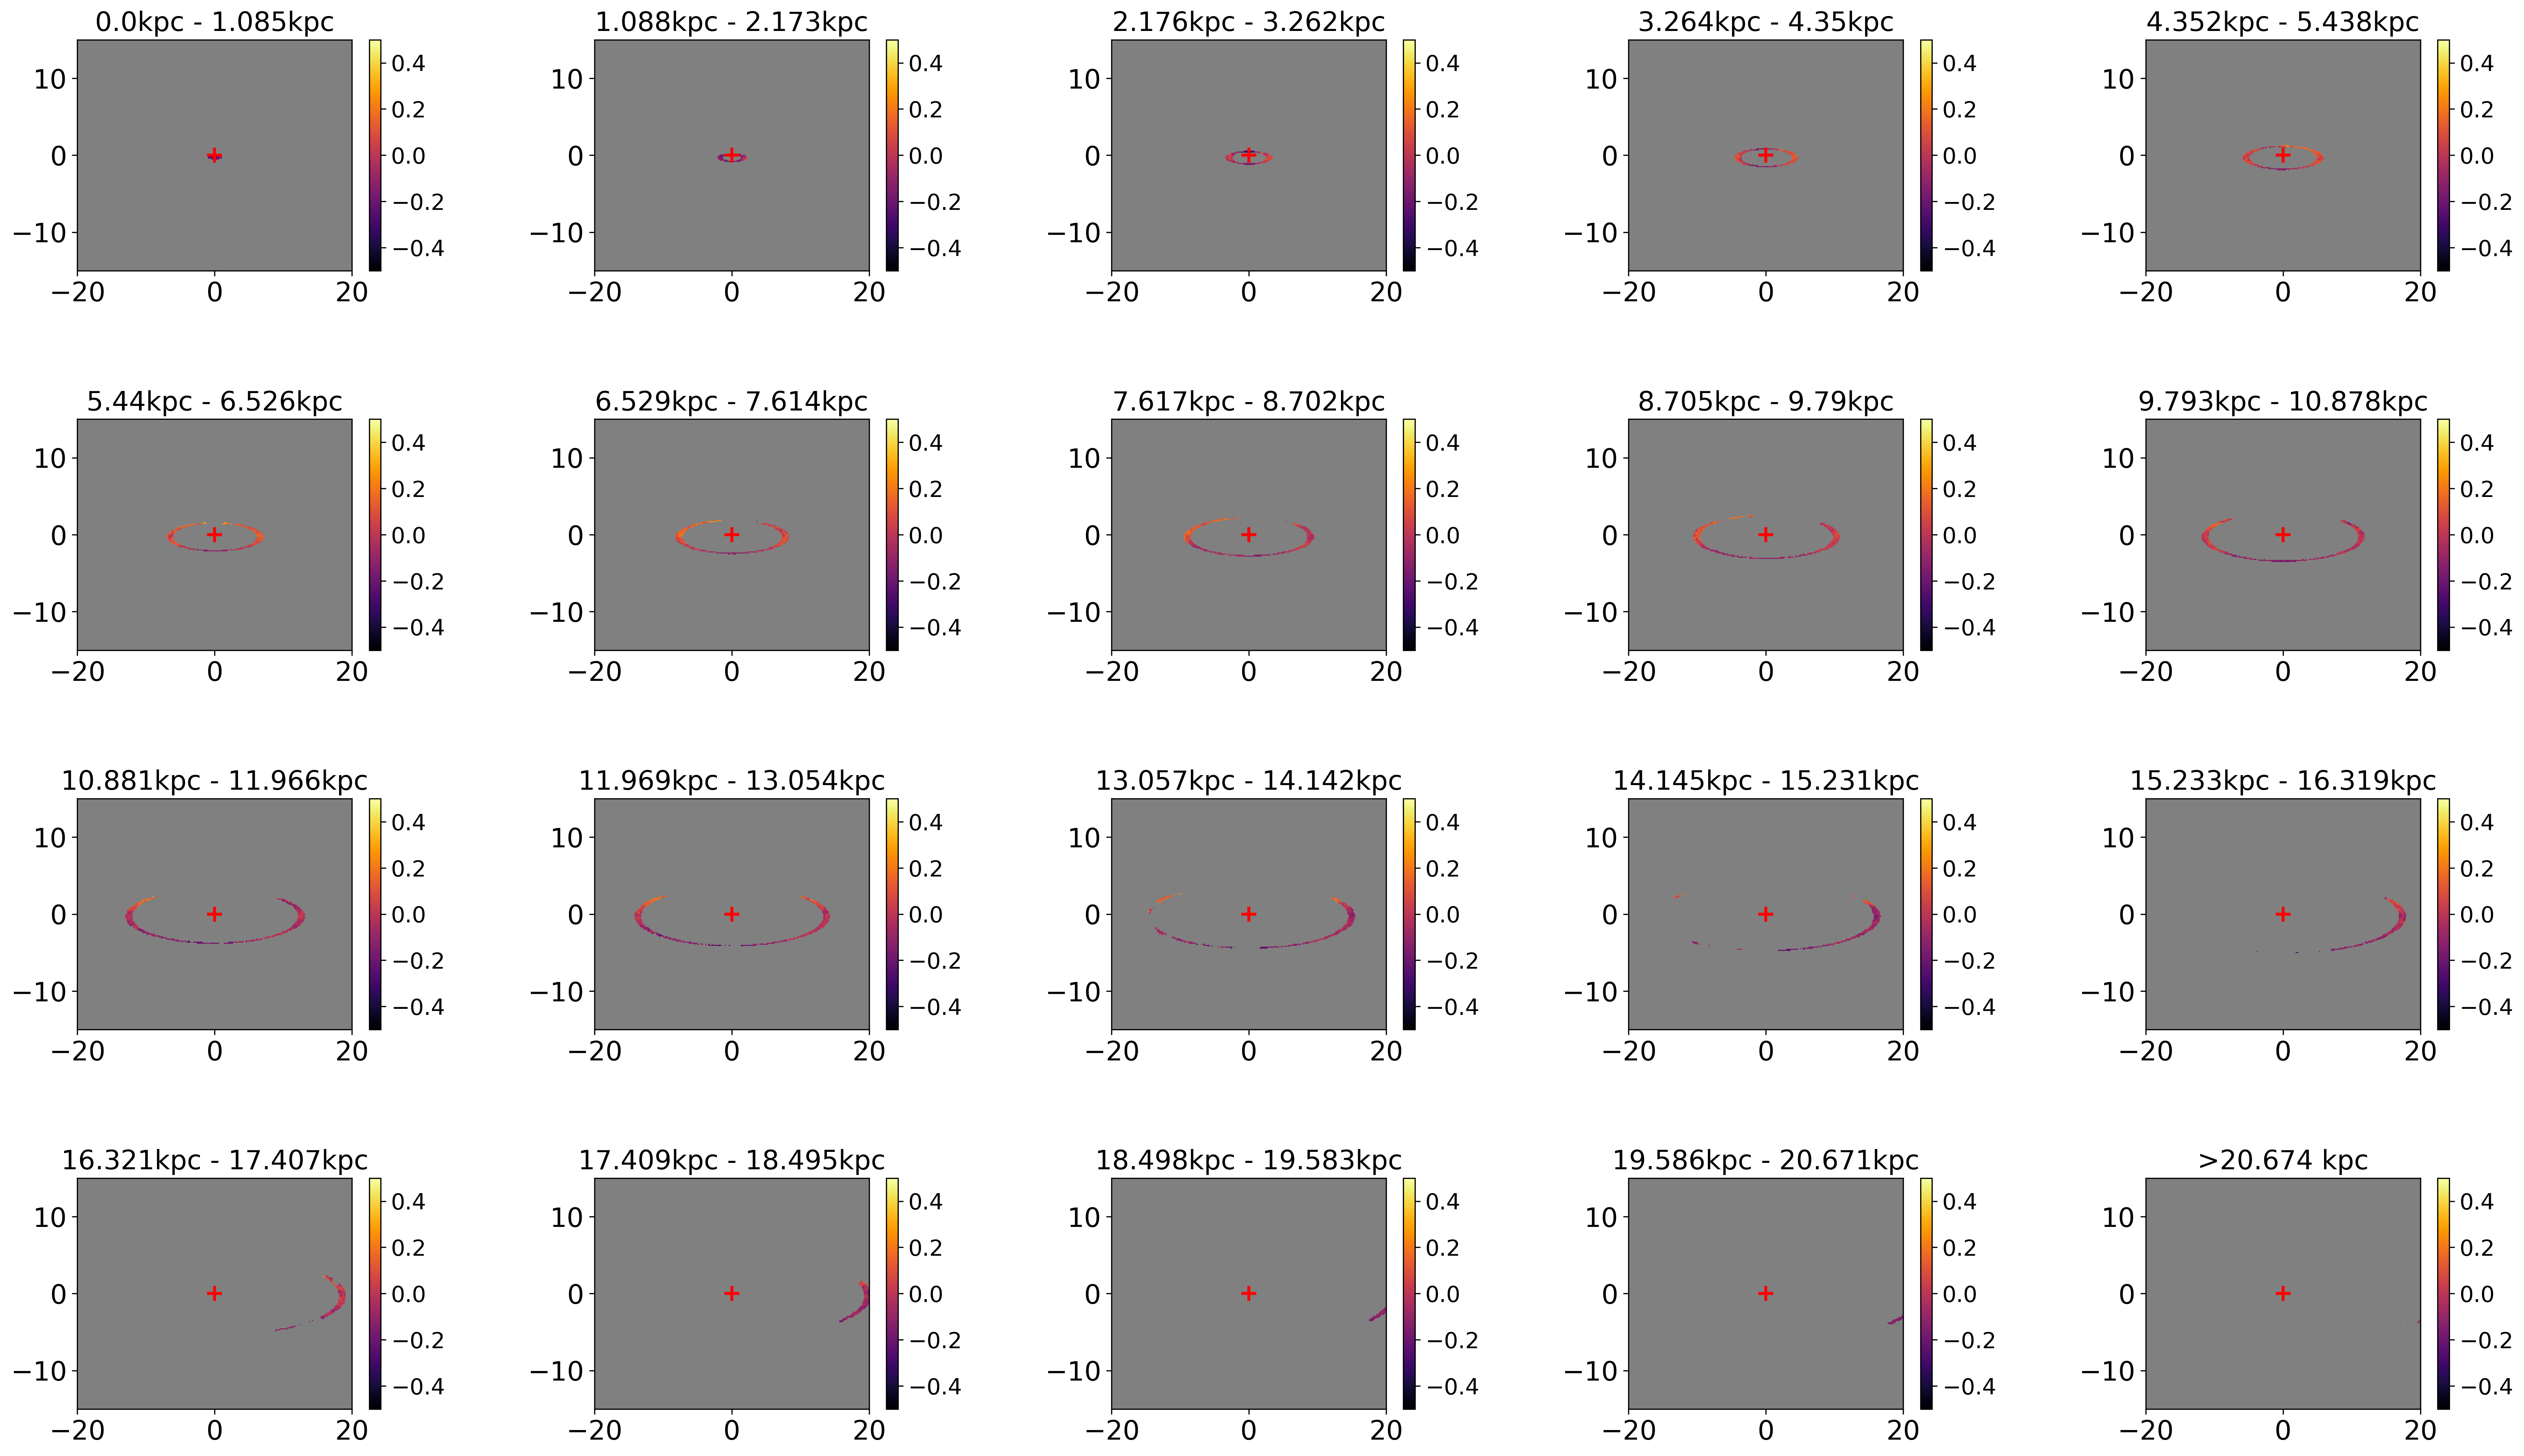

Scale: 0.01 deg/pix = 0.13543754995475998 kpc/pix
<class 'numpy.ndarray'> (4, 5)
###0.0kpc - 1.085kpc###
PHAT Total spatial bins in 35
PHAT Log(M/H)=-0.196

PHAST Total spatial bins in 34
PHAST Log(M/H)=-0.236
PHAT&PHAST(M31) Log(M/H)=-0.224

###1.088kpc - 2.173kpc###
PHAT Total spatial bins in 95
PHAT Log(M/H)=-0.13

PHAST Total spatial bins in 89
PHAST Log(M/H)=-0.173
PHAT&PHAST(M31) Log(M/H)=-0.151

###2.176kpc - 3.262kpc###
PHAT Total spatial bins in 168
PHAT Log(M/H)=-0.002

PHAST Total spatial bins in 156
PHAST Log(M/H)=-0.061
PHAT&PHAST(M31) Log(M/H)=-0.034

###3.264kpc - 4.35kpc###
PHAT Total spatial bins in 188
PHAT Log(M/H)=0.07

PHAST Total spatial bins in 211
PHAST Log(M/H)=-0.014
PHAT&PHAST(M31) Log(M/H)=0.03

###4.352kpc - 5.438kpc###
PHAT Total spatial bins in 194
PHAT Log(M/H)=0.082

PHAST Total spatial bins in 231
PHAST Log(M/H)=0.031
PHAT&PHAST(M31) Log(M/H)=0.051

###5.44kpc - 6.526kpc###
PHAT Total spatial bins in 170
PHAT Log(M/H)=0.084

PHAST Total spatial bins in

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


###16.321kpc - 17.407kpc###
PHAT Total spatial bins in 164
PHAT Log(M/H)=-0.1

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.1

###17.409kpc - 18.495kpc###
PHAT Total spatial bins in 239
PHAT Log(M/H)=-0.089

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.089

###18.498kpc - 19.583kpc###
PHAT Total spatial bins in 174
PHAT Log(M/H)=-0.118

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.118

###19.586kpc - 20.671kpc###
PHAT Total spatial bins in 108
PHAT Log(M/H)=-0.147

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.147

###20.674kpc - 21.759kpc###
PHAT Total spatial bins in 37
PHAT Log(M/H)=-0.134

PHAST Total spatial bins in 8
PHAST Log(M/H)=nan
PHAT&PHAST(M31) Log(M/H)=-0.134

Index(['Deprojected Radius (kpc)', 'Elliptical Median', 'Elliptical QLow',
       'Elliptical QHigh', 'PHAT Elliptical Median', 'PHAT QLow', 'PHAT QHigh',
       'PHAST QLow', 'PHAST QHigh',

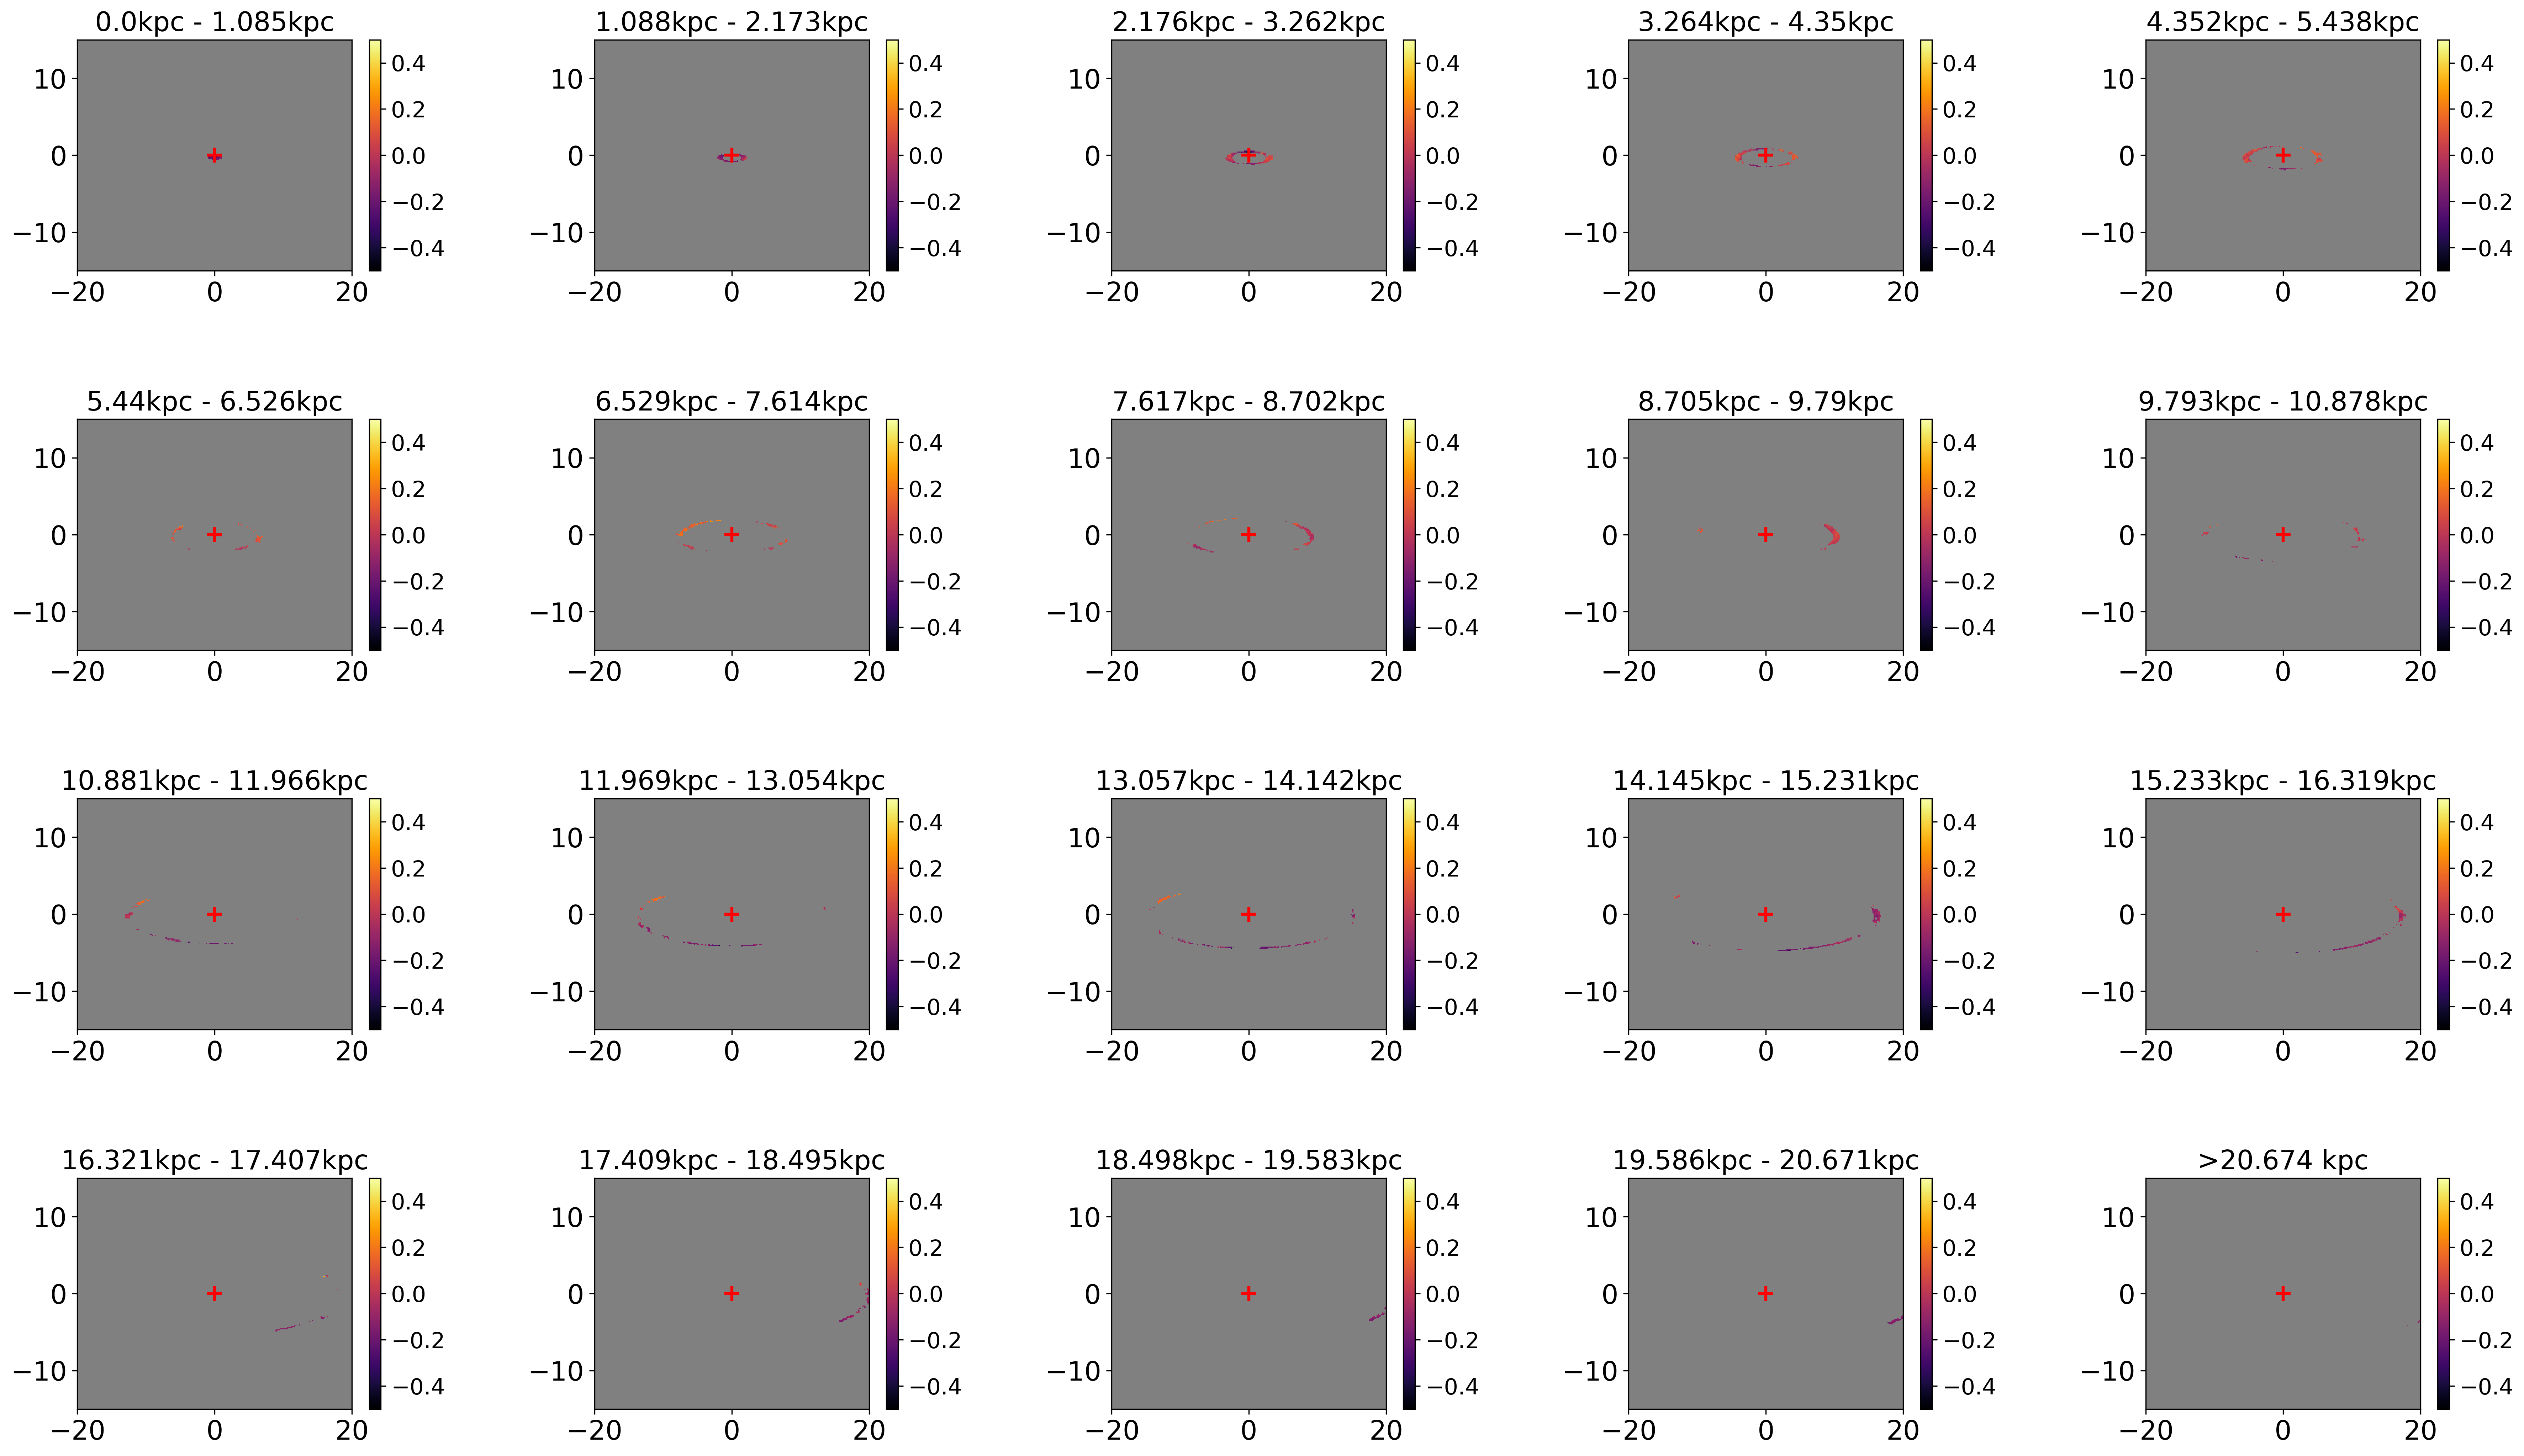

In [93]:
def plot_mh_gradiant_map_subplot(fits_file='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits', remove_dust=False, max_dust_mass_value=2e5):
    with fits.open(fits_file) as hdu:
        mh_map = hdu['INTERPOLATED_MH'].data
        draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
        
        # Mask the high dust mass areas
        mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
        mh_map_no_dust = mh_map_no_dust.filled()
        if remove_dust == True:
            mh_map = mh_map_no_dust



        # The excluded dust mass values
        # excluded_dust_mass_map = mh_map[draine_dust_mass_map >= max_dust_mass_value]
        # Get coordinate system
        wcs = WCS(header = hdu[0].header)

        # Calculate the scale in degrees per pixel
        # scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
        wcs.wcs.cdelt = [np.rad2deg(np.radians(0.01)*np.cos(np.radians(wcs.wcs.crval[0]))), 0.01] # pixel scale in degrees/pixel #* Works with the right scaling...
        wcs.wcs.cunit = ["deg", "deg"]

        scale_deg_per_pix = wcs.wcs.cdelt[1]
        scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive

        # Assume a distance to the object in kpc
        distance_kpc = 776  # Replace with the actual distance

        # Convert the scale to kpc per pixel
        scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
        print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")


    center_x, center_y = 117, 148 # Rotated center pix value
    semi_major_axis, semi_minor_axis = 16.5, 60
    inner_radius, outer_radius = 0.0, 2.8
    # inner_radius, outer_radius = 0.0, 0.30 # radius of ellip in pixels
    # inner_radius, outer_radius = 0.0, 25 # radius of ellip in pixels
    # inner_radius, outer_radius = inner_radius*scale_kpc_per_pix, outer_radius*scale_kpc_per_pix # radius of ellip in kpc
    angle = np.deg2rad(-45)  # Angle in radians


    runs = np.linspace(inner_radius, outer_radius, 20)
    # runs = np.linspace(inner_radius, outer_radius, 20)
    delta_runs = np.round(runs[1], 3) - np.round(runs[0], 3)
    num_runs = len(runs)


    # Subplot parameters
    # Calculate the number of rows and columns for the subplots
    cols = 5  # You can change this to fit your needs
    rows = math.ceil(num_runs / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(25, 15), dpi=300)  # Adjust the figure size as needed
    print(type(axs), axs.shape)
    for ax in axs.flat:
        ax.set_facecolor('gray')
    
    axs = axs.ravel()  # Flatten the array of axes
    
    ellip_median_list = []
    ellip_qlow_list = []
    ellip_qhigh_list = []
    phat_ellip_median_list = []
    phat_qlow_list = []
    phat_qhigh_list = []
    phast_ellip_median_list = []
    phast_qlow_list = []
    phast_qhigh_list = []
    deprojected_radius_x_list = []
    phat_bin_total = []
    phast_bin_total = []

    for idx, i in enumerate(runs):
        mask = create_elliptical_mask(wcs.wcs.crpix[0], wcs.wcs.crpix[1], semi_major_axis, semi_minor_axis, angle, mh_map.shape, i, i+delta_runs)
        mh_map_masked = np.where(mask, mh_map, np.nan)
        mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)

        # Select PHAT and PHAST half by isolating the right and left half at the center
        left_side_mask = np.indices(mh_map_rotated.shape)[1] < center_x
        right_side_mask = np.indices(mh_map_rotated.shape)[1] >= center_x
        mh_map_rotated_phat = np.where(left_side_mask, np.nan, mh_map_rotated)
        mh_map_rotated_phast = np.where(right_side_mask, np.nan, mh_map_rotated)

        # calculate the median and 5% and 95% convidence intervals
        ellip_median = np.round(np.nanmedian(mh_map_rotated), 3)
        phat_ellip_median = np.round(np.nanmedian(mh_map_rotated_phat), 3)
        phast_ellip_median = np.round(np.nanmedian(mh_map_rotated_phast), 3)
        deprojected_radius_x = np.mean((i, i+delta_runs))
        

        # Before bootstrapping, check if there are enough non-NaN observations
        if len(mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()) >= 2:
            m31_data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()
            bootstrap_results = bootstrap(data=(m31_data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
            ellip_low = bootstrap_results.confidence_interval.low
            ellip_high = bootstrap_results.confidence_interval.high
        else:
            ellip_low = np.nan
            ellip_high = np.nan

        # Repeat the check for PHAT and PHAST data
        # For PHAT
        if len(mh_map_rotated[~np.isnan(mh_map_rotated_phat)].flatten()) >= 2:
            phat_data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated_phat)].flatten()
            bootstrap_results = bootstrap(data=(phat_data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
            phat_ellip_low = bootstrap_results.confidence_interval.low
            phat_ellip_high = bootstrap_results.confidence_interval.high
        else:
            phat_ellip_low = np.nan
            phat_ellip_high = np.nan

        # For PHAST
        if len(mh_map_rotated[~np.isnan(mh_map_rotated_phast)].flatten()) >= 2:
            phast_data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated_phast)].flatten()
            bootstrap_results = bootstrap(data=(phast_data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
            phast_ellip_low = bootstrap_results.confidence_interval.low
            phast_ellip_high = bootstrap_results.confidence_interval.high
        else:
            phast_ellip_low = np.nan
            phast_ellip_high = np.nan

        
        print(f'###{np.round(i/scale_kpc_per_pix, 3)}kpc - {np.round((i+delta_runs)/scale_kpc_per_pix, 3)}kpc###')
        print(f'PHAT Total spatial bins in {len(phat_data_filtered)}')
        print(f'PHAT Log(M/H)={phat_ellip_median}\n')
        print(f'PHAST Total spatial bins in {len(phast_data_filtered)}')
        print(f'PHAST Log(M/H)={phast_ellip_median}')
        print(f'PHAT&PHAST(M31) Log(M/H)={ellip_median}\n')

        # Store data
        deprojected_radius_x_list.append(deprojected_radius_x)
        ellip_median_list.append(ellip_median)
        ellip_qlow_list.append(ellip_low)
        ellip_qhigh_list.append(ellip_high)
        phat_ellip_median_list.append(phat_ellip_median)
        phat_qlow_list.append(phat_ellip_low)
        phat_qhigh_list.append(phat_ellip_high)
        phast_ellip_median_list.append(phast_ellip_median)
        phast_qlow_list.append(phast_ellip_low)
        phast_qhigh_list.append(phast_ellip_high)
        phat_bin_total.append(len(phat_data_filtered))
        phast_bin_total.append(len(phast_data_filtered))

        # Move to next radius interval
        inner_radius += delta_runs

        # Calculate the physical size of the image in kpc
        width_kpc = mh_map_rotated.shape[1] * scale_kpc_per_pix
        height_kpc = mh_map_rotated.shape[0] * scale_kpc_per_pix

        # Calculate the left, right, bottom, and top values for the extent
        left = -center_x * scale_kpc_per_pix
        right = (mh_map_rotated.shape[1] - center_x) * scale_kpc_per_pix
        bottom = -center_y * scale_kpc_per_pix
        top = (mh_map_rotated.shape[0] - center_y) * scale_kpc_per_pix

        #* Plotting
        # Adjust the extent so the center is at (0,0)
        extent = [left, right, bottom, top]


        # im0 = axs.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
        im0 = axs[idx].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=extent)

        # im0 = axs.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
        fig.colorbar(im0, ax=axs[idx]).ax.tick_params(labelsize=15)
        if i == runs.max():
            axs[idx].set_title(f'>{np.round(runs.max()/scale_kpc_per_pix, 3)} kpc')
        else:
            axs[idx].set_title(f'{np.round(i/scale_kpc_per_pix, 3)}kpc - {np.round((i+delta_runs)/scale_kpc_per_pix, 3)}kpc')

        # axs.scatter(center_x, center_y, s=100, c='red', marker='+', label='New Center')
        axs[idx].scatter(0, 0, s=100, c='red', marker='+', label='Normalized New Center')
        axs[idx].set_xlim(-20,20)
        axs[idx].set_ylim(-15,15)

        axs[idx].tick_params(axis='both', which='major', labelsize=18)  # Adjust 'labelsize' as needed
        axs[idx].tick_params(axis='both', which='minor', labelsize=18)

    # Remove unused subplots
    for idx in range(num_runs, rows*cols):
        fig.delaxes(axs[idx])

    data = {
    'Deprojected Radius (kpc)': deprojected_radius_x_list/scale_kpc_per_pix,
    'Elliptical Median': ellip_median_list,
    'Elliptical QLow': ellip_qlow_list,
    'Elliptical QHigh': ellip_qhigh_list,
    'PHAT Elliptical Median': phat_ellip_median_list,
    'PHAT QLow': phat_qlow_list,
    'PHAT QHigh': phat_qhigh_list,
    'PHAST QLow': phast_qlow_list,
    'PHAST QHigh': phast_qhigh_list,
    'PHAST Elliptical Median': phast_ellip_median_list,
    'PHAT Bin Total': phat_bin_total,
    'PHAST Bin Total': phast_bin_total
    }

    # Create a DataFrame
    df = pd.DataFrame(data)
    print(df.columns)
    plt.tight_layout(pad=4.0)

    # Save the DataFrame to a CSV file
    if remove_dust == True:
        df.to_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_data_no_dust.csv', index=False)
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_gradiant_nodust.pdf', bbox_inches='tight', dpi=300)
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_gradiant_nodust.jpeg', bbox_inches='tight', dpi=300)
    else:
        df.to_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_data.csv', index=False)
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_gradiant_withdust.pdf', bbox_inches='tight', dpi=300)
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_gradiant_withdust.jpeg', bbox_inches='tight', dpi=300)    
    plt.show()

plot_mh_gradiant_map_subplot(fits_file='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits', remove_dust=False, max_dust_mass_value=3.0e5)
plot_mh_gradiant_map_subplot(fits_file='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits', remove_dust=True, max_dust_mass_value=2.0e5)

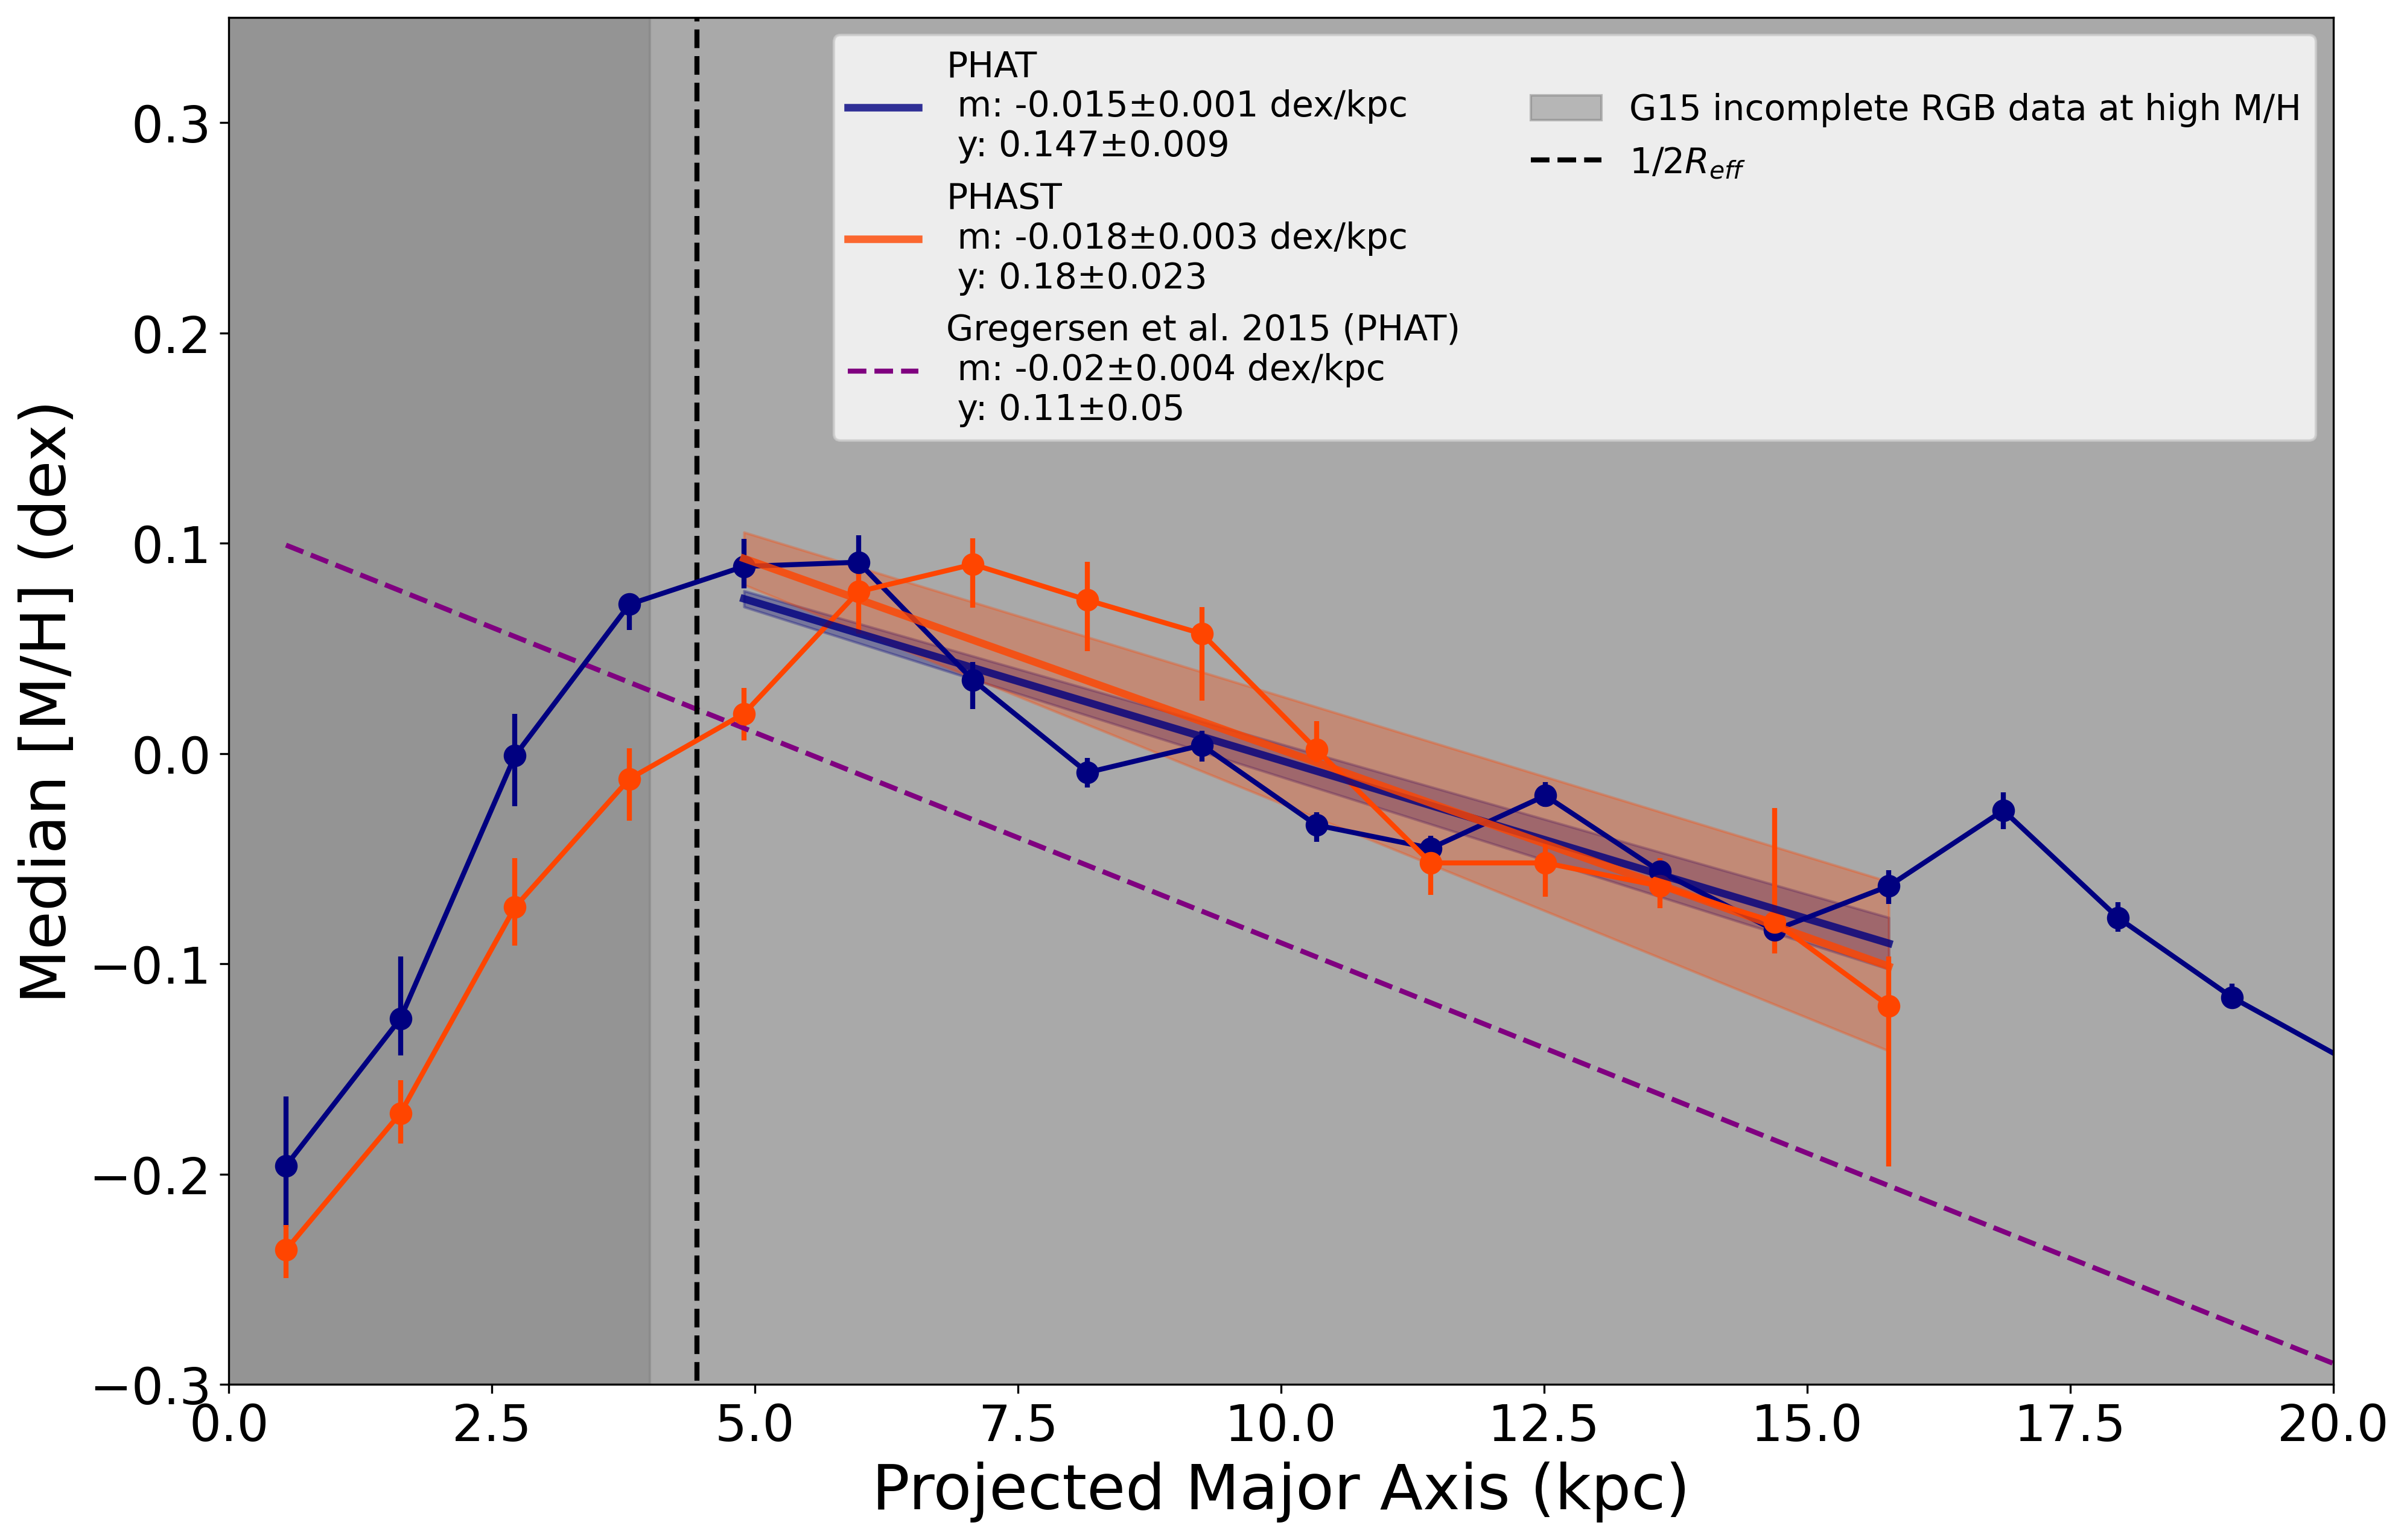

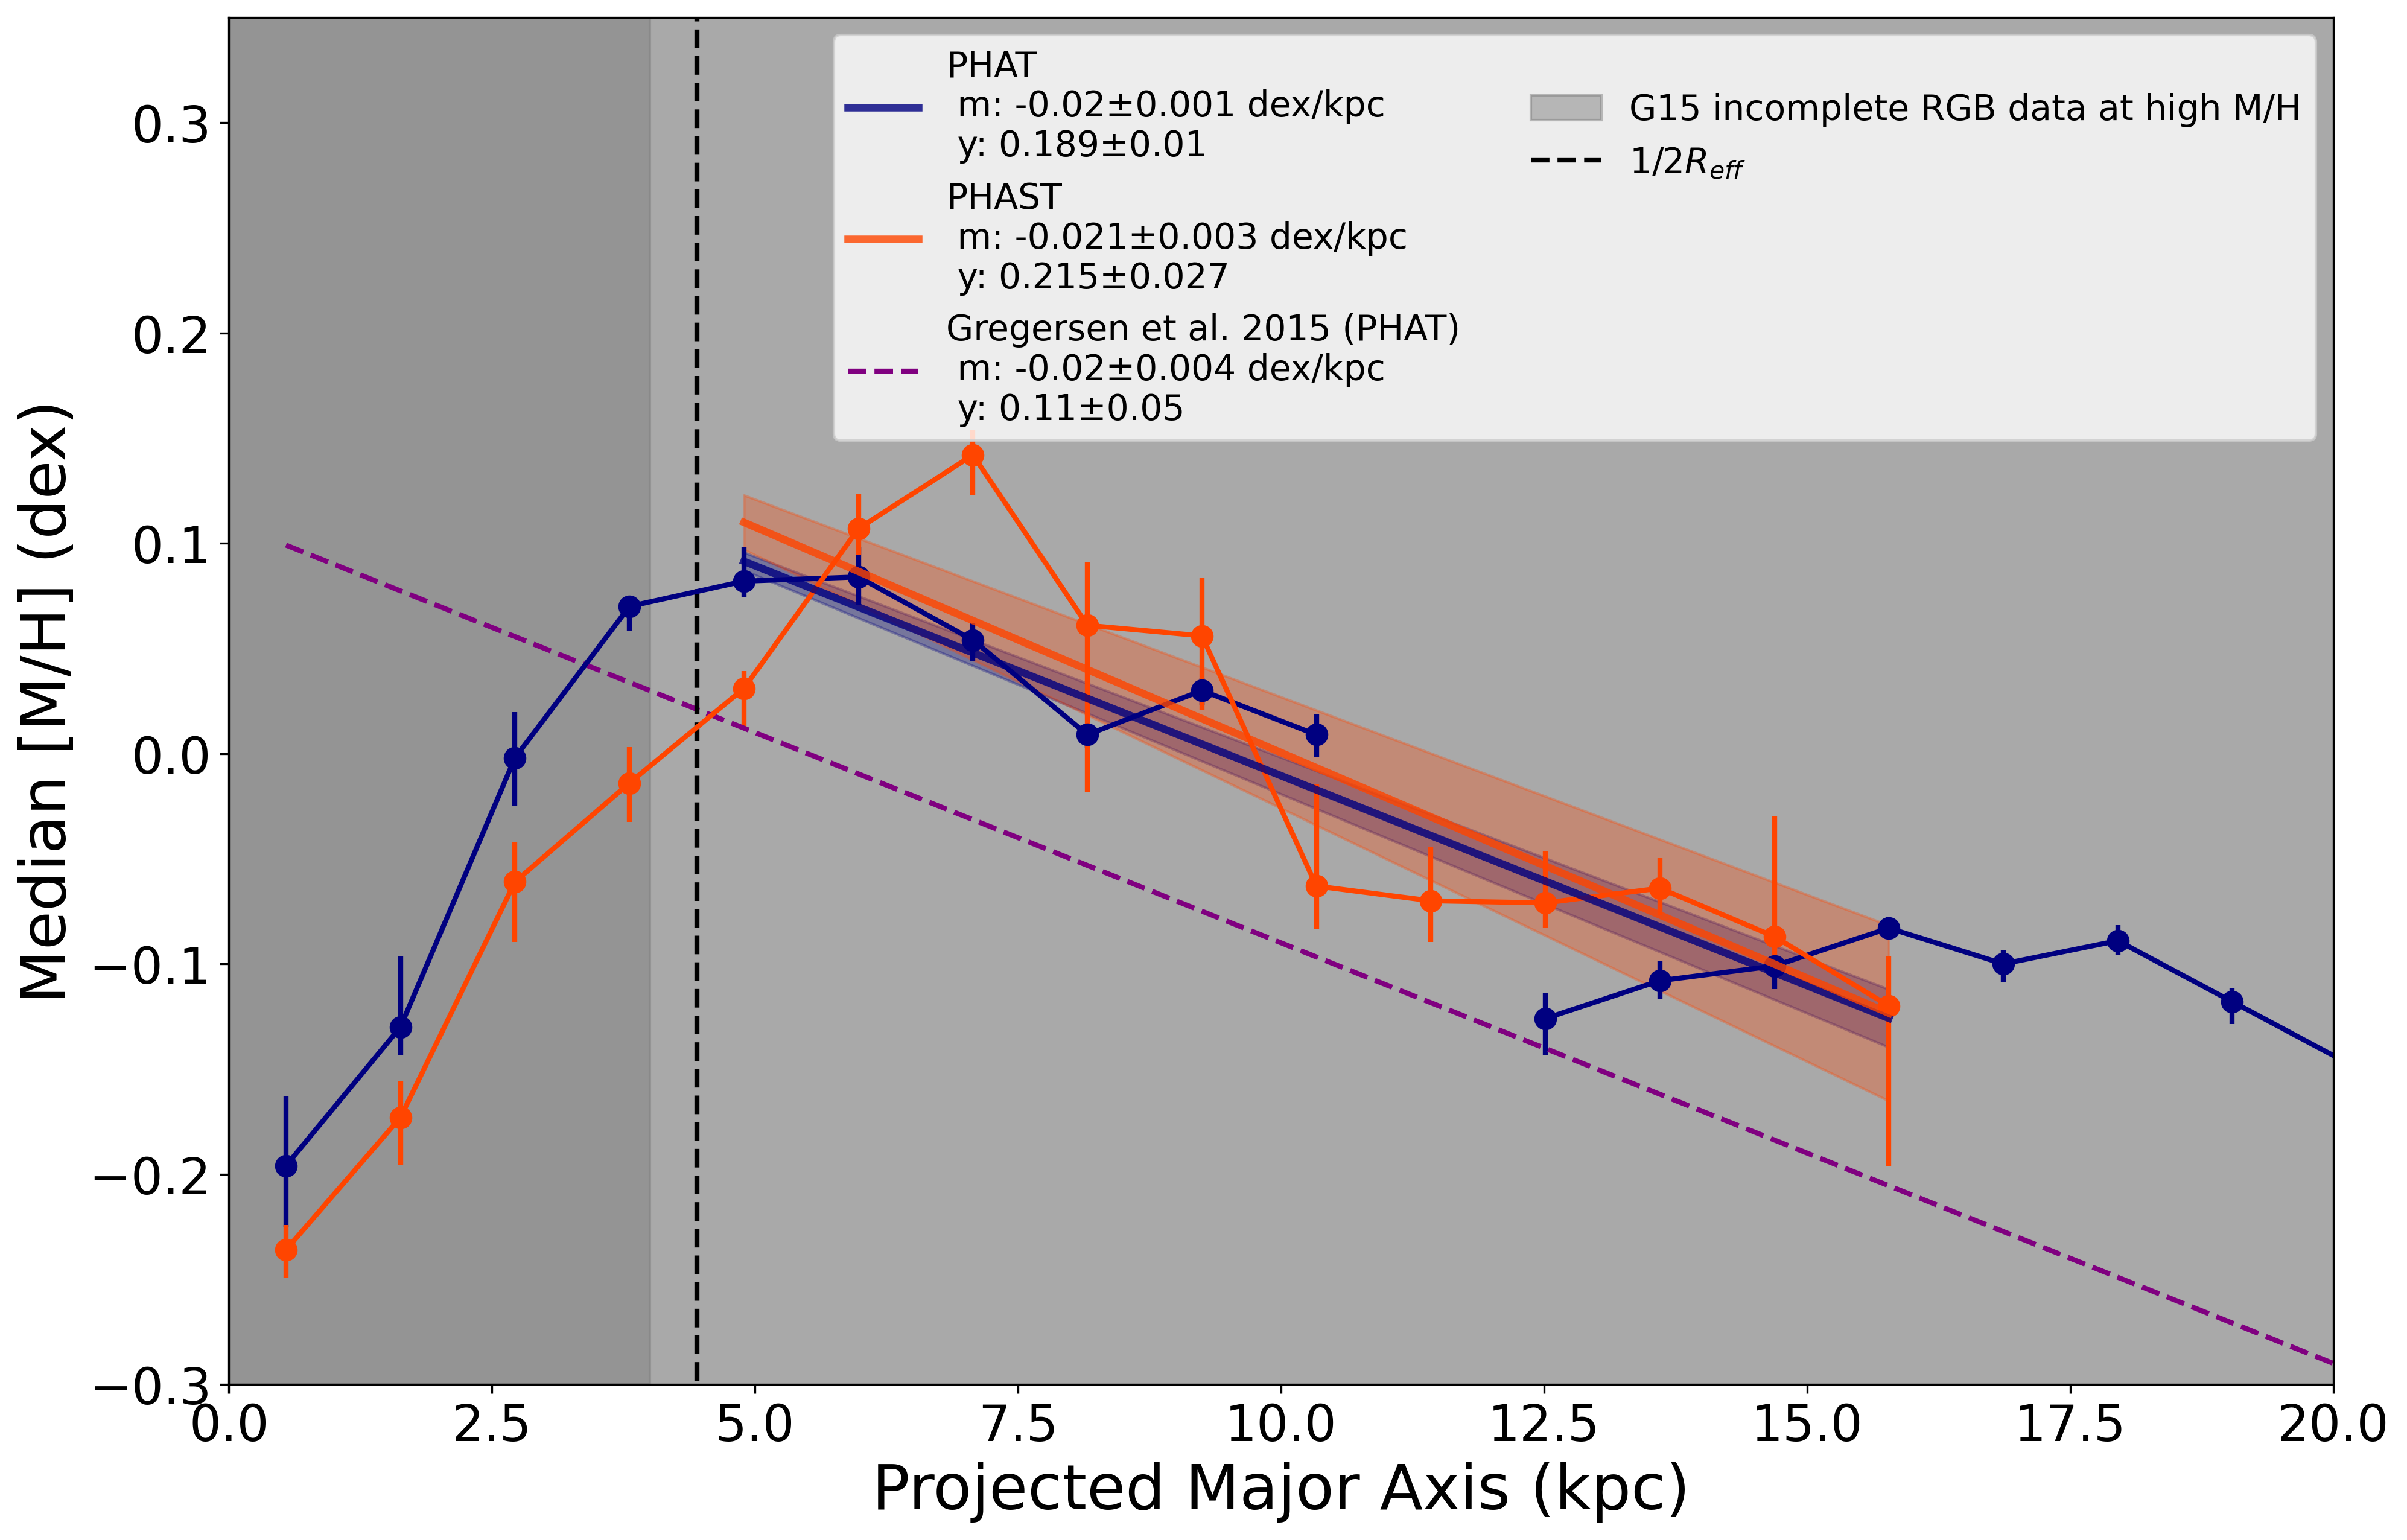

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def monte_carlo_fit(x, y, yerr, num_samples=1000):
    slopes = []
    intercepts = []
    for _ in range(num_samples):
        y_sample = y + np.random.normal(0, yerr)
        slope, intercept = np.polyfit(x, y_sample, 1)
        slopes.append(slope)
        intercepts.append(intercept)
    return np.mean(slopes), np.std(slopes), np.mean(intercepts), np.std(intercepts)

def plot_mh_gradiant(csv_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_data.csv', remove_dust=False):
    rad_profile_dust_df = pd.read_csv(csv_filepath)
    rad_profile_dust_df.loc[rad_profile_dust_df['PHAT Bin Total'] == 61, ['Elliptical Median','Elliptical QLow','Elliptical QHigh','PHAT Elliptical Median','PHAT QLow','PHAT QHigh']] = np.nan
    # rad_profile_dust_df[rad_profile_dust_df['PHAT Bin Total'] == 61] = np.nan
    # rad_profile_dust_df.drop(rad_profile_dust_df['PHAT Bin Total'] <= 61, inplace=True)
    # rad_profile_dust_df.dropna(inplace=True)
    fig, axs = plt.subplots(1, 1, figsize=(15, 10), dpi=300)
    # plt.fill_between(rad_profile_dust_df['Deprojected Radius (kpc)'],
    #                 rad_profile_dust_df['Elliptical QLow'],  # Lower bound of the confidence interval
    #                 rad_profile_dust_df['Elliptical QHigh'],  # Upper bound of the confidence interval
    #                 color='blue', alpha=0.3, zorder=9)  # Adjust color and alpha as needed
    # plt.errorbar(rad_profile_dust_df['Deprojected Radius (kpc)'], 
    #                 rad_profile_dust_df['Elliptical Median'], 
    #                 yerr=[rad_profile_dust_df['Elliptical Median']-rad_profile_dust_df['Elliptical QLow'],rad_profile_dust_df['Elliptical QHigh']-rad_profile_dust_df['Elliptical Median']],
    #                 marker='o',
    #                 color='blue', zorder=9)

    # PHAT Plot linear fit
    # plt.fill_between(rad_profile_dust_df['Deprojected Radius (kpc)'],
    #                 rad_profile_dust_df['PHAT QLow'],  # Lower bound of the confidence interval
    #                 rad_profile_dust_df['PHAT QHigh'],  # Upper bound of the confidence interval
    #                 color='coral', alpha=0.3)  # Adjust color and alpha as needed
    plt.errorbar(rad_profile_dust_df['Deprojected Radius (kpc)'], 
                rad_profile_dust_df['PHAT Elliptical Median'], yerr=[rad_profile_dust_df['PHAT Elliptical Median']-rad_profile_dust_df['PHAT QLow'],rad_profile_dust_df['PHAT QHigh']-rad_profile_dust_df['PHAT Elliptical Median']], 
                marker='o', 
                color='navy',
                )

    # PHAST Plot linear fit
    # plt.fill_between(rad_profile_dust_df['Deprojected Radius (kpc)'],
    #                 rad_profile_dust_df['PHAST QLow'],  # Lower bound of the confidence interval
    #                 rad_profile_dust_df['PHAST QHigh'],  # Upper bound of the confidence interval
    #                 color='orange', alpha=0.3)  # Adjust color and alpha as needed
    plt.errorbar(rad_profile_dust_df['Deprojected Radius (kpc)'], 
                rad_profile_dust_df['PHAST Elliptical Median'], 
                yerr=[abs(rad_profile_dust_df['PHAST Elliptical Median'] - rad_profile_dust_df['PHAST QLow']), 
                    abs(rad_profile_dust_df['PHAST QHigh'] - rad_profile_dust_df['PHAST Elliptical Median'])], 
                    marker='o',
                    color='orangered',
                    )

    # Monte Carlo fit for Elliptical Median
    start_ind = 4
    stop_ind = 15
    x = rad_profile_dust_df['Deprojected Radius (kpc)'][start_ind:stop_ind] 
    # Remove NaNs from x and y
    def remove_nans(x, y, yerr):
        mask = ~np.isnan(y)
        return x[mask], y[mask], yerr[mask]
    # y = rad_profile_dust_df['Elliptical Median'][start_ind:stop_ind]
    # yerr = np.mean([abs(rad_profile_dust_df['Elliptical Median'][start_ind:stop_ind] - rad_profile_dust_df['Elliptical QLow'][start_ind:stop_ind]), 
    #                 abs(rad_profile_dust_df['Elliptical QHigh'][start_ind:stop_ind] - rad_profile_dust_df['Elliptical Median'][start_ind:stop_ind])], axis=0)
    # slope, slope_err, intercept, intercept_err = monte_carlo_fit(x, y, yerr)
    # fit_line = slope * x + intercept
    # plt.plot(x, fit_line, color='navy', alpha=0.5, label=f'PHAT&PHAST\n m: {np.round(slope, 3)}±{np.round(slope_err, 3)} dex/kpc \n y: {np.round(intercept, 3)}±{np.round(intercept_err, 3)}', linewidth=5, zorder=10)
    # plt.fill_between(x, fit_line - slope_err * x, fit_line + slope_err * x, color='grey', alpha=0.2)

    # Monte Carlo fit for PHAT Elliptical Median
    y = rad_profile_dust_df['PHAT Elliptical Median'][start_ind:stop_ind]
    yerr = np.mean([abs(rad_profile_dust_df['PHAT Elliptical Median'][start_ind:stop_ind] - rad_profile_dust_df['PHAT QLow'][start_ind:stop_ind]), 
                    abs(rad_profile_dust_df['PHAT QHigh'][start_ind:stop_ind] - rad_profile_dust_df['PHAT Elliptical Median'][start_ind:stop_ind])], axis=0)
    # slope, slope_err, intercept, intercept_err = monte_carlo_fit(x, y, yerr)
    slope, slope_err, intercept, intercept_err = monte_carlo_fit(x[~np.isnan(y)], y[~np.isnan(y)], yerr[~np.isnan(y)])
    fit_line = slope * x + intercept
    plt.plot(x, fit_line, color='navy', label=f'PHAT\n m: {np.round(slope, 3)}±{np.round(slope_err, 3)} dex/kpc \n y: {np.round(intercept, 3)}±{np.round(intercept_err, 3)}', linewidth=3, alpha=0.8, linestyle='-', zorder=9)
    plt.fill_between(x, fit_line - slope_err * x, fit_line + slope_err * x, color='navy', alpha=0.3)

    # Monte Carlo fit for PHAST Elliptical Median
    y = rad_profile_dust_df['PHAST Elliptical Median'][start_ind:stop_ind]
    yerr = np.mean([abs(rad_profile_dust_df['PHAST Elliptical Median'][start_ind:stop_ind] - rad_profile_dust_df['PHAST QLow'][start_ind:stop_ind]), 
                    abs(rad_profile_dust_df['PHAST QHigh'][start_ind:stop_ind] - rad_profile_dust_df['PHAST Elliptical Median'][start_ind:stop_ind])], axis=0)
    slope, slope_err, intercept, intercept_err = monte_carlo_fit(x[~np.isnan(y)], y[~np.isnan(y)], yerr[~np.isnan(y)])
    fit_line = slope * x + intercept
    plt.plot(x, fit_line, color='orangered', label=f'PHAST\n m: {np.round(slope, 3)}±{np.round(slope_err, 3)} dex/kpc \n y: {np.round(intercept, 3)}±{np.round(intercept_err, 3)}', linewidth=3, alpha=0.8, linestyle='-', zorder=9)
    plt.fill_between(x, fit_line - slope_err * x, fit_line + slope_err * x, color='orangered', alpha=0.3)

    # Gregersen line
    g15_phat_fit_line = -0.02 * rad_profile_dust_df['Deprojected Radius (kpc)'] + 0.11 # slope = 0.02 dex/kpc - section 4.1 in Gregersen et al 2018
    plt.plot(rad_profile_dust_df['Deprojected Radius (kpc)'], g15_phat_fit_line, color='purple', label=f'Gregersen et al. 2015 (PHAT)\n m: -{np.round(0.02, 3)}±0.004 dex/kpc \n y: {np.round(0.11, 3)}±0.05', linestyle='--')
    plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2018 - where completeness become incomplete at high metallicity
    plt.vlines(4.45, ymin=-1, ymax=1, color='black', linestyle='--', label=r'$1/2 R_{eff}$')
    plt.ylim(-0.3, 0.35)
    plt.xlim(0,20)
    plt.xlabel('Projected Major Axis (kpc)', fontsize='25')
    plt.ylabel('Median [M/H] (dex)', fontsize='25')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.legend(fontsize='14', ncols=2)
    plt.gca().set_facecolor('darkgrey')
    if remove_dust == True:
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/mh_gradiant_nodust.pdf', dpi=300)
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/mh_gradiant_nodust.jpeg', dpi=300)
    else:
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/mh_gradiant.pdf', dpi=300)
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/mh_gradiant.jpeg', dpi=300)

    plt.show()

plot_mh_gradiant(csv_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_data.csv', remove_dust=False)
plot_mh_gradiant(csv_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_data_no_dust.csv', remove_dust=True)

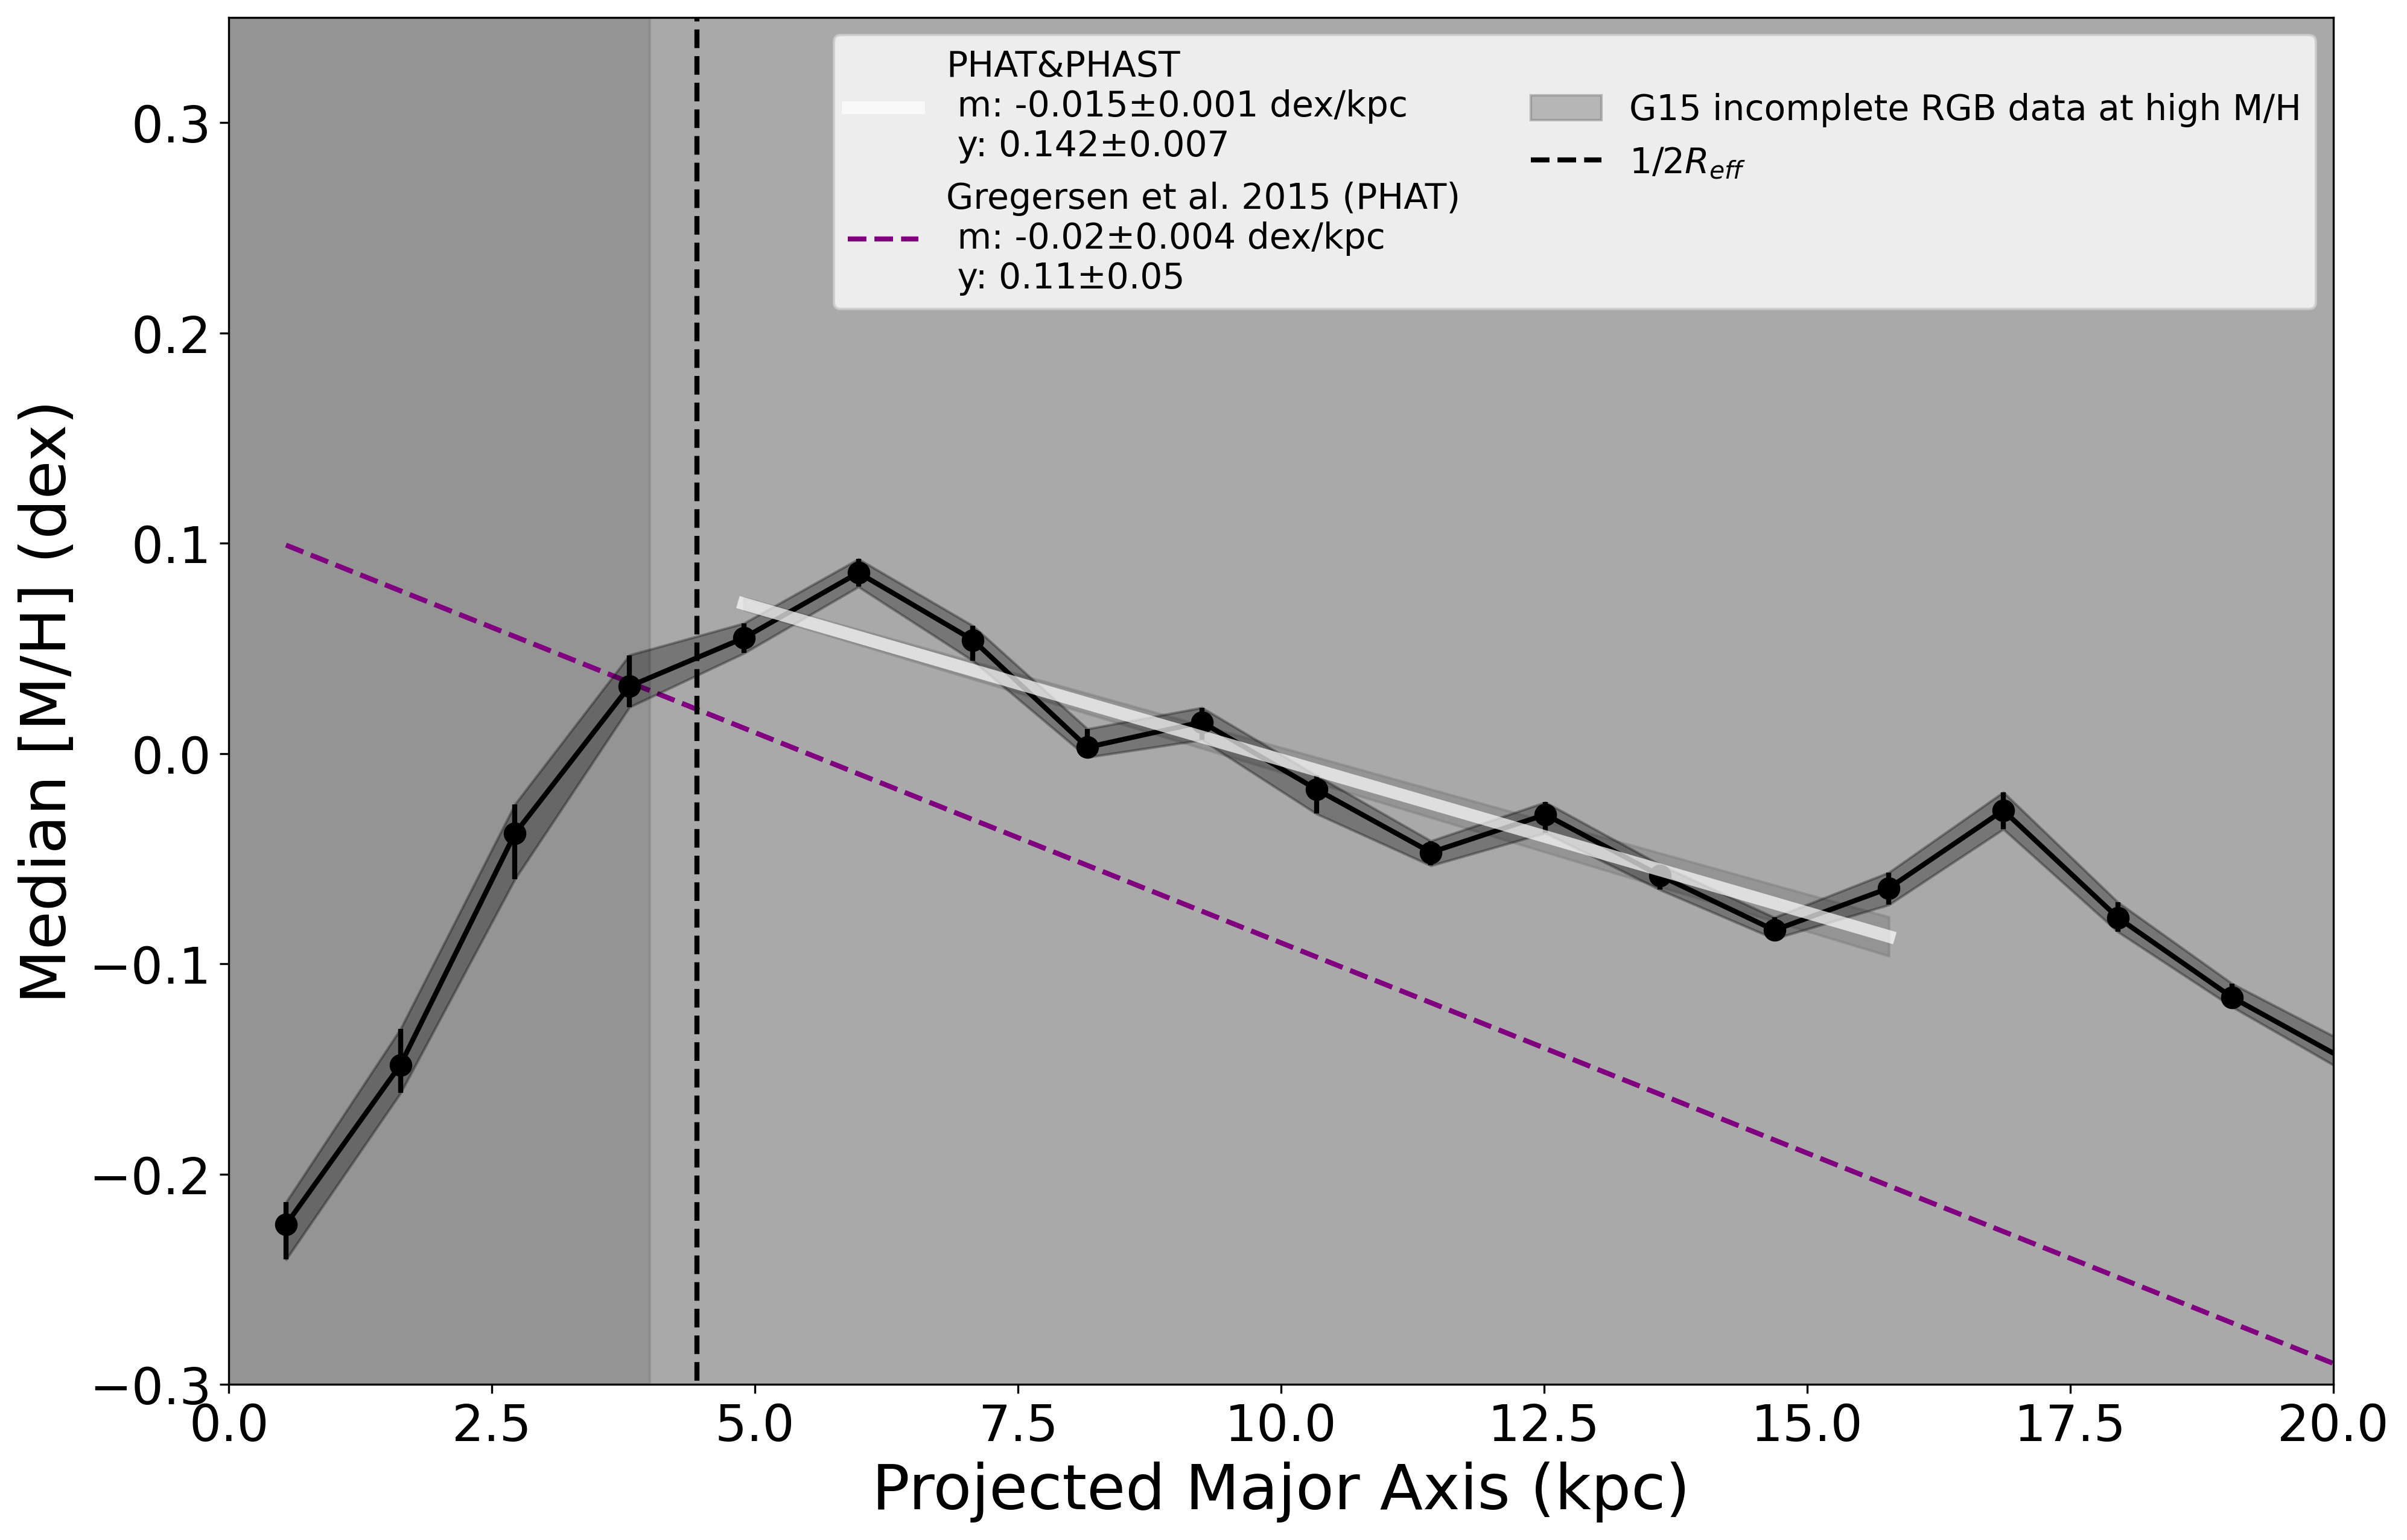

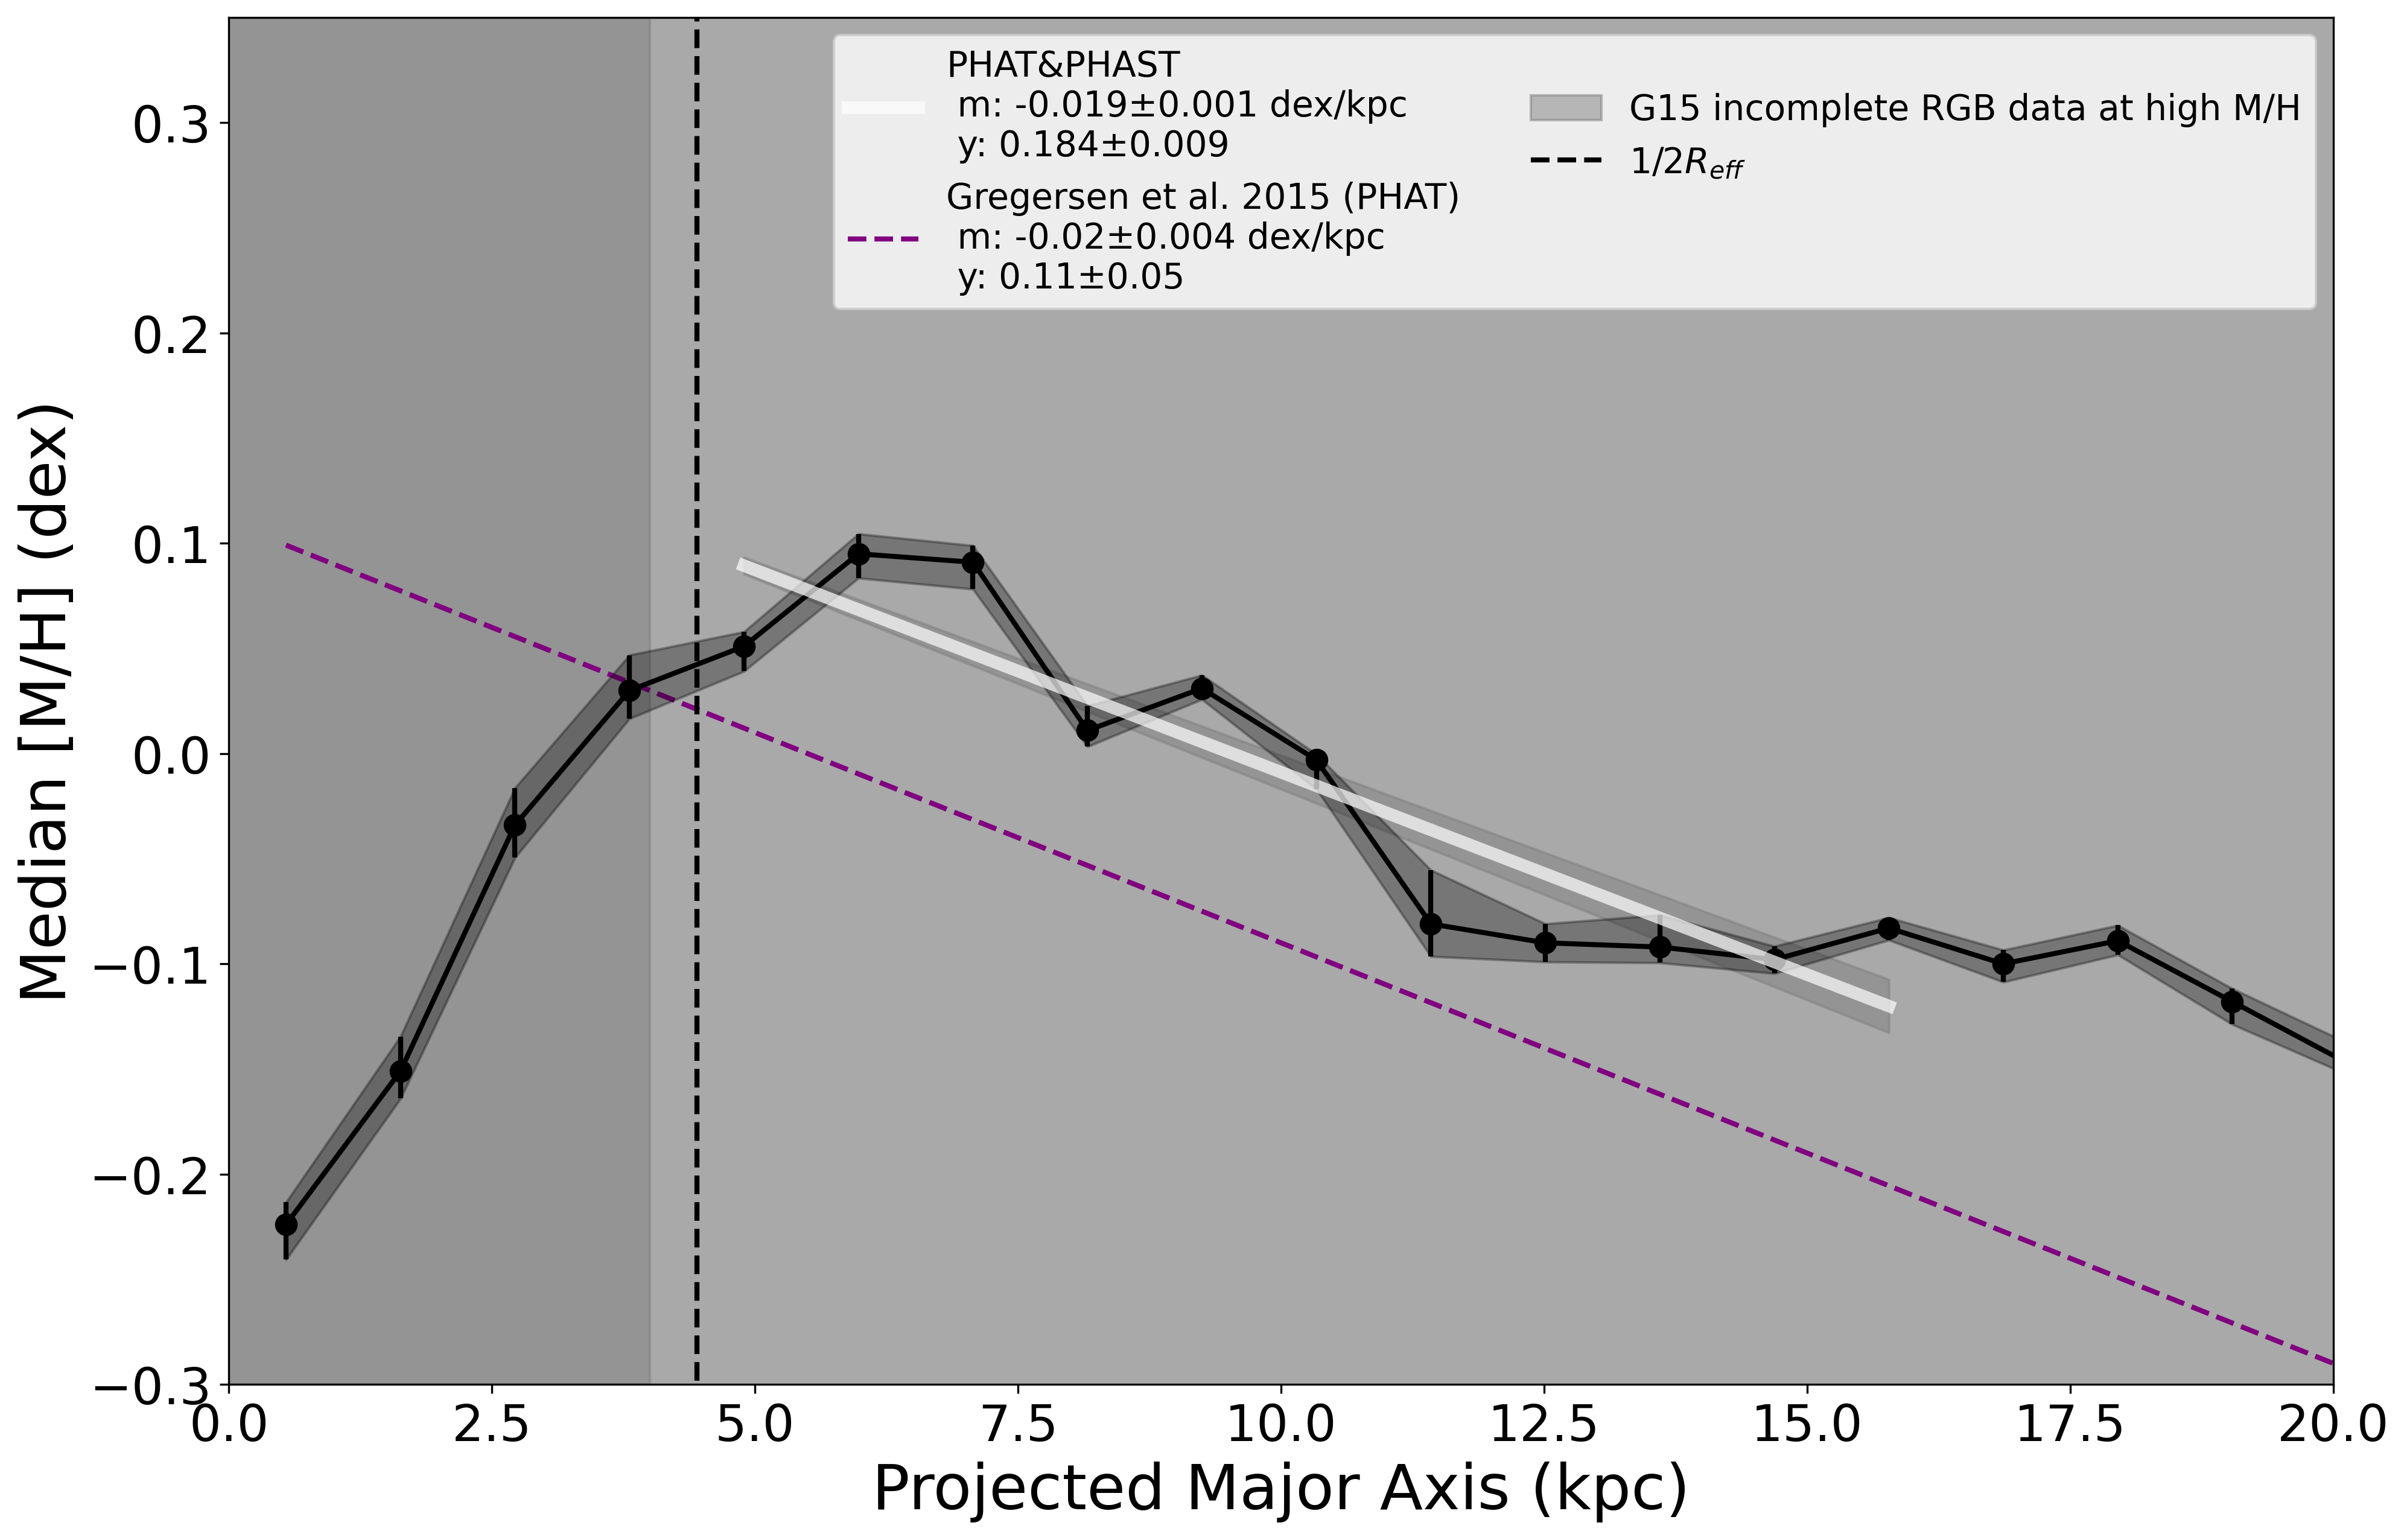

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def monte_carlo_fit(x, y, yerr, num_samples=1000):
    slopes = []
    intercepts = []
    for _ in range(num_samples):
        y_sample = y + np.random.normal(0, yerr)
        slope, intercept = np.polyfit(x, y_sample, 1)
        slopes.append(slope)
        intercepts.append(intercept)
    return np.mean(slopes), np.std(slopes), np.mean(intercepts), np.std(intercepts)

def plot_mh_gradiant(csv_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_data.csv', remove_dust=False):
    rad_profile_dust_df = pd.read_csv(csv_filepath)
    fig, axs = plt.subplots(1, 1, figsize=(15, 10), dpi=300)
    plt.fill_between(rad_profile_dust_df['Deprojected Radius (kpc)'],
                    rad_profile_dust_df['Elliptical QLow'],  # Lower bound of the confidence interval
                    rad_profile_dust_df['Elliptical QHigh'],  # Upper bound of the confidence interval
                    color='black', alpha=0.3, zorder=9)  # Adjust color and alpha as needed
    plt.errorbar(rad_profile_dust_df['Deprojected Radius (kpc)'], 
                    rad_profile_dust_df['Elliptical Median'], 
                    yerr=[rad_profile_dust_df['Elliptical Median']-rad_profile_dust_df['Elliptical QLow'],rad_profile_dust_df['Elliptical QHigh']-rad_profile_dust_df['Elliptical Median']],
                    marker='o',
                    color='black', zorder=9)

    # PHAT Plot linear fit
    # plt.fill_between(rad_profile_dust_df['Deprojected Radius (kpc)'],
    #                 rad_profile_dust_df['PHAT QLow'],  # Lower bound of the confidence interval
    #                 rad_profile_dust_df['PHAT QHigh'],  # Upper bound of the confidence interval
    #                 color='coral', alpha=0.3)  # Adjust color and alpha as needed
    # plt.errorbar(rad_profile_dust_df['Deprojected Radius (kpc)'], 
    #             rad_profile_dust_df['PHAT Elliptical Median'], yerr=[rad_profile_dust_df['PHAT Elliptical Median']-rad_profile_dust_df['PHAT QLow'],rad_profile_dust_df['PHAT QHigh']-rad_profile_dust_df['PHAT Elliptical Median']], 
    #             marker='o', 
    #             color='navy',
    #             )

    # PHAST Plot linear fit
    # plt.fill_between(rad_profile_dust_df['Deprojected Radius (kpc)'],
    #                 rad_profile_dust_df['PHAST QLow'],  # Lower bound of the confidence interval
    #                 rad_profile_dust_df['PHAST QHigh'],  # Upper bound of the confidence interval
    #                 color='orange', alpha=0.3)  # Adjust color and alpha as needed
    # plt.errorbar(rad_profile_dust_df['Deprojected Radius (kpc)'], 
    #             rad_profile_dust_df['PHAST Elliptical Median'], 
    #             yerr=[abs(rad_profile_dust_df['PHAST Elliptical Median'] - rad_profile_dust_df['PHAST QLow']), 
    #                 abs(rad_profile_dust_df['PHAST QHigh'] - rad_profile_dust_df['PHAST Elliptical Median'])], 
    #                 marker='o',
    #                 color='orangered',
    #                 )

    # Monte Carlo fit for Elliptical Median
    start_ind = 4
    stop_ind = 15
    x = rad_profile_dust_df['Deprojected Radius (kpc)'][start_ind:stop_ind] 
    y = rad_profile_dust_df['Elliptical Median'][start_ind:stop_ind]
    yerr = np.mean([abs(rad_profile_dust_df['Elliptical Median'][start_ind:stop_ind] - rad_profile_dust_df['Elliptical QLow'][start_ind:stop_ind]), 
                    abs(rad_profile_dust_df['Elliptical QHigh'][start_ind:stop_ind] - rad_profile_dust_df['Elliptical Median'][start_ind:stop_ind])], axis=0)
    slope, slope_err, intercept, intercept_err = monte_carlo_fit(x, y, yerr)
    fit_line = slope * x + intercept
    plt.plot(x, fit_line, color='white', alpha=0.7, label=f'PHAT&PHAST\n m: {np.round(slope, 3)}±{np.round(slope_err, 3)} dex/kpc \n y: {np.round(intercept, 3)}±{np.round(intercept_err, 3)}', linewidth=5, zorder=10)
    plt.fill_between(x, fit_line - slope_err * x, fit_line + slope_err * x, color='grey', alpha=0.5)

    # Monte Carlo fit for PHAT Elliptical Median
    # y = rad_profile_dust_df['PHAT Elliptical Median'][start_ind:stop_ind]
    # yerr = np.mean([abs(rad_profile_dust_df['PHAT Elliptical Median'][start_ind:stop_ind] - rad_profile_dust_df['PHAT QLow'][start_ind:stop_ind]), 
    #                 abs(rad_profile_dust_df['PHAT QHigh'][start_ind:stop_ind] - rad_profile_dust_df['PHAT Elliptical Median'][start_ind:stop_ind])], axis=0)
    # slope, slope_err, intercept, intercept_err = monte_carlo_fit(x, y, yerr)
    # fit_line = slope * x + intercept
    # plt.plot(x, fit_line, color='navy', label=f'PHAT\n m: {np.round(slope, 3)}±{np.round(slope_err, 3)} dex/kpc \n y: {np.round(intercept, 3)}±{np.round(intercept_err, 3)}', linewidth=3, alpha=0.8, linestyle='-', zorder=9)
    # plt.fill_between(x, fit_line - slope_err * x, fit_line + slope_err * x, color='navy', alpha=0.3)

    # # Monte Carlo fit for PHAST Elliptical Median
    # y = rad_profile_dust_df['PHAST Elliptical Median'][start_ind:stop_ind]
    # yerr = np.mean([abs(rad_profile_dust_df['PHAST Elliptical Median'][start_ind:stop_ind] - rad_profile_dust_df['PHAST QLow'][start_ind:stop_ind]), 
    #                 abs(rad_profile_dust_df['PHAST QHigh'][start_ind:stop_ind] - rad_profile_dust_df['PHAST Elliptical Median'][start_ind:stop_ind])], axis=0)
    # slope, slope_err, intercept, intercept_err = monte_carlo_fit(x[~np.isnan(y)], y[~np.isnan(y)], yerr[~np.isnan(y)])
    # fit_line = slope * x + intercept
    # plt.plot(x, fit_line, color='orangered', label=f'PHAST\n m: {np.round(slope, 3)}±{np.round(slope_err, 3)} dex/kpc \n y: {np.round(intercept, 3)}±{np.round(intercept_err, 3)}', linewidth=3, alpha=0.8, linestyle='-', zorder=9)
    # plt.fill_between(x, fit_line - slope_err * x, fit_line + slope_err * x, color='orangered', alpha=0.3)

    # Gregersen line
    g15_phat_fit_line = -0.02 * rad_profile_dust_df['Deprojected Radius (kpc)'] + 0.11 # slope = 0.02 dex/kpc - section 4.1 in Gregersen et al 2018
    plt.plot(rad_profile_dust_df['Deprojected Radius (kpc)'], g15_phat_fit_line, color='purple', label=f'Gregersen et al. 2015 (PHAT)\n m: -{np.round(0.02, 3)}±0.004 dex/kpc \n y: {np.round(0.11, 3)}±0.05', linestyle='--')
    plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2018 - where completeness become incomplete at high metallicity
    plt.vlines(4.45, ymin=-1, ymax=1, color='black', linestyle='--', label=r'$1/2 R_{eff}$')
    plt.ylim(-0.3, 0.35)
    plt.xlim(0,20)
    plt.xlabel('Projected Major Axis (kpc)', fontsize='25')
    plt.ylabel('Median [M/H] (dex)', fontsize='25')
    plt.xticks(fontsize='20')
    plt.yticks(fontsize='20')
    plt.legend(fontsize='14', ncols=2)
    plt.gca().set_facecolor('darkgrey')
    if remove_dust == True:
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_gradiant_nodust.pdf', dpi=300)
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_gradiant_nodust.jpeg', dpi=300)
    else:
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_gradiant.pdf', dpi=300)
        plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_gradiant.jpeg', dpi=300)

    plt.show()

plot_mh_gradiant(csv_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_data.csv', remove_dust=False)
plot_mh_gradiant(csv_filepath='/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_data_no_dust.csv', remove_dust=True)

In [362]:
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits') as hdu:
#     mh_map = hdu['INTERPOLATED_MH'].data
#     draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
#     max_dust_mass_value = 2e5
#     # Mask the high dust mass areas
#     mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     mh_map_no_dust = mh_map_no_dust.filled()

#     # The excluded dust mass values
#     excluded_dust_mass_map = mh_map[draine_dust_mass_map >= max_dust_mass_value]
#     # Get coordinate system
#     wcs = WCS(header = hdu[0].header)

#     # Calculate the scale in degrees per pixel
#     scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
#     scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive

#     # Assume a distance to the object in kpc
#     distance_kpc = 778  # Replace with the actual distance

#     # Convert the scale to kpc per pixel
#     scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
#     print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")


# center_x, center_y = 117, 134 # Rotated center pix value
# semi_major_axis, semi_minor_axis = 16.5, 60
# inner_radius, outer_radius = 0.0, 2.8
# # inner_radius, outer_radius = 0.0, 0.30 # radius of ellip in pixels
# # inner_radius, outer_radius = 0.0, 25 # radius of ellip in pixels
# # inner_radius, outer_radius = inner_radius*scale_kpc_per_pix, outer_radius*scale_kpc_per_pix # radius of ellip in kpc
# angle = np.deg2rad(-45)  # Angle in radians


# runs = np.linspace(inner_radius, outer_radius, 20)
# # runs = np.linspace(inner_radius, outer_radius, 20)
# delta_runs = np.round(runs[1], 3) - np.round(runs[0], 3)
# num_runs = len(runs)


# # Subplot parameters
# # Calculate the number of rows and columns for the subplots
# cols = 5  # You can change this to fit your needs
# rows = math.ceil(num_runs / cols)
# fig, axs = plt.subplots(rows, cols, figsize=(25, 15), dpi=300)  # Adjust the figure size as needed
# axs = axs.ravel()  # Flatten the array of axes


# ellip_median_list = []
# ellip_qlow_list = []
# ellip_qhigh_list = []
# phat_ellip_median_list = []
# phast_ellip_median_list = []
# deprojected_radius_x_list = []

# for idx, i in enumerate(runs):
#     # mask = create_elliptical_mask(wcs.wcs.crpix[0], wcs.wcs.crpix[1], semi_major_axis, semi_minor_axis, angle, mh_map.shape, i, i+delta_runs)
#     # mh_map_masked = np.where(mask, mh_map, np.nan)

#     # Exclude dust mass value
#     mask = create_elliptical_mask(wcs.wcs.crpix[0], wcs.wcs.crpix[1], semi_major_axis, semi_minor_axis, angle, mh_map_no_dust.shape, i, i+delta_runs)
#     mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

#     mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)

#     # Select PHAT and PHAST half by isolating the right and left half at the center
#     left_side_mask = np.indices(mh_map_rotated.shape)[1] < center_x
#     right_side_mask = np.indices(mh_map_rotated.shape)[1] >= center_x
#     mh_map_rotated_phat = np.where(left_side_mask, np.nan, mh_map_rotated)
#     mh_map_rotated_phast = np.where(right_side_mask, np.nan, mh_map_rotated)

#     # calculate the median and 5% and 95% convidence intervals
#     ellip_median = np.round(np.nanmedian(mh_map_rotated), 3)
#     phat_ellip_median = np.round(np.nanmedian(mh_map_rotated_phat), 3)
#     phast_ellip_median = np.round(np.nanmedian(mh_map_rotated_phast), 3)
#     deprojected_radius_x = np.mean((i, i+delta_runs))
    

#     # bootstrapping to get interval confidence
#     data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()
#     bootstrap_results = bootstrap(data=(data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
#     ellip_low = bootstrap_results.confidence_interval.low
#     ellip_high = bootstrap_results.confidence_interval.high
    
#     # print(f'Interval:{i}-{i+delta_runs}')
#     # print(f'PHAT Log(M/H)={phat_ellip_median}')
#     # print(f'PHAST Log(M/H)={phast_ellip_median}')
#     # print(f'PHAT&PHAST(M31) Log(M/H)={ellip_median}')

#     # Store data
#     deprojected_radius_x_list.append(deprojected_radius_x)
#     ellip_median_list.append(ellip_median)
#     ellip_qlow_list.append(ellip_low)
#     ellip_qhigh_list.append(ellip_high)
#     phat_ellip_median_list.append(phat_ellip_median)
#     phast_ellip_median_list.append(phast_ellip_median)


#     # Move to next radius interval
#     inner_radius += delta_runs

#     # Calculate the physical size of the image in kpc
#     width_kpc = mh_map_rotated.shape[1] * scale_kpc_per_pix
#     height_kpc = mh_map_rotated.shape[0] * scale_kpc_per_pix

#     # Calculate the left, right, bottom, and top values for the extent
#     left = -center_x * scale_kpc_per_pix
#     right = (mh_map_rotated.shape[1] - center_x) * scale_kpc_per_pix
#     bottom = -center_y * scale_kpc_per_pix
#     top = (mh_map_rotated.shape[0] - center_y) * scale_kpc_per_pix

#     # Adjust the extent so the center is at (0,0)
#     extent = [left, right, bottom, top]


#     # im0 = axs.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
#     im0 = axs[idx].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=extent)

#     # im0 = axs.imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)
#     fig.colorbar(im0, ax=axs[idx]).ax.tick_params(labelsize=15)
#     if i == runs.max():
#         axs[idx].set_title(f'>{np.round(runs.max()/scale_kpc_per_pix, 3)}')
#     else:
#         axs[idx].set_title(f'{np.round(i/scale_kpc_per_pix, 3)}kpc - {np.round((i+delta_runs)/scale_kpc_per_pix, 3)}kpc')

#     # axs.scatter(center_x, center_y, s=100, c='red', marker='+', label='New Center')
#     axs[idx].scatter(0, 0, s=100, c='red', marker='+', label='Normalized New Center')
#     axs[idx].set_xlim(-20,20)
#     axs[idx].set_ylim(-15,15)

#     axs[idx].tick_params(axis='both', which='major', labelsize=18)  # Adjust 'labelsize' as needed
#     axs[idx].tick_params(axis='both', which='minor', labelsize=18)

# # Remove unused subplots
# for idx in range(num_runs, rows*cols):
#     fig.delaxes(axs[idx])

# data = {
# 'Deprojected Radius (kpc)': deprojected_radius_x_list/scale_kpc_per_pix,
# 'Elliptical Median': ellip_median_list,
# 'Elliptical QLow': ellip_qlow_list,
# 'Elliptical QHigh': ellip_qhigh_list,
# 'PHAT Elliptical Median': phat_ellip_median_list,
# 'PHAST Elliptical Median': phast_ellip_median_list,
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

# # Save the DataFrame to a CSV file
# df.to_csv(f'/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_nodust{max_dust_mass_value}_data.csv', index=False)

# plt.tight_layout(pad=4.0)
# plt.savefig(f'/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_gradient_nodust{max_dust_mass_value}_ellipse.jpeg', bbox_inches='tight', dpi=300)
# plt.show()


In [363]:
# rad_profile_dust_df = pd.read_csv('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/radial_profile_nodust300000.0_data.csv')

# fig, axs = plt.subplots(1, 1, figsize=(15, 10), dpi=300)
# plt.fill_between(rad_profile_dust_df['Deprojected Radius (kpc)'],
#                  rad_profile_dust_df['Elliptical QLow'],  # Lower bound of the confidence interval
#                  rad_profile_dust_df['Elliptical QHigh'],  # Upper bound of the confidence interval
#                  color='grey', alpha=0.3, label='Confidence Interval')  # Adjust color and alpha as needed
# plt.errorbar(rad_profile_dust_df['Deprojected Radius (kpc)'], rad_profile_dust_df['Elliptical Median'], yerr=(rad_profile_dust_df['Elliptical Median']-rad_profile_dust_df['Elliptical QLow'],rad_profile_dust_df['Elliptical QHigh']-rad_profile_dust_df['Elliptical Median']))
# sns.lineplot(data=rad_profile_dust_df, x='Deprojected Radius (kpc)', y='Elliptical Median', label='M31 Log(M/H) Profile', marker='o', color='grey')
# sns.lineplot(data=rad_profile_dust_df, x='Deprojected Radius (kpc)', y='PHAT Elliptical Median', label='PHAT Log(M/H) Profile', marker='o', color='coral')
# sns.lineplot(data=rad_profile_dust_df, x='Deprojected Radius (kpc)', y='PHAST Elliptical Median', label='PHAST Log(M/H) Profile', marker='o', color='orange')

# # Plot linear fit
# start_ind = 3
# x = rad_profile_dust_df['Deprojected Radius (kpc)'][start_ind:] 
# y = rad_profile_dust_df['Elliptical Median'][start_ind:]
# slope, intercept = np.polyfit(x, y, 1)
# fit_line = slope * x + intercept
# plt.plot(x, fit_line, color='grey', label=f'PHAT&PHAST\n m: {np.round(slope, 3)}dex/kpc \n y: {np.round(intercept, 3)}', linewidth=5)


# # Plot linear fit
# y = rad_profile_dust_df['PHAT Elliptical Median'][start_ind:]
# slope, intercept = np.polyfit(x, y, 1)
# fit_line = slope * x + intercept
# plt.plot(x, fit_line, color='coral', label=f'PHAT\n m: {np.round(slope, 3)}dex/kpc \n y: {np.round(intercept, 3)}', linewidth=5, alpha=0.5, linestyle='--')

# # Plot linear fit
# y = rad_profile_dust_df['PHAST Elliptical Median'][start_ind:]
# slope, intercept = np.polyfit(x[~np.isnan(y)], y[~np.isnan(y)], 1)
# fit_line = slope * x + intercept
# plt.plot(x, fit_line, color='orange', label=f'PHAT\n m: {np.round(slope, 3)}dex/kpc \n y: {np.round(intercept, 3)}', linewidth=5, alpha=0.5, linestyle='--')


# # Gregersen line
# g15_phat_fit_line = -0.02 * x + 0.11 # slope = 0.02 dex/kpc - section 4.1 in Gregersen et al 2018
# plt.plot(x, g15_phat_fit_line, color='purple', label=f'Gregersen et al. 2015 (PHAT)\n m: {np.round(0.02, 3)}dex/kpc \n y: {np.round(0.11, 3)}', linestyle='--')

# plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2018 - where completeness become incomplete at high metallicity
# plt.vlines(4.45, ymin=-1, ymax=1, color='black', linestyle='--', label=r'$1/2 R_{eff}$')
# plt.ylim(-0.3, 0.2)
# plt.xlim(0,30)
# plt.xlabel('Projected Major Axis (kpc)', fontsize='25')
# plt.ylabel('Median [M/H] (dex)', fontsize='25')
# plt.xticks(fontsize='20')
# plt.yticks(fontsize='20')
# plt.legend(fontsize='12', ncols=2)
# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/mh_gradiant_nodust.pdf', dpi=300)
# plt.show()

## Ellipse subplot with dust included

In [364]:
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits') as hdu:
#     mh_map = hdu['INTERPOLATED_MH'].data
#     draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
#     max_dust_mass_value = 2e5
#     # Mask the high dust mass areas
#     mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     mh_map_no_dust = mh_map_no_dust.filled()

#     # The excluded dust mass values
#     excluded_dust_mass_map = mh_map[draine_dust_mass_map >= max_dust_mass_value]

#     # mh_map_no_dust = apply_mask_to_map(hdu, 'INTERPOLATED_MH', mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)
#     # Calculate the scale in degrees per pixel
#     scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
#     scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive

#     # Assume a distance to the object in kpc
#     distance_kpc = 778  # Replace with the actual distance

#     # Convert the scale to kpc per pixel
#     scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
#     print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")
# # Define the inner and outer radii
# center_x, center_y = 117, 134
# # center_x, center_y = 84, 81 #? These values are more in the center than the WCS center pixels?
# # center_x, center_y = 95, 100 #? These values are more in the center than the WCS center pixels?


# # center_x, center_y = center_x_pix, center_y_pix
# semi_major_axis, semi_minor_axis = 16.5, 60
# # semi_major_axis, semi_minor_axis = 16.5/3, 60/3
# # i = np.arccos(semi_major_axis/semi_minor_axis)
# # inner_radius, outer_radius = 0.0, 3.0
# inner_radius, outer_radius = 0.1, 23 # radius of ellip in pixels
# # inner_radius, outer_radius = 0.1, 50 # radius of ellip in pixels

# # angle = np.deg2rad(i)  # Angle in radians
# angle = np.deg2rad(-45)  # Angle in radians

# # runs = np.linspace(inner_radius, outer_radius, 15)
# runs = np.linspace(inner_radius*scale_kpc_per_pix, outer_radius*scale_kpc_per_pix, 20)
# delta_runs = runs[1]-runs[0]
# num_runs = len(runs)

# # Calculate the number of rows and columns for the subplots
# cols = 5  # You can change this to fit your needs
# rows = math.ceil(num_runs / cols)
# fig, axs = plt.subplots(rows, cols, figsize=(25, 15), dpi=300)  # Adjust the figure size as needed
# axs = axs.ravel()  # Flatten the array of axes

# ellip_median_list = []
# ellip_qlow_list = []
# ellip_qhigh_list = []
# for idx, i in enumerate(runs):
#     mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, i, i+delta_runs)
#     mh_map_masked = np.where(mask, mh_map, np.nan)

#     # Exclude dust mass value
#     # mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map_no_dust.shape, i, i+delta_runs)
#     # mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

#     # Rotate the mh_map
#     mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)
#     # Calculate the maximum extent from the center in both directions
#     # max_extent_x = max(center_x, mh_map_rotated.shape[1] - center_x) * scale_kpc_per_pix
#     # max_extent_y = max(center_y, mh_map_rotated.shape[0] - center_y) * scale_kpc_per_pix
    
#     # # Calculate the coordinates of the x and y axes in kpc/pix
#     # y_coords = np.arange(mh_map_rotated.shape[0]) * scale_kpc_per_pix
#     # x_coords = np.arange(mh_map_rotated.shape[1]) * scale_kpc_per_pix

#     # im0 = axs[idx].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
#     im0 = axs[idx].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5)

#     fig.colorbar(im0, ax=axs[idx]).ax.tick_params(labelsize=15)
#     if i == runs.max():
#         axs[idx].set_title(f'{np.round(runs.max()/scale_kpc_per_pix, 3)}')
#     else:
#         axs[idx].set_title(f'{np.round(i/scale_kpc_per_pix, 3)}kpc - {np.round((i+delta_runs)/scale_kpc_per_pix, 3)}kpc')

#     # calculate the median and 5% and 95% convidence intervals
#     ellip_median = np.round(np.nanmedian(mh_map_masked), 3)

#     # bootstrapping to get interval confidence
#     data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()
#     bootstrap_results = bootstrap(data=(data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
#     ellip_low = bootstrap_results.confidence_interval.low
#     ellip_high = bootstrap_results.confidence_interval.high

#     # Create a Patch as a proxy artist for the legend
#     median_patch = mpatches.Patch(color='none', label=f'Median = {np.round(ellip_median, 3)} M/H \n 5% {np.round(ellip_low, 3)} \n 95% {np.round(ellip_high, 3)} \n N={np.count_nonzero(~np.isnan(mh_map_masked))}')
#     axs[idx].legend(handles=[median_patch], loc='lower right', frameon=False, fontsize=12)
#     # axs[idx].hlines(134, 0, 300, color='black')

#     ellip_median_list.append(ellip_median)
#     ellip_qlow_list.append(ellip_low)
#     ellip_qhigh_list.append(ellip_high)

#     axs[idx].scatter(center_x, center_y, color='red', s=10, marker='+')
#     # axs[idx].scatter(0, 0, marker='+', color='red', s=100)
#     axs[idx].tick_params(axis='both', which='major', labelsize=18)  # Adjust 'labelsize' as needed
#     axs[idx].tick_params(axis='both', which='minor', labelsize=18)


# # Remove unused subplots
# for idx in range(num_runs, rows*cols):
#     fig.delaxes(axs[idx])

# # Set a common x and y label for all subplots
# fig.text(0.5, 0.00, 'Projected Major Axis (kpc)', ha='center', va='center', fontsize=35, weight='bold')
# fig.text(0.0, 0.5, 'Projected Minor Axis (kpc)', ha='center', va='center', rotation='vertical', fontsize=35, weight='bold')


# # fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.05) 
# plt.tight_layout(pad=4.0)
# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_gradient_ellipse.jpeg', bbox_inches='tight', dpi=300)
# plt.show()

In [409]:
# mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()

In [410]:
# data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()


# bootstrap_results = bootstrap(data=(data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
# bootstrap_results

In [411]:
# bootstrap_results.confidence_interval.low

In [412]:
# proj_semimajor_axis = np.linspace(x_coords.min(), x_coords.max(), len(runs))
# proj_semimajor_axis

In [413]:
# import numpy as np
# fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figure size as needed

# plt.scatter(runs/scale_kpc_per_pix, ellip_median_list)
# ellip_median_array = np.array(ellip_median_list)
# ellip_q25_array = np.array(ellip_q25_list)
# ellip_q75_array = np.array(ellip_q75_list)
# plt.errorbar(runs/scale_kpc_per_pix, ellip_median_list, yerr=(ellip_median_array - ellip_q25_array, ellip_q75_array - ellip_median_array), fmt='o')
# plt.xlabel('')

# # Fit a linear regression line
# slope, intercept = np.polyfit(runs/scale_kpc_per_pix, ellip_median_list, 1)
# fit_line = slope * runs/scale_kpc_per_pix + intercept
# plt.plot(runs/scale_kpc_per_pix, fit_line, color='red', label=f'Slope: {np.round(slope, 3)}dex/kpc \n y-intercept: {np.round(intercept, 3)}\nGregersen et al 2015: -0.020dex/kpc')
# # plt.legend()

# # Shaded region from 0 to 4.45 kpc (1/2 Reff)
# plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2015 - where completeness become incomplete at high metallicity
# plt.vlines(4.45, ymin=0, ymax=1, color='black', linestyle='--', label='1/2 Reff')
# plt.ylim(0, 0.7)

# plt.xlabel('Projected Major Axis (kpc)')
# plt.ylabel('M/H')
# plt.legend()
# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_gradient.jpeg')
# plt.show()


In [365]:
# import numpy as np
# fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figure size as needed

# plt.scatter(runs[4:]/scale_kpc_per_pix, ellip_median_list[4:])
# ellip_median_array = np.array(ellip_median_list)
# ellip_q25_array = np.array(ellip_qlow_list)
# ellip_q75_array = np.array(ellip_qhigh_list)
# plt.errorbar(runs/scale_kpc_per_pix, ellip_median_list, yerr=(ellip_median_array - ellip_q25_array, ellip_q75_array - ellip_median_array), fmt='o')
# plt.xlabel('')

# # Fit a linear regression line
# slope, intercept = np.polyfit(runs[4:], ellip_median_list[4:], 1)
# fit_line = slope * runs[4:] + intercept
# plt.plot(runs[4:]/scale_kpc_per_pix, fit_line, color='red', label=f'Slope: {np.round(slope, 3)}dex/kpc \n y-intercept: {np.round(intercept, 3)}\nGregersen et al 2015: -0.020dex/kpc')
# # plt.legend()

# # Shaded region from 0 to 4.45 kpc (1/2 Reff)
# plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2015 - where completeness become incomplete at high metallicity
# plt.vlines(4.45, ymin=-1.0, ymax=1, color='black', linestyle='--', label='1/2 Reff')
# plt.ylim(-1.0, 0.7)

# plt.xlabel('Projected Major Axis (kpc)')
# plt.ylabel('M/H')
# plt.legend()

# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_gradient.jpeg')
# plt.show()


## Ellipse subplot with dust mass excluded (>3e5 dust surafce mass density)

In [366]:
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/4GYRS_RGB_AGB_isochrones/RGB/m31_g15_RGB_maps.fits') as hdu:
#     mh_map = hdu['INTERPOLATED_MH'].data
#     draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
#     max_dust_mass_value = 2e5
#     # Mask the high dust mass areas
#     mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     mh_map_no_dust = mh_map_no_dust.filled()

#     # The excluded dust mass values
#     excluded_dust_mass_map = mh_map[draine_dust_mass_map >= max_dust_mass_value]

#     # mh_map_no_dust = apply_mask_to_map(hdu, 'INTERPOLATED_MH', mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)

# # Define the inner and outer radii
# # center_x, center_y = 84, 81
# # center_x, center_y = 95, 100 #? These values are more in the center than the WCS center pixels?
# # center_x, center_y = 100, 105 
# center_x, center_y = 117, 134


# # center_x, center_y = center_x_pix, center_y_pix
# semi_major_axis, semi_minor_axis = 16.5, 60
# # semi_major_axis, semi_minor_axis = 16.5/3, 60/3
# # i = np.arccos(semi_major_axis/semi_minor_axis)
# # inner_radius, outer_radius = 0.0, 3.0
# inner_radius, outer_radius = 0.1, 23 # radius of ellip in pixels
# # inner_radius, outer_radius = 0.1, 50 # radius of ellip in pixels

# # angle = np.deg2rad(i)  # Angle in radians
# angle = np.deg2rad(-45)  # Angle in radians

# # runs = np.linspace(inner_radius, outer_radius, 15)
# runs = np.linspace(inner_radius*scale_kpc_per_pix, outer_radius*scale_kpc_per_pix, 20)
# delta_runs = runs[1]-runs[0]
# num_runs = len(runs)

# # Calculate the number of rows and columns for the subplots
# cols = 5  # You can change this to fit your needs
# rows = math.ceil(num_runs / cols)
# fig, axs = plt.subplots(rows, cols, figsize=(25, 15), dpi=200)  # Adjust the figure size as needed
# axs = axs.ravel()  # Flatten the array of axes

# ellip_nodust_median_list = []
# ellip_nodust_qlow_list = []
# ellip_nodust_qhigh_list = []
# for idx, i in enumerate(runs):
#     # mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map.shape, i, i+delta_runs)
#     # mh_map_masked = np.where(mask, mh_map, np.nan)

#     # Exclude dust mass value
#     mask = create_elliptical_mask(center_x, center_y, semi_major_axis, semi_minor_axis, angle, mh_map_no_dust.shape, i, i+delta_runs)
#     mh_map_masked = np.where(mask, mh_map_no_dust, np.nan)

#     # Rotate the mh_map
#     mh_map_rotated = rotate(mh_map_masked, 45, reshape=True, mode='constant', cval=np.nan, order=0)

#     # Calculate the maximum extent from the center in both directions
#     max_extent_x = max(center_x, mh_map_rotated.shape[1] - center_x) * scale_kpc_per_pix
#     max_extent_y = max(center_y, mh_map_rotated.shape[0] - center_y) * scale_kpc_per_pix
    
#     # Calculate the coordinates of the x and y axes in kpc/pix
#     y_coords = np.arange(mh_map_rotated.shape[0]) * scale_kpc_per_pix
#     x_coords = np.arange(mh_map_rotated.shape[1]) * scale_kpc_per_pix

#     im0 = axs[idx].imshow(mh_map_rotated, cmap='inferno', aspect='auto', origin='lower', vmin=-0.5, vmax=0.5, extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
#     fig.colorbar(im0, ax=axs[idx]).ax.tick_params(labelsize=15)
#     if i == runs.max():
#         axs[idx].set_title(f'{np.round(runs.max()/scale_kpc_per_pix, 3)}', fontsize=15)
#     else:
#         axs[idx].set_title(f'{np.round(i/scale_kpc_per_pix, 3)}kpc - {np.round((i+delta_runs)/scale_kpc_per_pix, 3)}kpc', fontsize=15)

#     # calculate the median and 5% and 95% convidence intervals
#     ellip_median = np.round(np.nanmedian(mh_map_masked), 3)
#     # ellip_low = np.round(np.nanpercentile(mh_map_masked, 5), 3)
#     # ellip_high = np.round(np.nanpercentile(mh_map_masked, 95), 3)

#     # bootstrapping to get interval confidence
#     data_filtered = mh_map_rotated[~np.isnan(mh_map_rotated)].flatten()
#     bootstrap_results = bootstrap(data=(data_filtered,), statistic=np.nanmedian, n_resamples=9999, method='percentile', confidence_level=0.95, random_state=42)
#     ellip_low = bootstrap_results.confidence_interval.low
#     ellip_high = bootstrap_results.confidence_interval.high

#     # Create a Patch as a proxy artist for the legend
#     median_patch = mpatches.Patch(color='none', label=f'Median = {ellip_median} M/H \n 5% {ellip_low} \n 95% {ellip_high} \n N={np.count_nonzero(~np.isnan(mh_map_masked))}')
#     axs[idx].legend(handles=[median_patch], loc='lower right', frameon=False, fontsize=12)
#     # axs[idx].hlines(134, 0, 300, color='black')

#     ellip_nodust_median_list.append(ellip_median)
#     ellip_nodust_qlow_list.append(ellip_low)
#     ellip_nodust_qhigh_list.append(ellip_high)

#     # axs[idx].scatter(center_x_pix, center_y_pix, color='red', s=10, marker='x')
#     axs[idx].scatter(0, 0, marker='+', color='red', s=100)
#     axs[idx].tick_params(axis='both', which='major', labelsize=18)  # Adjust 'labelsize' as needed
#     axs[idx].tick_params(axis='both', which='minor', labelsize=15)


# # Remove unused subplots
# for idx in range(num_runs, rows*cols):
#     fig.delaxes(axs[idx])

# # Set a common x and y label for all subplots
# fig.text(0.5, 0.00, 'Projected Major Axis (kpc)', ha='center', va='center', fontsize=35, weight='bold')
# fig.text(0.0, 0.5, 'Projected Minor Axis (kpc)', ha='center', va='center', rotation='vertical', fontsize=35, weight='bold')



# plt.tight_layout()
# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/MH_nodust_gradient_ellipse.jpeg')
# plt.show()

In [1]:
# import numpy as np
# fig, axs = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figure size as needed

# plt.scatter(runs[4:]/scale_kpc_per_pix, ellip_nodust_median_list[4:])
# ellip_nodust_median_array = np.array(ellip_nodust_median_list)
# ellip_nodust_qlow_array = np.array(ellip_nodust_qlow_list)
# ellip_nodust_qhigh_array = np.array(ellip_nodust_qhigh_list)
# plt.errorbar(runs/scale_kpc_per_pix, ellip_nodust_median_list, yerr=(ellip_nodust_median_array - ellip_nodust_qlow_array, ellip_nodust_qhigh_array - ellip_nodust_median_array), fmt='o')
# plt.xlabel('')

# # Fit a linear regression line
# slope, intercept = np.polyfit(runs[4:]/scale_kpc_per_pix, ellip_nodust_median_list[4:], 1)
# fit_line = slope * runs[4:]/scale_kpc_per_pix + intercept
# plt.plot(runs[4:]/scale_kpc_per_pix, fit_line, color='red', label=f'Slope: {np.round(slope, 3)}dex/kpc \n y-intercept: {np.round(intercept, 3)}\nGregersen et al 2015: -0.020dex/kpc')
# # plt.legend()

# # Shaded region from 0 to 4.45 kpc (1/2 Reff)
# plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2015 - where completeness become incomplete at high metallicity
# plt.vlines(4.45, ymin=-1, ymax=1, color='black', linestyle='--', label='1/2 Reff')
# plt.ylim(-0.4, 0.2)
# plt.xlim(0,24)

# plt.xlabel('Projected Major Axis (kpc)')
# plt.ylabel('M/H')
# plt.legend()

# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_nodust_gradient.jpeg')
# plt.show()


## plot the dust and nodust gradients


In [2]:
# import numpy as np
# fig, axs = plt.subplots(1, 1, figsize=(15, 10), dpi=300)  # Adjust the figure size as needed

# # without dust
# # plt.scatter(runs[5:]/scale_kpc_per_pix, ellip_nodust_median_list[5:], color='navy')
# ellip_nodust_median_array = np.array(ellip_nodust_median_list)
# ellip_nodust_q25_array = np.array(ellip_nodust_qlow_list)
# ellip_nodust_q75_array = np.array(ellip_nodust_qhigh_list)
# plt.errorbar(runs/scale_kpc_per_pix, ellip_nodust_median_list, yerr=(ellip_nodust_median_array - ellip_nodust_q25_array, ellip_nodust_q75_array - ellip_nodust_median_array), fmt='o', color='navy')
# # Fit a linear regression line
# slope_nodust, intercept_nodust = np.polyfit(runs[5:]/scale_kpc_per_pix, ellip_nodust_median_list[5:], 1)
# fit_line_no_dust = slope_nodust * runs[5:]/scale_kpc_per_pix + intercept_nodust
# plt.plot(runs[5:]/scale_kpc_per_pix, fit_line_no_dust, color='navy', label=f'No High Dust Mass \n m: {np.round(slope_nodust, 3)}dex/kpc \n y: {np.round(intercept_nodust, 3)}\nGregersen et al 2015: -0.020dex/kpc')


# # With dust
# # plt.scatter(runs[5:]/scale_kpc_per_pix, ellip_median_list[5:], color='darkred')
# ellip_median_array = np.array(ellip_median_list)
# ellip_q25_array = np.array(ellip_qlow_list)
# ellip_q75_array = np.array(ellip_qhigh_list)
# plt.errorbar(runs/scale_kpc_per_pix, ellip_median_list, yerr=(ellip_median_array - ellip_q25_array, ellip_q75_array - ellip_median_array), fmt='o', color='darkred')
# # Fit a linear regression line
# slope, intercept = np.polyfit(runs[5:]/scale_kpc_per_pix, ellip_median_list[5:], 1)
# fit_line = slope * runs[5:]/scale_kpc_per_pix + intercept
# plt.plot(runs[5:]/scale_kpc_per_pix, fit_line, color='darkred', label=f'Complete Map\n m: {np.round(slope, 3)}dex/kpc \n y: {np.round(intercept, 3)}')


# # Gregersen line
# g15_phat_fit_line = -0.02 * runs[5:]/scale_kpc_per_pix + 0.11 # slope = 0.02 dex/kpc - section 4.1 in Gregersen et al 2018
# plt.plot(runs[5:]/scale_kpc_per_pix, g15_phat_fit_line, color='coral', label=f'Gregersen et al. 2015 (PHAT)\n m: {np.round(0.02, 3)}dex/kpc \n y: {np.round(0.11, 3)}', linestyle='--')


# # Shaded region from 0 to 4.45 kpc (1/2 Reff)
# plt.axvspan(0, 4, color='gray', alpha=0.5, label='G15 incomplete RGB data at high M/H') # Gregersen et al 2018 - where completeness become incomplete at high metallicity
# plt.vlines(4.45, ymin=-1, ymax=1, color='black', linestyle='--', label=r'$1/2 R_{eff}$')
# plt.ylim(-0.4, 0.3)
# plt.xlim(0,24)
# plt.xlabel('Projected Major Axis (kpc)', fontsize='25')
# plt.ylabel('Median [M/H] (dex)', fontsize='25')
# plt.xticks(fontsize='20')
# plt.yticks(fontsize='20') 
# plt.legend(fontsize='12', ncols=2)

# plt.savefig('/Users/mmckay/phd_projects/analysis_routine/FIGURES/m31_mh_gradient.jpeg', dpi=300)
# plt.show()


# Make a full map and change the coords to semi-minor and semi-major axis

In [3]:
# # Save ellicptical map
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
#     extnames = [hdul.header.get('EXTNAME') for hdul in hdu]
#     # mh_map = hdu['INTERPOLATED_MH'].data
#     mh_map = hdu['INTERPOLATED_MH'].data
#     draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
#     max_dust_mass_value = 2e5
#     # Mask the high dust mass areas
#     mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     mh_map_no_dust = mh_map_no_dust.filled()

#     # Header info
#     header = hdu[0].header
#     # print(hdu.info())

#     # Extract the WCS
#     wcs = WCS(header)

#     # Calculate the scale in degrees per pixel
#     scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
#     scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive

#     # Assume a distance to the object in kpc
#     distance_kpc = 778  # Replace with the actual distance

#     # Convert the scale to kpc per pixel
#     scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
#     # print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")

#     # print(wcs)
#     wcs.wcs.crpix[0], wcs.wcs.crpix[1] = 84, 81
#     center_x_pix = wcs.wcs.crpix[0]
#     center_y_pix = wcs.wcs.crpix[1]


#     center_x_ra = wcs.wcs.crval[0]
#     center_y_dec = wcs.wcs.crval[1]

#     # print(f"Center pixel: {center_x_pix}, {center_y_pix}")
#     # print(f"Center RA, Dec: {center_x_ra}, {center_y_dec}")
#     # save elliptical radius maps to the fits file
#     if 'Elliptical_Radius_Map' not in extnames or 'Elliptical_Radius_Kpc_Map' not in extnames:
#         angle = np.deg2rad(-45)  # Angle in radians
#         semi_major_axis, semi_minor_axis = 16.5, 60
#         center_x, center_y = center_x_pix, center_y_pix
#         elliptical_radius_map = calculate_elliptical_radius(mh_map, center_x, center_y, semi_major_axis, semi_minor_axis, angle)
#         elliptical_radius_kpc_map = (elliptical_radius_map/scale_kpc_per_pix) #/4.45


#         # Save the elliptical radius map to the fits file
#         hdu.append(fits.ImageHDU(elliptical_radius_map, name='Elliptical_Radius_Map'))
#         hdu.append(fits.ImageHDU(elliptical_radius_kpc_map, name='Elliptical_Radius_Kpc_Map'))
#         hdu.info()
#         # hdu.writeto('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits', overwrite=True)
#         hdu.close()

#     else:
#         hdu.info()
#         hdu.close()
        


# print(center_x, center_y)

In [4]:
# # Read in processed fits file
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
#     mh_map = hdu['INTERPOLATED_MH'].data
#     ellip_kpc_map = hdu['ELLIPTICAL_RADIUS_KPC_MAP'].data
#     draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
#     max_dust_mass_value = 2e5
#     # Mask the high dust mass areas
#     mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     mh_map_no_dust = mh_map_no_dust.filled()

#     # Header info
#     header = hdu[0].header
#     print(hdu.info())÷

#     # Extract the WCS
#     wcs = WCS(header)

#     # Calculate the scale in degrees per pixel
#     scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
#     scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive

#     # Assume a distance to the object in kpc
#     distance_kpc = 778  # Replace with the actual distance

#     # Convert the scale to kpc per pixel
#     scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
#     # print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")

#     # print(wcs)

#     center_x_pix = wcs.wcs.crpix[0]
#     center_y_pix = wcs.wcs.crpix[1]

#     center_x_ra = wcs.wcs.crval[0]
#     center_y_dec = wcs.wcs.crval[1]

#     # print(f"Center pixel: {center_x_pix}, {center_y_pix}")
#     # print(f"Center RA, Dec: {center_x_ra}, {center_y_dec}")


#     # mh_map_no_dust = apply_mask_to_map(hdu, 'INTERPOLATED_MH', mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)
# # Set parameter 
# # center_x, center_y = center_x_pix, center_y_pix
# # center_x, center_y = 95, 100 # These values are wrong
# center_x, center_y = 84, 81 
# print(center_x, center_y)
# semi_major_axis, semi_minor_axis = 16.5, 60
# inner_radius, outer_radius = 0.1, 23 # radius of ellip in pixels
# angle = np.deg2rad(-45)  # Angle in radians
# height, width = mh_map.shape


# # # Rotate map
# # mh_map_rotated = rotate(mh_map, 45, reshape=True, mode='constant', cval=np.nan, order=0)

# # #Shift image
# # mh_map_rotated = shift(mh_map_rotated, (0,0), order=0, mode='constant', cval=np.nan)

# # # Make Elliptical radius map
# # elliptical_radius_map = calculate_elliptical_radius(mh_map, center_x, center_y, semi_major_axis, semi_minor_axis, angle)
# # # elliptical_radius_map = rotate(elliptical_radius_map, 45, reshape=True, mode='constant', cval=np.nan, order=0)

# # # Calculate the maximum extent from the center in both directions
# # max_extent_x = max(center_x, mh_map.shape[1] - center_x) * scale_kpc_per_pix
# # max_extent_y = max(center_y, mh_map.shape[0] - center_y) * scale_kpc_per_pix
# # elliptical_radius_kpc_map = (elliptical_radius_map/scale_kpc_per_pix) #/4.45


# # Plot the elliptical radius map
# plt.figure(figsize=(10, 8))
# plt.imshow(ellip_kpc_map, origin='lower', cmap='viridis', extent=(0, width, 0, height))
# # plt.imshow(elliptical_radius_kpc_map, origin='lower', cmap='viridis', extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
# plt.colorbar(label='Elliptical Radius')

# # Overlay the contour of mh_map
# contour_levels = np.linspace(np.nanmin(mh_map), np.nanmax(mh_map), num=10)  # Adjust the number of levels as needed
# plt.contour(mh_map, levels=contour_levels, colors='white', origin='lower', extent=(0, width, 0, height))
# plt.contour(ellip_kpc_map, levels=[4.45, 9.9, 26], colors='red', linewidths=2, origin='lower', extent=(0, width, 0, height))

# # Add a red 'X' marker at the center coordinate
# plt.scatter(center_x, center_y, color='red', marker='+', s=100)  # s is the size of the marker
# plt.scatter(95, 100, color='green', marker='+', s=100)  # Adjust 's' for size as needed

# plt.title('Elliptical Radius Map with mh_map Contour')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.show()

In [5]:
# def rotate_around_point(image, angle, center_x, center_y):
#     # Calculate the shifts to move the center to the origin
#     shift_y, shift_x = np.array(image.shape) / 2 - np.array([center_y, center_x])
#     # First shift the image to center the point of rotation
#     shifted_image = shift(image, shift=[shift_y, shift_x], order=0, mode='constant', cval=np.nan)
#     # Rotate the image
#     rotated_image = rotate(shifted_image, angle, reshape=False, order=0, mode='constant', cval=np.nan)
#     # Shift back
#     shifted_back_image = shift(rotated_image, shift=[-shift_y, -shift_x], order=0, mode='constant', cval=np.nan)
#     return shifted_back_image

# # def rotate_around_point(image, angle, center_x, center_y):
# #     # Calculate shifts to move the center to the origin
# #     shift_y, shift_x = np.array(image.shape) / 2 - np.array([center_y, center_x])
# #     # Apply padding if necessary to prevent data loss
# #     # Rotate the image
# #     rotated_image = rotate(image, angle, reshape=False, order=1, mode='constant', cval=0)
# #     # Shift back
# #     # Note: Implement the shifting logic as needed
# #     return rotated_image

# # def rotate_around_point(image, angle, center_x, center_y):
# #     # Calculate the shifts to move the center to the origin
# #     shift_y, shift_x = np.array(image.shape[:2]) / 2 - np.array([center_y, center_x])
    
# #     # Calculate padding to avoid data loss during shift
# #     pad_y = int(abs(shift_y)) * 2
# #     pad_x = int(abs(shift_x)) * 2
# #     padded_image = np.pad(image, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=np.nan)
    
# #     # Adjust shift values to account for the padding
# #     shift_y += pad_y
# #     shift_x += pad_x
    
# #     # Shift the padded image to center the point of rotation
# #     shifted_image = shift(padded_image, shift=[shift_y, shift_x], order=0, mode='constant', cval=np.nan)
    
# #     # Rotate the image without changing its shape to preserve original data
# #     rotated_image = rotate(shifted_image, angle, reshape=False, order=0, mode='constant', cval=np.nan)
    
# #     # Shift back to the original position, ensuring all original data is kept
# #     shifted_back_image = shift(rotated_image, shift=[-shift_y, -shift_x], order=0, mode='constant', cval=np.nan)
    
# #     # Crop the padded area to return the image to its original size
# #     final_image = shifted_back_image[pad_y:-pad_y, pad_x:-pad_x]
    
# #     return final_image

# # def rotate_around_point(image, angle, center_x, center_y):
# #     # Calculate the shifts to move the center to the origin
# #     shift_y, shift_x = np.array(image.shape) / 2 - np.array([center_y, center_x])
# #     # First shift the image to center the point of rotation
# #     shifted_image = shift(image, shift=[shift_y, shift_x], order=0, mode='constant', cval=np.nan)
# #     # Calculate the size of the rotated image to avoid cropping
# #     diagonal = int(np.sqrt(image.shape[0]**2 + image.shape[1]**2))
# #     padded_image = np.pad(shifted_image, ((diagonal//2,), (diagonal//2,)), mode='constant', constant_values=np.nan)
# #     # Rotate the image without reshaping to avoid cropping
# #     rotated_image = rotate(padded_image, angle, reshape=True, order=0, mode='constant', cval=np.nan)
# #     # Find the new center of the rotated image
# #     new_center_x, new_center_y = rotated_image.shape[1] // 2, rotated_image.shape[0] // 2
# #     # Shift back to the original center position
# #     shifted_back_image = shift(rotated_image, shift=[-(new_center_y-center_y), -(new_center_x-center_x)], order=0, mode='constant', cval=np.nan)
# #     return shifted_back_image

# # def rotate_around_point(image, angle, center_x, center_y):
# #     # Calculate the shifts to move the center to the origin
# #     shift_y, shift_x = np.array(image.shape) / 2 - np.array([center_y, center_x])
# #     # First shift the image to center the point of rotation
# #     shifted_image = shift(image, shift=[shift_y, shift_x], order=0, mode='constant', cval=np.nan)
# #     # Calculate the size of the rotated image to avoid cropping
# #     diagonal = int(np.sqrt(image.shape[0]**2 + image.shape[1]**2))
# #     padded_image = np.pad(shifted_image, ((diagonal//2,), (diagonal//2,)), mode='constant', constant_values=np.nan)
# #     # Rotate the image without reshaping to avoid cropping
# #     rotated_image = rotate(padded_image, angle, reshape=True, order=0, mode='constant', cval=np.nan)
# #     # Find the bounding box of the non-nan area (actual image data)
# #     non_nan_coords = np.argwhere(~np.isnan(rotated_image))
# #     top_left = non_nan_coords.min(axis=0)
# #     bottom_right = non_nan_coords.max(axis=0)
# #     # Crop the rotated image to the bounding box
# #     cropped_image = rotated_image[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
# #     return cropped_image

# # def rotate_image_around_point(image, angle, center_x, center_y):
# #     # Calculate the shifts needed to move the rotation center to the image center
# #     shift_to_center_x = image.shape[1] / 2 - center_x
# #     shift_to_center_y = image.shape[0] / 2 - center_y
    
# #     # Shift the image to center the rotation point
# #     centered_image = shift(image, shift=[shift_to_center_y, shift_to_center_x], order=0, mode='constant', cval=np.nan)
    
# #     # Calculate the necessary padding to avoid cropping after rotation
# #     diagonal_length = int(np.ceil(np.sqrt(image.shape[0]**2 + image.shape[1]**2)))
# #     padding_x = (diagonal_length - image.shape[1]) // 2
# #     padding_y = (diagonal_length - image.shape[0]) // 2
    
# #     # Pad the image
# #     padded_image = np.pad(centered_image, ((padding_y, padding_y), (padding_x, padding_x)), mode='constant', constant_values=np.nan)
    
# #     # Rotate the image
# #     rotated_padded_image = rotate(padded_image, angle, reshape=False, order=0, mode='constant', cval=np.nan)
    
# #     # Calculate the center of the rotated image
# #     rotated_center_x = rotated_padded_image.shape[1] / 2
# #     rotated_center_y = rotated_padded_image.shape[0] / 2
    
# #     # Shift the image back, aligning the rotated center with the original center
# #     final_shift_x = center_x - rotated_center_x
# #     final_shift_y = center_y - rotated_center_y
# #     final_image = shift(rotated_padded_image, shift=[final_shift_y, final_shift_x], order=0, mode='constant', cval=np.nan)
    
# #     return final_image

# # def rotate_around_point(image, angle, center_x, center_y):
# #     # Calculate the shifts to move the center to the origin
# #     shift_y, shift_x = np.array(image.shape[:2]) / 2 - np.array([center_y, center_x])
# #     # First shift the image to center the point of rotation
# #     shifted_image = shift(image, shift=[shift_y, shift_x], order=0, mode='constant', cval=np.nan)
# #     # Calculate the size of the rotated image to avoid cropping
# #     diagonal = int(np.sqrt(image.shape[0]**2 + image.shape[1]**2))
# #     padded_image = np.pad(shifted_image, ((diagonal//2,), (diagonal//2,)), mode='constant', constant_values=np.nan)
# #     # Rotate the image without reshaping to avoid cropping
# #     rotated_image = rotate(padded_image, angle, reshape=False, order=0, mode='constant', cval=np.nan)
# #     # Find the bounding box of the non-nan area (actual image data)
# #     non_nan_coords = np.argwhere(~np.isnan(rotated_image))
# #     top_left = non_nan_coords.min(axis=0)
# #     bottom_right = non_nan_coords.max(axis=0)
# #     # Crop the rotated image to the bounding box
# #     cropped_image = rotated_image[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
    
# #     # Calculate new image size
# #     new_height, new_width = cropped_image.shape[:2]
# #     # Calculate new center
# #     new_center_y, new_center_x = new_height / 2, new_width / 2
    
# #     # Calculate shift required to maintain original center
# #     shift_required_y = center_y - new_center_y
# #     shift_required_x = center_x - new_center_x
    
# #     # Apply shift to maintain original center
# #     final_shifted_image = shift(cropped_image, shift=[shift_required_y, shift_required_x], order=0, mode='constant', cval=np.nan)
    
# #     return final_shifted_image
# # Rotate both maps
# angle = 45  # Rotation angle
# mh_map_rotated = rotate_around_point(mh_map, angle, center_x, center_y)
# ellip_kpc_map_rotated = rotate_around_point(ellip_kpc_map, angle, center_x, center_y)

# # Plotting
# fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# # Plot rotated mh_map
# axs[0].imshow(mh_map_rotated, origin='lower', cmap='viridis')
# axs[0].set_title('Rotated mh_map')
# axs[0].scatter(center_x, center_y, color='red', marker='+', s=100)  # Center marker

# # Plot rotated elliptical_radius_kpc_map
# axs[1].imshow(ellip_kpc_map_rotated, origin='lower', cmap='viridis')
# axs[1].set_title('Rotated Elliptical Radius Kpc Map')
# axs[1].scatter(center_x, center_y, color='red', marker='+', s=100)  # Center marker

# # plt.xlim(-50,200)
# plt.show()

In [6]:
# # Read in processed fits file
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
#     # mh_map = hdu['INTERPOLATED_MH'].data
#     mh_map = hdu['INTERPOLATED_MH'].data
#     draine_dust_mass_map = hdu['Draine_Dust_Mass_Map'].data
#     max_dust_mass_value = 2e5
#     # Mask the high dust mass areas
#     mh_map_no_dust = np.ma.masked_array(mh_map, (draine_dust_mass_map >= max_dust_mass_value), fill_value=np.nan)
#     mh_map_no_dust = mh_map_no_dust.filled()

#     # Header info
#     header = hdu[0].header
#     print(hdu.info())

#     # Extract the WCS
#     wcs = WCS(header)

#     # Calculate the scale in degrees per pixel
#     scale_deg_per_pix = wcs.pixel_scale_matrix[0,0] * np.sqrt(1 - wcs.pixel_scale_matrix[0,1]**2)
#     scale_deg_per_pix = np.abs(scale_deg_per_pix)  # Take the absolute value to ensure the scale is positive

#     # Assume a distance to the object in kpc
#     distance_kpc = 778  # Replace with the actual distance

#     # Convert the scale to kpc per pixel
#     scale_kpc_per_pix = scale_deg_per_pix * np.pi / 180 * distance_kpc
#     # print(f"Scale: {scale_deg_per_pix} deg/pix = {scale_kpc_per_pix} kpc/pix")

#     # print(wcs)

#     center_x_pix = wcs.wcs.crpix[0]
#     center_y_pix = wcs.wcs.crpix[1]
    


#     center_x_ra = wcs.wcs.crval[0]
#     center_y_dec = wcs.wcs.crval[1]

#     # save elliptical radius maps to the fits file
#     angle = np.deg2rad(-45)  # Angle in radians
#     semi_major_axis, semi_minor_axis = 16.5, 60
#     center_x, center_y = 84, 81 
#     elliptical_radius_map = calculate_elliptical_radius(mh_map, center_x, center_y, semi_major_axis, semi_minor_axis, angle)
#     elliptical_radius_kpc_map = (elliptical_radius_map/scale_kpc_per_pix) #/4.45


#     # Save the elliptical radius map to the fits file
#     hdu.append(fits.ImageHDU(elliptical_radius_map, name='Elliptical_Radius_Map'))
#     hdu.append(fits.ImageHDU(elliptical_radius_kpc_map, name='Elliptical_Radius_Kpc_Map'))
#     hdu.close()


#     # print(f"Center pixel: {center_x_pix}, {center_y_pix}")
#     # print(f"Center RA, Dec: {center_x_ra}, {center_y_dec}")


#     # mh_map_no_dust = apply_mask_to_map(hdu, 'INTERPOLATED_MH', mask_extname='Draine_Dust_Mass_Map', mask_value2exclude_threshold=3e5)
# # Set parameter 
# # center_x, center_y = center_x_pix, center_y_pix
# # center_x, center_y = 95, 100 # These values are wrong
# center_x, center_y = 84, 81 
# print(center_x, center_y)
# semi_major_axis, semi_minor_axis = 16.5, 60
# inner_radius, outer_radius = 0.1, 23 # radius of ellip in pixels
# angle = np.deg2rad(-45)  # Angle in radians

# # # Rotate map
# mh_map_rotated = rotate(mh_map, 45, reshape=True, mode='constant', cval=np.nan, order=0)

# # #Shift image
# mh_map_rotated = shift(mh_map_rotated, (12,-35), order=0, mode='constant', cval=np.nan)

# # Make Elliptical radius map
# elliptical_radius_map = calculate_elliptical_radius(mh_map_rotated, center_x, center_y, semi_major_axis, semi_minor_axis, angle)
# elliptical_radius_map = rotate(elliptical_radius_map, 45, reshape=True, mode='constant', cval=np.nan, order=0)

# # Calculate the maximum extent from the center in both directions
# max_extent_x = max(center_x, mh_map_rotated.shape[1] - center_x) * scale_kpc_per_pix
# max_extent_y = max(center_y, mh_map_rotated.shape[0] - center_y) * scale_kpc_per_pix
    
# height, width = mh_map_rotated.shape
# elliptical_radius_kpc_map = (elliptical_radius_map/scale_kpc_per_pix) #/4.45


# # Plot the elliptical radius map
# plt.figure(figsize=(10, 8))
# plt.imshow(elliptical_radius_kpc_map, origin='lower', cmap='viridis', extent=(0, width, 0, height))
# # plt.imshow(elliptical_radius_kpc_map, origin='lower', cmap='viridis', extent=[-max_extent_x, max_extent_x, -max_extent_y, max_extent_y])
# plt.colorbar(label='Elliptical Radius')

# # Overlay the contour of mh_map_rotated
# contour_levels = np.linspace(np.nanmin(mh_map_rotated), np.nanmax(mh_map_rotated), num=10)  # Adjust the number of levels as needed
# plt.contour(mh_map_rotated, levels=contour_levels, colors='white', origin='lower', extent=(0, width, 0, height))
# plt.contour(elliptical_radius_kpc_map, levels=[4.45, 9.9, 26], colors='red', linewidths=2, origin='lower', extent=(0, width, 0, height))

# # Add a red 'X' marker at the center coordinate
# plt.scatter(center_x, center_y, color='red', marker='+', s=100)  # s is the size of the marker
# plt.scatter(95, 100, color='green', marker='+', s=100)  # Adjust 's' for size as needed

# plt.title('Elliptical Radius Map with mh_map_rotated Contour')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.show()

In [7]:
# # Plot the elliptical radius map
# plt.figure(figsize=(10, 8))
# plt.imshow(elliptical_radius_map, origin='lower', cmap='viridis', extent=(0, width, 0, height))
# plt.colorbar(label='Elliptical Radius')

# # Overlay the contour of mh_map
# contour_levels = np.linspace(np.nanmin(mh_map_rotated), np.nanmax(mh_map_rotated), num=10)
# plt.contour(mh_map_rotated, levels=contour_levels, colors='white', origin='lower', extent=(0, width, 0, height))

# # Add a red 'X' marker at the center coordinate
# plt.scatter(center_x, center_y, color='red', marker='+', s=100)

# # Add a point where the elliptical coordinate is 0 (the center)
# plt.scatter(center_x, center_y, color='blue', marker='o', s=100)  # Blue 'O' marker at the center

# plt.scatter(95, 100, color='green', marker='+', s=100)

# plt.title('Elliptical Radius Map with mh_map Contour')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.show()

### Attempt to use Elliptical aperture from photutils.aperture

In [8]:
# with fits.open('/Users/mmckay/phd_projects/analysis_routine/DATA/all_catalog_maps_fitsfiles/completre_m31_catalog.fits') as hdu:
#     mh_map = hdu['INTERPOLATED_MH'].data
#     # mh_map_masked = np.where(mask, mh_map, np.nan)
#     mh_map_rotated = rotate(mh_map, 45, reshape=True, mode='constant', cval=np.nan, order=0)
#     # mh_map = np.nan_to_num(mh_map, nan=0)

#     if np.isnan(mh_map).any():
#         print('Has nan values')


#     aperture = EllipticalAperture((117, 134), a=1, b=0.275, theta=np.deg2rad(90)) 
    
#     # Plot the data and the aperture
#     plt.imshow(mh_map_rotated, origin='lower', cmap='Greys_r')
#     aperture.plot(color='red', lw=2)
#     plt.show()